<p align="center">
  <img src="Customer Segmentation Analysis in Lisbon Hotels.png" width="100%">
</p>


<div style="text-align: center;">
    <strong style="display: block; margin-bottom: 10px;">Group P</strong> 
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Beatriz Monteiro</td>
            <td style="border: 1px solid white; padding: 8px;">20240591</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Catarina Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20230083</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### 🔗 Table of Contents <a id='table-of-contents'></a>
1. [Introduction](#introduction)  
2. [Business Understanding](#business-understanding)  
3. [Data Understanding](#data-understanding)  
4. [Data Preparation](#data-preparation)  
5. [Modeling](#modeling)  
6. [Evaluation](#evaluation)  
7. [Conclusion](#conclusion)  

---

### <span style="background-color:#235987; padding:5px; border-radius:5px;"> 📌 Introduction <a id='introduction'></a>

This project follows the **CRISP-DM** methodology to conduct a customer segmentation analysis for hotels in Lisbon. 


#### Hotel Customer Segmentation

<p style="margin-bottom: 50px;"> This case study focuses on customer segmentation for Hotel H, a member of an independent hotel chain located in Lisbon, Portugal. The hotel's current market segmentation strategy, based solely on the origin of customers, is deemed inadequate by the new marketing manager, A. The primary objective is to develop a more comprehensive segmentation approach that incorporates geographic, demographic, and behavioral characteristics to better understand and target different customer groups. The findings aim to inform strategic decisions on product offerings, pricing, and marketing efforts to enhance customer engagement and acquisition. </p>

| Features               | Feature Description |
|------------------------|-------------------|
| ID                    | Customer ID |
| Nationality           | Nationality of the customer in ISO 3166-1 (Alpha 3) format |
| Age                   | The age of the customer |
| DaysSinceCreation     | Number of elapsed days since the customer was created |
| NameHash              | Hash of the customer's name |
| DocIDHash             | Hash of the customer’s personal document identification number (usually a passport or ID card) |
| AverageLeadTime       | Average number of days before arrival date the customer makes bookings |
| LodgingRevenue        | Total amount of lodging revenue paid by the customer so far |
| OtherRevenue         | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far |
| BookingsCanceled      | Number of bookings the customer made but subsequently canceled |
| BookingsNoShowed      | Number of bookings the customer made but subsequently made a "no-show" |
| BookingsCheckedin     | Number of bookings the customer made, which actually ended up staying |
| PersonNights         | Total person-nights the customer has stayed at the hotel so far (sum of Adults and Children multiplied by nights stayed) |
| RoomNights           | Total room-nights the customer has stayed at the hotel so far (rooms booked multiplied by nights stayed) |
| DistributionChannel   | Distribution channel normally used by the customer to make bookings at the hotel |
| MarketSegment        | Current market segment of the customer |
| SRHighFloor          | Indicates if the customer usually requests a higher floor (0: No, 1: Yes) |
| SRLowFloor           | Indicates if the customer usually requests a lower floor (0: No, 1: Yes) |
| SRAccessibleRoom     | Indicates if the customer usually requests an accessible room (0: No, 1: Yes) |
| SRMediumFloor       | Indicates if the customer usually requests a middle-floor room (0: No, 1: Yes) |
| SRBathtub           | Indicates if the customer usually requests a room with a bathtub (0: No, 1: Yes) |
| SRShower            | Indicates if the customer usually requests a room with a shower (0: No, 1: Yes) |
| SRCrib              | Indicates if the customer usually requests a crib (0: No, 1: Yes) |
| SRKingSizeBed       | Indicates if the customer usually requests a room with a king-size bed (0: No, 1: Yes) |
| SRTwinBed           | Indicates if the customer usually requests a room with a twin bed (0: No, 1: Yes) |
| SRNearElevator      | Indicates if the customer usually requests a room near the elevator (0: No, 1: Yes) |
| SRAwayFromElevator  | Indicates if the customer usually requests a room away from the elevator (0: No, 1: Yes) |
| SRNoAlcoholInMiniBar| Indicates if the customer usually requests a room with no alcohol in the mini bar (0: No, 1: Yes) |
| SRQuietRoom         | Indicates if the customer usually requests a quiet room (0: No, 1: Yes) |

<b style="background-color:#A9A9A9; padding:5px; border-radius:5px; display: inline-block; margin-top: 50px;">CRISP-DM</b>

<ul style="margin-bottom: 30px;">
    <li><u>Business Understanding</u>: Defining objectives, assessing resources, and project planning.</li>
    <li><u>Data Understanding</u>: Collecting, exploring, and verifying data quality.</li>
    <li><u>Data Preparation</u>: Selecting, cleaning, constructing, integrating, and formatting data to ensure it is ready for analysis.</li>
    <li><u>Modeling</u>: Selecting and applying various modeling techniques while calibrating their parameters to optimal values.</li>
    <li><u>Evaluation</u>: </li>
    <li><u>Deployment</u>: </li>
</ul>

<hr style="margin-top: 30px;">


In [4]:
#!pip install squarify
#!pip install umap-learn

In [207]:
#data understanding
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator, MaxNLocator
import plotly.express as px
import missingno as msno
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import squarify
from scipy.stats import chi2_contingency

#old segment analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

#mba
from mlxtend.frequent_patterns import apriori, association_rules

#duplicates
from collections import defaultdict
#missing values
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
#outliers
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from scipy.stats import zscore, boxcox
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats.mstats import winsorize

#encoding
from sklearn.preprocessing import OrdinalEncoder

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

#features selection
from sklearn.feature_selection import VarianceThreshold

#dimensionality redunction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

#SOM
from matplotlib import cm, colorbar
#from minisom import MiniSom
#from matplotlib import colors as mpl_colors
#from matplotlib.patches import RegularPolygon
#from mpl_toolkits.axes_grid1 import make_axes_locatable

# Model Evaluation 
from sklearn.base import clone

# Clustering Algorithms
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
import warnings
warnings.filterwarnings("ignore", message=".*partition.*mask.*")
warnings.filterwarnings("ignore", message="X does not have valid feature names", category=UserWarning)
warnings.filterwarnings("ignore", message="The default value of `normalized_stress` will change", category=FutureWarning)

In [8]:
#compose a pallete to use in the vizualizations
pal_novaims = ['#003B5C','#003B5C']
pastel_color = sns.utils.set_hls_values(pal_novaims[1], l=0.4, s=0.3)

### <span style="background-color:#235987; padding:5px; border-radius:5px;"> 📌 Business Understanding <a id='business-understanding'></a>

##### Click [here](#table-of-contents) ⬆️ to return to the Index.
---

The **Business Understanding** phase of the project entails the comprehension of the background leading to the project, as well as the business goals and requirements to be achieved. 

<b style="background-color:#A9A9A9; padding:5px; border-radius:5px;">Primary Business Objective</b> : Improve customer segmentation by the end of the analysis. Attain differentiated customer clusters by making use of the demographic, behavioral, and preferences data.


Data mining knowledge should then be put in practice, defining the problem and plan to achieve said objective.

<b style="background-color:#A9A9A9; padding:5px; border-radius:5px;">Plan</b> : ...

### <span style="background-color:#235987; padding:5px; border-radius:5px;"> 📌 Data Understanding</span> <a id='data-understanding'></a>

- **[Data Loading and Description](#data-loading-and-description)**  
- **[Data Types](#Data-TypesDU)**
- **[Univariate EDA: Descriptive Summary](#Descriptive-Summary)**
- **[Univariate EDA: Missing values](#missing-valuesDU)**  
- **[Inconsistencies](#inconsistenciesDU)**  
- **[Feature Engineering](#feature-engineeringDU)**  
- **[Univariate EDA: Data Visualization](#univariate-vizualization)**  
    - **Numerical Variables:**  
        - [Numeric variables: Histograms](#hist)
        - [Outliers Analysis: Box-Plots](#box)
    - **Categorical Variables**  
        - [Categorical variables: Bar Plots](#bar)
        - [Categorical variables: Geographic Map](#GeographicMap)
- **[Bivariate EDA: Data Visualization](#Bivariate-Vizualization)**  
   - [Numeric-Numeric: Correlations](#NNCorrelations)
   - [Numeric-Categorical: Correlations](#NCCorrelations)
   - [Categorical-Categorical: Cross-tabulations](#CCCross-tabulations)
- **[Multivariate EDA: Duplicates](#Multivariate)**
   - [Old Segmentation Vs. All](#old-segmentation)
   - [Duplicates](#duplicatesdu)  
- **[Market Basket Analysis](#MBA)**


##### Click [here](#table-of-contents) ⬆️ to return to the Index.
---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Data Loading and Description**</span> <a id='data-loading-and-description'></a>  
_This section provides an overview of the dataset, including its structure, size, and general characteristics._  

##### Click [here](#table-of-contents) ⬆️ to return to the Index.


In [9]:
df = pd.read_csv('Case1_HotelCustomerSegmentation.csv', sep = ';')
df.head()

ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  52.0                440   
1   2         PRT   NaN               1385   
2   3         DEU  32.0               1385   
3   4         FRA  61.0               1385   
4   5         FRA  52.0               1385   

                                            NameHash  \
0  0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
1  0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
2  0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
3  0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
4  0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   

                                           DocIDHash  AverageLeadTime  \
0  0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
1  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
2  0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
3  0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
4  0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   

   LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
0           292.0          82.3                 1                 0   
1           280.0          53.0                 0                 0   
2             0.0           0.0                 0                 0   
3           240.0          60.0                 0                 0   
4             0.0           0.0                 0                 0   

   BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
0                  2              6           4              Corporate   
1                  1             10           5  Travel Agent/Operator   
2                  0              0           0  Travel Agent/Operator   
3                  1             10           5  Travel Agent/Operator   
4                  0              0           0  Travel Agent/Operator   

           MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
0              Corporate            0           0                 0   
1  Travel Agent/Operator            0           0                 0   
2  Travel Agent/Operator            0           0                 0   
3  Travel Agent/Operator            0           0                 0   
4  Travel Agent/Operator            0           0                 0   

   SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
0              0          0         0       0              0          0   
1              0          0         0       0              0          0   
2              0          0         0       0              0          0   
3              0          0         0       0              0          0   
4              0          0         0       0              0          0   

   SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0               0                   0                     0            0  
1               0                   0                     0            0  
2               0                   0                     0            0  
3               0                   0                     0            0  
4               0                   0                     0            0

Now, we want to set the column ID as the index in the dataframe, as this column is supposed to identify an individual reservation. However, first, to ensure we don't lose any important rows due to identifier mistakes, we will check if this column only contains unique values:

In [10]:
unique_reservations = df['ID'].nunique()
total_rows = len(df)

print(f"The ID column has {unique_reservations}"
      f" unique values,\nand the dataframe df has {total_rows} rows.")
if unique_reservations == total_rows:
    print("All ID values are unique.")
else:
    print("There are duplicate ID values.")

The ID column has 111733 unique values,
and the dataframe df has 111733 rows.
All ID values are unique.


In [11]:
df.set_index('ID', inplace = True)

In [12]:
df_eda = df.copy()

---
#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Data Types**</span> <a id='Data-TypesDU'></a>  
_By reducing memory consumption, we can enhance the performance of subsequent sections, including **feature engineering, clustering algorithms, and distance-based models**._   

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [13]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

`Note`: Its important to optimize the columns datatyes, specially to improve the model performance. Right now we have a memory usage of 24.7+ MB, but we can clearly see that some columns can be optimized.

Lets see the values of each column to see the optimal type for the Categorical Variables Columns and Numerical Variables:

---
#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Univariate EDA: Descriptive Summary**</span> <a id='Descriptive-Summary'></a>  
_A detailed summary of the variables, including their central tendency, dispersion, and distribution._  

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [14]:
# Summary statistics for numeric columns
df_eda.describe().T

count        mean         std   min    25%    50%  \
Age                   107561.0   45.639191   17.244952 -10.0   33.0   47.0   
DaysSinceCreation     111733.0  595.026599  374.657382  36.0  288.0  522.0   
AverageLeadTime       111733.0   60.833147   85.115320  -1.0    0.0   21.0   
LodgingRevenue        111733.0  283.851283  379.131556   0.0    0.0  208.0   
OtherRevenue          111733.0   64.682802  123.580715   0.0    0.0   31.0   
BookingsCanceled      111733.0    0.002282    0.080631   0.0    0.0    0.0   
BookingsNoShowed      111733.0    0.000600    0.028217   0.0    0.0    0.0   
BookingsCheckedIn     111733.0    0.737607    0.730889   0.0    0.0    1.0   
PersonsNights         111733.0    4.328318    4.630739   0.0    0.0    4.0   
RoomNights            111733.0    2.203825    2.301637   0.0    0.0    2.0   
SRHighFloor           111733.0    0.042512    0.201755   0.0    0.0    0.0   
SRLowFloor            111733.0    0.001307    0.036125   0.0    0.0    0.0   
SRAccessibleRoom      111733.0    0.000224    0.014957   0.0    0.0    0.0   
SRMediumFloor         111733.0    0.000770    0.027733   0.0    0.0    0.0   
SRBathtub             111733.0    0.003132    0.055881   0.0    0.0    0.0   
SRShower              111733.0    0.001629    0.040327   0.0    0.0    0.0   
SRCrib                111733.0    0.016181    0.126173   0.0    0.0    0.0   
SRKingSizeBed         111733.0    0.363268    0.480943   0.0    0.0    0.0   
SRTwinBed             111733.0    0.156811    0.363624   0.0    0.0    0.0   
SRNearElevator        111733.0    0.000331    0.018195   0.0    0.0    0.0   
SRAwayFromElevator    111733.0    0.003598    0.059874   0.0    0.0    0.0   
SRNoAlcoholInMiniBar  111733.0    0.000197    0.014031   0.0    0.0    0.0   
SRQuietRoom           111733.0    0.087718    0.282886   0.0    0.0    0.0   

                        75%       max  
Age                    58.0    123.00  
DaysSinceCreation     889.0   1385.00  
AverageLeadTime        95.0    588.00  
LodgingRevenue        393.3  21781.00  
OtherRevenue           84.0   8859.25  
BookingsCanceled        0.0     15.00  
BookingsNoShowed        0.0      3.00  
BookingsCheckedIn       1.0     76.00  
PersonsNights           6.0    116.00  
RoomNights              3.0    185.00  
SRHighFloor             0.0      1.00  
SRLowFloor              0.0      1.00  
SRAccessibleRoom        0.0      1.00  
SRMediumFloor           0.0      1.00  
SRBathtub               0.0      1.00  
SRShower                0.0      1.00  
SRCrib                  0.0      1.00  
SRKingSizeBed           1.0      1.00  
SRTwinBed               0.0      1.00  
SRNearElevator          0.0      1.00  
SRAwayFromElevator      0.0      1.00  
SRNoAlcoholInMiniBar    0.0      1.00  
SRQuietRoom             0.0      1.00

**Numeric variables**: `Age`; `DaysSinceCreation`; `AverageLeadTime`; `LodgingRevenue`; `OtherRevenue`; `BookingsCanceled`; `BookingsNoShowed`; `BookingsCheckedIn`; `PersonsNights`; `RoomNights`.

- The only numeric columns that should be in float format are `LodgingRevenue` and `OtherRevenue`. Large range (0 to 21,781) and (0 to 8859.25), so **float32** is optimal for memory without losing precision. This two columns contain **outliers**, with their maximum values being significantly higher than the mean and even the 75th percentile. This indicates that a small number of clients, possibly corporate clients or large groups, spent much more at the hotel compared to the majority. Such outliers can distort summary statistics, including averages and quartiles, potentially leading to a misleading representation of the typical revenue patterns.

- The variable `age` contains incorrect negative values and a maximum of 123 which is not possible. The type should be **uint8** because no one is older than 255 years and there are no negative ages.

- `DaysSinceCreation` ranges from 36 to 1385, fits within uint16 (0 to 65,535).

- `AverageLeadTime` has a negative value of -1 that needs to be adressed because doesn't make sense to have negative values in a variable that represents the *average number of days before arrival date 
the customer makes bookings*. So the type should be **int16** if we want to consider the negative value or **uint16** (0 to 65,535) if not.

- For variables `BookingsCanceled`, `BookingsNoShowed`, `BookingsCheckedIn`, `PersonsNights` and `RoomNights` the type **uint8** (0 to 255) is the best choice. `BookingsCheckedIn`, `PersonsNights` and `RoomNights` have a significant difference between the 3rd quartile and the maximum value, which means they have highly skewed distributions.

**Boolean (0: No, 1: Yes)**: `SRHighFloor`; `SRLowFloor`; `SRAccessibleRoom`; `SRMediumFloor`; `SRBathtub`; `SRShower`; `SRCrib`; `SRKingSizeBed`; `SRTwinBed`; `SRNearElevator`; `SRAwayFromElevator`; `SRNoAlcoholInMiniBar`; `SRQuietRoom`.
- Boolean variables should be of type **`bool`** or **`int8`** to optimize memory usage.

Efficient data types:
| column                                   | corrected type      |
|------------------------------------------|----------------------|
| `Age`                                    | `uint8`              | 
| `DaysSinceCreation`                      | `uint16`            | 
| `AverageLeadTime`                        | `uint16`           |
| `LodgingRevenue`                         | `float32`              | 
| `OtherRevenue`                           | `float32`              | 
| `BookingsCanceled`                       | `uint8`              | 
| `BookingsNoShowed`                       | `uint8`              | 
| `BookingsCheckedIn`                      | `uint8`              | 
| `PersonsNights`                         | `uint8`              | 
| `RoomNights`                         | `uint8`              | 
| `SRHighFloor`; `SRLowFloor`; `SRAccessibleRoom`; `SRMediumFloor`; `SRBathtub`; `SRShower`; `SRCrib`; `SRKingSizeBed`; `SRTwinBed`; `SRNearElevator`; `SRAwayFromElevator`; `SRNoAlcoholInMiniBar`; `SRQuietRoom`                   | `uint8` or `bool`             | 

#### Non Numeric Features

In [15]:
# Summary statistics for non numeric columns
df_eda.describe(include = ['O']).T

count  unique  \
Nationality          111733     199   
NameHash             111733  107584   
DocIDHash            110732  103480   
DistributionChannel  111733       4   
MarketSegment        111733       7   

                                                                   top   freq  
Nationality                                                        FRA  16516  
NameHash             0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...     75  
DocIDHash            0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...   3032  
DistributionChannel                              Travel Agent/Operator  91019  
MarketSegment                                                    Other  63680

**Categorical Variables**: `Nationality`; `NameHash`; `DocIDHash`; `DistributionChannel`; `MarketSegment` are correctly defined as object.

`Nationality:`
   - Contains **199 unique values**, meaning there is a good amount of diversity in customer origins.  
   - The most common nationality is **"FRA" (France)**, appearing **16,516 times**.  
   - This suggests a strong concentration of customers from France -> so its good to maintain these separated in the grouping phase (analyse this better)

`NameHash & DocIDHash:`
   - These are **hashed identifiers** for anonymized customer and document data.  
   - The `DocIDHash` column has a ID with +3K entries, we need to look further into this because it can be an error or an id that is used when we dont have the customer id -> therefore, not a good unique identifier.

`DistributionChannel:`
   - Has only **4 unique categories**, making it a **low-cardinality categorical variable**.

`MarketSegment:` 
   - Contains **7 unique categories**, which is still relatively low in cardinality.  
   - The most common segment is **"Other"** (lack of specificity).

**Recommendation for Data Processing:**
- `Nationality`: Consider grouping less frequent nationalities into an "Other" category if needed for modeling.

---
#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Univariate EDA: Missing Values**</span> <a id='missing-valuesDU'></a>  
_Identifying missing values and assessing their impact on data quality and analysis._

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [16]:
# Checking missing values - Code adapted from prev notebook
missing_values = df_eda.isnull().sum().to_frame(name='Total')
missing_values['Percentage'] = (missing_values['Total'] / len(df_eda) * 100).round(2).astype(str) + '%'
missing_values.sort_values(by='Total', ascending=False, inplace=True)
missing_values

Total Percentage
Age                    4172      3.73%
DocIDHash              1001       0.9%
Nationality               0       0.0%
SRHighFloor               0       0.0%
SRNoAlcoholInMiniBar      0       0.0%
SRAwayFromElevator        0       0.0%
SRNearElevator            0       0.0%
SRTwinBed                 0       0.0%
SRKingSizeBed             0       0.0%
SRCrib                    0       0.0%
SRShower                  0       0.0%
SRBathtub                 0       0.0%
SRMediumFloor             0       0.0%
SRAccessibleRoom          0       0.0%
SRLowFloor                0       0.0%
MarketSegment             0       0.0%
DistributionChannel       0       0.0%
RoomNights                0       0.0%
PersonsNights             0       0.0%
BookingsCheckedIn         0       0.0%
BookingsNoShowed          0       0.0%
BookingsCanceled          0       0.0%
OtherRevenue              0       0.0%
LodgingRevenue            0       0.0%
AverageLeadTime           0       0.0%
NameHash                  0       0.0%
DaysSinceCreation         0       0.0%
SRQuietRoom               0       0.0%

Only columns `Age` and `DocIDHash` have missing values, 3.73% and 0.9% respectively. Different methods can be used to correct these columns during preparation. 

In [17]:
df_eda['DocIDHash'].value_counts().idxmax()

'0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855'

This is the ID we found earlier, this id can be linked to people without the real id, so we will check and adress this during preparation.

In [18]:
# Identify missing values
missing_age = df_eda['Age'].isnull()
missing_docid = df_eda['DocIDHash'].isnull()
most_repeated_docid = '0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855'
docid_repeated = df_eda['DocIDHash'] == most_repeated_docid
never_checked_in = df_eda['BookingsCheckedIn'] == 0

# Compute total missing counts
total_missing_age = missing_age.sum()
total_missing_docid = missing_docid.sum()
total_most_repeated_docid = docid_repeated.sum()

# Compute missing values where customers never checked in
missing_age_nocheckin = df_eda.loc[missing_age & never_checked_in].shape[0]
missing_docid_nocheckin = df_eda.loc[missing_docid & never_checked_in].shape[0]
specific_docid_missing_nocheckin = df_eda.loc[docid_repeated & never_checked_in].shape[0]

# Compute percentages safely (avoid division by zero)
percentage = lambda x, y: f"{(x / y * 100):.2f}%" if y else "0.00%"

percentage_age_nocheckin = percentage(missing_age_nocheckin, total_missing_age)
percentage_docid_nocheckin = percentage(missing_docid_nocheckin, total_missing_docid)
percentage_specific_docid_nocheckin = percentage(specific_docid_missing_nocheckin, total_most_repeated_docid)

# Create a DataFrame for results
data = {
    'Variable': ['Age Missing values', 'DocIDHash Missing values', 'Most Repeated DocIDHash'],
    'Total': [total_missing_age, total_missing_docid, total_most_repeated_docid],
    'Never Check-in': [missing_age_nocheckin, missing_docid_nocheckin, specific_docid_missing_nocheckin],
    'Never Check-in (%)': [percentage_age_nocheckin, percentage_docid_nocheckin, percentage_specific_docid_nocheckin]
}

missing_values_table = pd.DataFrame(data)
missing_values_table

Variable  Total  Never Check-in Never Check-in (%)
0        Age Missing values   4172            1125             26.97%
1  DocIDHash Missing values   1001             997             99.60%
2   Most Repeated DocIDHash   3032             128              4.22%

Therefore, we can conclude that nearly 100% of the missing values in `DocIDHash` correspond to clients who haven't checked in yet. These may be customers who are registered on the hotel website but have not made a reservation, and so they are not required to provide an ID.

he people with the most repeated id actually check in, so it can be like a standard word for when the customer does not have the id in the reservation, maybe like "." or "na" so its important to approach this during preparation.

---
#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Inconsistencies**</span> <a id='inconsistenciesDU'></a>  
_Checking for inconsistencies in data, such as incorrect formats, out-of-range values, or logical errors._ 

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [19]:
df_eda.columns

Index(['Nationality', 'Age', 'DaysSinceCreation', 'NameHash', 'DocIDHash',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DistributionChannel', 'MarketSegment', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [20]:
# Check for negative values in numeric columns where negatives don't make sense
negative_values = df_eda[
    (df_eda['Age'] < 0) |
    (df_eda['DaysSinceCreation'] < 0) |
    (df_eda['AverageLeadTime'] < 0) |
    (df_eda['LodgingRevenue'] < 0) |
    (df_eda['OtherRevenue'] < 0) |
    (df_eda['BookingsCanceled'] < 0) |
    (df_eda['BookingsNoShowed'] < 0) |
    (df_eda['BookingsCheckedIn'] < 0) |
    (df_eda['PersonsNights'] < 0) |
    (df_eda['RoomNights'] < 0)
]
print(f"Negative Values Found: {negative_values.shape[0]} records")

Negative Values Found: 27 records


In [21]:
# Customers with revenue but no check-ins
revenue_no_checkin = df_eda[
    (df_eda['BookingsCheckedIn'] == 0) &
    ((df_eda['LodgingRevenue'] > 0) | (df_eda['OtherRevenue'] > 0))
]
print(f"Customers with revenue but no check-ins: {revenue_no_checkin.shape[0]} records")

Customers with revenue but no check-ins: 1 records


> Could be customers spending in hotel services, such as bar or restaurant, even if not staying there.

In [22]:
# Customers with bookings but no check-ins, cancellations, or no-shows
bookings_no_activity = df_eda[
    ((df_eda['BookingsCanceled'] != 0) |
    (df_eda['BookingsNoShowed'] != 0) |
    (df_eda['BookingsCheckedIn'] != 0)) &
    ((df_eda['PersonsNights'] == 0) | (df_eda['RoomNights'] == 0))
]
print(f"Customers with bookings but no actual activity: {bookings_no_activity.shape[0]} records")

Customers with bookings but no actual activity: 5 records


In [23]:
bookings_no_activity

Nationality   Age  DaysSinceCreation  \
ID                                           
43674         NLD  33.0                641   
47035         USA  38.0                599   
80037         BRA  35.0                336   
85781         USA  67.0                259   
90375         DEU  52.0                214   

                                                NameHash  \
ID                                                         
43674  0x65E5986F79B75C8A171FEEA2E534AAD806D5ACB083D6...   
47035  0xF7AF83C7E570B4E929A21225DA15EDAD1EAF33C9226E...   
80037  0x0596170AE19299CB3CEBA98BC2FAF9BF5333031C6A32...   
85781  0xD0C14D44BB72D7FA9673B2EE2EE9C8021EBDF81A7EF0...   
90375  0xFC913F891030DD576FDA085E7859D44AB7EE8B000D59...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
43674  0x67D8A25C96313AEF8A5842A87F2F6AB29DE01DAC80BE...               41   
47035  0x2C7A2BA2FE12FC4BBA48C1D55789E2BEFC23027F05BD...                0   
80037  0x8186236B5A280E296DC622D0B419BBEBB5BC8E1D4338...               63   
85781  0x420A533D66150B9173FAB8F5AF0DB8C54EBDFA001663...                1   
90375  0x050B3FEBB73D2924810D9C068846F14550B03BCFDC7C...               36   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
43674           267.0         109.0                 0                 0   
47035             0.0           0.0                 2                 0   
80037           242.0          24.0                 0                 0   
85781           314.4         141.1                 0                 0   
90375          2514.0         103.5                 0                 0   

       BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                           
43674                  1              0           4  Travel Agent/Operator   
47035                  0              0           0                 Direct   
80037                  1              0           2  Travel Agent/Operator   
85781                  1              0           3                 Direct   
90375                  1              0           2  Travel Agent/Operator   

               MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                        
43674                 Groups            0           0                 0   
47035                 Direct            0           0                 0   
80037                  Other            0           0                 0   
85781                 Direct            0           0                 0   
90375  Travel Agent/Operator            0           0                 0   

       SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                            
43674              0          0         0       0              0          1   
47035              0          0         0       0              0          0   
80037              0          0         0       1              1          0   
85781              0          0         0       0              1          0   
90375              0          0         0       0              0          0   

       SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                                            
43674               0                   0                     0            0  
47035               0                   0                     0            0  
80037               0                   0                     0            0  
85781               0                   0                     0            0  
90375               0                   0                     0            0

> The one with 0 in PersonsNights and RoomNights has to canceled Bookings, but the others have check ins so they dont make sence.

In [24]:
# Customers with 0 check-ins but special requests
special_request_columns = [
    'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
    'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
    'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'
]

special_requests_no_checkin = df_eda[
    (df_eda['BookingsCheckedIn'] == 0) & (df_eda['BookingsCanceled'] == 0) & (df_eda['BookingsNoShowed'] == 0) &
    (df_eda[special_request_columns].sum(axis=1) > 0)
]
print(f"Customers with special requests but no check-ins: {special_requests_no_checkin.shape[0]} records")

Customers with special requests but no check-ins: 20422 records


> So customers with no check ins can still have their preferences, so we can actually use these potential clients as a separated segment and analyze how we can incentivize them.

Go to [Inconsistencies Treatment](#inconsistencies) (Data Preparation Section)

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Feature Engineering**</span> <a id='feature-engineeringDU'></a>  
_Creating new meaningful features to improve the predictive power of models._

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

**1️⃣ Booking Behavior Segmentation**  
**Features:**  
- `BookingFrequency`: Total number of bookings (checked-in, canceled, or no-show).  
- `BookingSuccessRate`: Ratio of successful check-ins to total bookings.  

In [25]:
df_eda['BookingFrequency'] = df_eda['BookingsCheckedIn'] + df_eda['BookingsCanceled'] + df_eda['BookingsNoShowed']

df_eda['BookingSuccessRate'] = (df_eda['BookingsCheckedIn'] / df_eda['BookingFrequency'])

---

**2️⃣ Revenue-Based Segmentation**  
**Features:**  
- `Total_Revenue`: Sum of lodging and other revenue.  
- `SpendingPerBooking`: Revenue per booking.  
- `RevenuePerPersonNight`: Revenue per person-night.  
- `ADR (Average Daily Rate)`: Revenue per room-night.  

In [26]:
df_eda['Total_Revenue'] = df_eda['LodgingRevenue'] + df_eda['OtherRevenue']

df_eda['SpendingPerBooking'] = np.where(df_eda['BookingFrequency'] == 0, 0, df_eda['Total_Revenue'] / df_eda['BookingFrequency'])

df_eda['RevenuePerPersonNight'] = np.where(df_eda['PersonsNights'] == 0, 0, df_eda['Total_Revenue'] / df_eda['PersonsNights'])

df_eda['ADR'] = np.where(df_eda['RoomNights'] == 0, 0, df_eda['Total_Revenue'] / df_eda['RoomNights'])

---

**3️⃣ Room & Occupancy Segmentation**  
**Features:**  
- `AvgOccupancy`: Average number of persons per room-night. 

In [27]:
df_eda['AvgOccupancy'] = np.where(df_eda['RoomNights'] == 0, 0, df_eda['PersonsNights'] / df_eda['RoomNights'])

---

**4️⃣ Special Request Preferences Segmentation**  
**Features:**  
- `TotalSpecialRequests`: Total number of special requests per customer.  
- `SRFloor`: Floor preferences.  
- `SRBed`: Bed preferences.  
- `SRNoisePreference`: Noise-related preferences.  
- `SRBathroom`: Bathroom-related preferences.  

In [28]:
total_special_requests = df_eda['SRHighFloor'] + df_eda['SRLowFloor'] + df_eda['SRAccessibleRoom'] + \
                         df_eda['SRMediumFloor'] + df_eda['SRBathtub'] + df_eda['SRShower'] + \
                         df_eda['SRCrib'] + df_eda['SRKingSizeBed'] + df_eda['SRTwinBed'] + \
                         df_eda['SRNearElevator'] + df_eda['SRAwayFromElevator'] + \
                         df_eda['SRNoAlcoholInMiniBar'] + df_eda['SRQuietRoom']
df_eda['TotalSpecialRequests'] = total_special_requests

df_eda['SRFloor'] = df_eda['SRHighFloor'] + df_eda['SRMediumFloor'] + df_eda['SRLowFloor']
df_eda['SRBed'] = df_eda['SRKingSizeBed'] + df_eda['SRTwinBed'] + df_eda['SRCrib']
df_eda['SRNoisePreference'] = df_eda['SRNearElevator'] + df_eda['SRAwayFromElevator'] + df_eda['SRQuietRoom']
df_eda['SRBathroom'] = df_eda['SRBathtub'] + df_eda['SRShower']

---
#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Univariate EDA: Data Visualization**</span> <a id='univariate-vizualization'></a>  
_Visualizing individual variables to understand their distributions and key patterns._

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [29]:
categorical_original = ['DistributionChannel', 'MarketSegment',
                        'SRHighFloor', 'SRLowFloor','SRAccessibleRoom', 'SRMediumFloor', 
                        'SRBathtub','SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
                        'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']

geo_data = ['Nationality']

# The special request features are binary in nature, representing whether a customer has made a 
#specific request (1) or not (0). These variables indicate membership in distinct categories, 
#rather than numerical quantities. For example, a value of 1 means the customer requested a high floor, 
#while 0 means they did not. This binary structure aligns with categorical data, where the focus is on 
#grouping entities based on characteristics rather than measuring a continuous or discrete quantity.


numeric_original = ['Age', 'DaysSinceCreation', 'AverageLeadTime',
                    'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
                    'LodgingRevenue', 'OtherRevenue','PersonsNights','RoomNights']

 # in here we have the Sum so its different

numeric_new = ['BookingFrequency', 'TotalSpecialRequests', 'AvgOccupancy',
               'SRFloor', 'SRBed', 'SRNoisePreference', 'SRBathroom',
               'BookingSuccessRate', 'Total_Revenue', 'SpendingPerBooking', 'RevenuePerPersonNight', 'ADR']

In [30]:
#this function will be reuse to format the axis

def format_func(value, tick_number):
    if value == 0:
        return '0'
    elif value < 1:
        return f'{value:.2f}'
    else:
        return f'{value:.0f}' 

In [31]:
def plot_histograms(data, columns, num_rows, num_cols, show_kde=True):
    total_plots = len(columns)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 3 * num_rows))
    axs = axs.flatten() if num_rows * num_cols > 1 else [axs]  

    for i, col in enumerate(columns):
        if i < len(axs):  
            
            sns.histplot(data[col], bins=50, kde=show_kde, ax=axs[i], color=pastel_color)  
            axs[i].set_title(f'Distribution of {col}')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Count')
            axs[i].grid(color='lightgray', alpha=0.2)
            axs[i].xaxis.set_major_formatter(FuncFormatter(format_func))
            
            max_value = data[col].dropna().max()
            if np.isfinite(max_value):
                if max_value <= 1:
                    axs[i].xaxis.set_major_locator(MultipleLocator(0.1))  
                elif max_value <= 30:
                    axs[i].xaxis.set_major_locator(MultipleLocator(1))
                elif max_value <= 70:
                    axs[i].xaxis.set_major_locator(MultipleLocator(2)) 
                elif max_value <= 120:
                    axs[i].xaxis.set_major_locator(MultipleLocator(5))  
                else:
                    axs[i].xaxis.set_major_locator(MaxNLocator(integer=True)) 

                axs[i].set_xlim(0, max_value) 
            else:
                axs[i].set_xlim(0, 1)  

            plt.setp(axs[i].get_xticklabels(), rotation=0)

    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

In [32]:
def plot_boxplots(data, columns, num_rows, num_cols):
    total_plots = len(columns)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 2 * num_rows))
    axs = axs.flatten() if num_rows * num_cols > 1 else [axs]  

    stats = [] 

    for i, col in enumerate(columns):
        if i < len(axs):  
            # Create the boxplot
            boxplot = sns.boxplot(x=data[col], ax=axs[i], color=pal_novaims[1])  

            # Apply alpha to the boxplot elements
            for patch in boxplot.patches:
                patch.set_alpha(0.5)

            axs[i].set_title(f'Distribution of {col}')
            axs[i].set_xlabel(col)  
            axs[i].set_ylabel('')  
            axs[i].grid(color='lightgray', alpha=0.2)

            axs[i].xaxis.set_major_formatter(FuncFormatter(format_func))
            max_value = data[col].dropna().max() 
            if np.isfinite(max_value):
                axs[i].set_xlim(0, max_value)  
            else:
                axs[i].set_xlim(0, 1)  

            # IQR statistics
            q1 = data[col].quantile(0.25)
            median = data[col].median()
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            lower_fence = q1 - 1.5 * iqr
            upper_fence = q3 + 1.5 * iqr
            min_val = data[col].min()
            max_val = data[col].max()
            stats.append([col, min_val, lower_fence, q1, median, q3, upper_fence, max_val])
            
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    return pd.DataFrame(stats, columns=['Variable', 'Min', 'Lower Fence', 'Q1', 'Median', 'Q3', 'Upper Fence', 'Max'])

In [33]:
def plot_barplots(data, list_columns, num_rows, num_cols):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(24, 4 * num_rows))
    axs = axs.flatten() if num_rows * num_cols > 1 else [axs]
    
    for i, col in enumerate(list_columns):
        if i >= len(axs):  # Avoid index errors if there are too many columns
            break
        elif data[col].dtype in ['int64', 'float64']:
            # Count values and sort by X-axis value
            counts = data[col].value_counts().sort_index()
            bar_colors = [pal_novaims[j % len(pal_novaims)] for j in range(len(counts))]
            axs[i].bar(counts.index, counts.values, color=bar_colors, alpha=0.5)
            sorted_labels = counts.index
        else:
            # Categorical columns: Sort by frequency
            sorted_labels = data[col].value_counts().index.tolist()
            bar_colors = [pal_novaims[j % len(pal_novaims)] for j in range(len(sorted_labels))]
            sns.countplot(x=col, data=data, ax=axs[i], hue=col, palette=bar_colors, alpha=0.5, order=sorted_labels)

        # Configure title and labels
        axs[i].set_title(f'Count of {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')
        axs[i].grid(color='lightgray', alpha=0.2)

        # Configure X-axis labels
        axs[i].set_xticks(range(len(sorted_labels)))
        axs[i].set_xticklabels(sorted_labels, fontsize=9, rotation=0, ha='right')

        # Show percentages if there are fewer than 5 columns
        if len(list_columns) < 5:
            total = data[col].count()
            for p in axs[i].patches:
                height = p.get_height()
                percentage = (height / total) * 100 if total > 0 else 0
                axs[i].annotate(f'{percentage:.2f}%', 
                                (p.get_x() + p.get_width() / 2., height), 
                                ha='center', va='bottom', fontsize=9)

        # Format Y-axis for integer values
        axs[i].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

    # Remove empty subplots
    for j in range(len(list_columns), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

-
    #### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Numeric variables: Histograms**</span> <a id='hist'></a>  
    _Histograms help visualize the distribution of numerical features, detecting skewness and modality._  

    ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

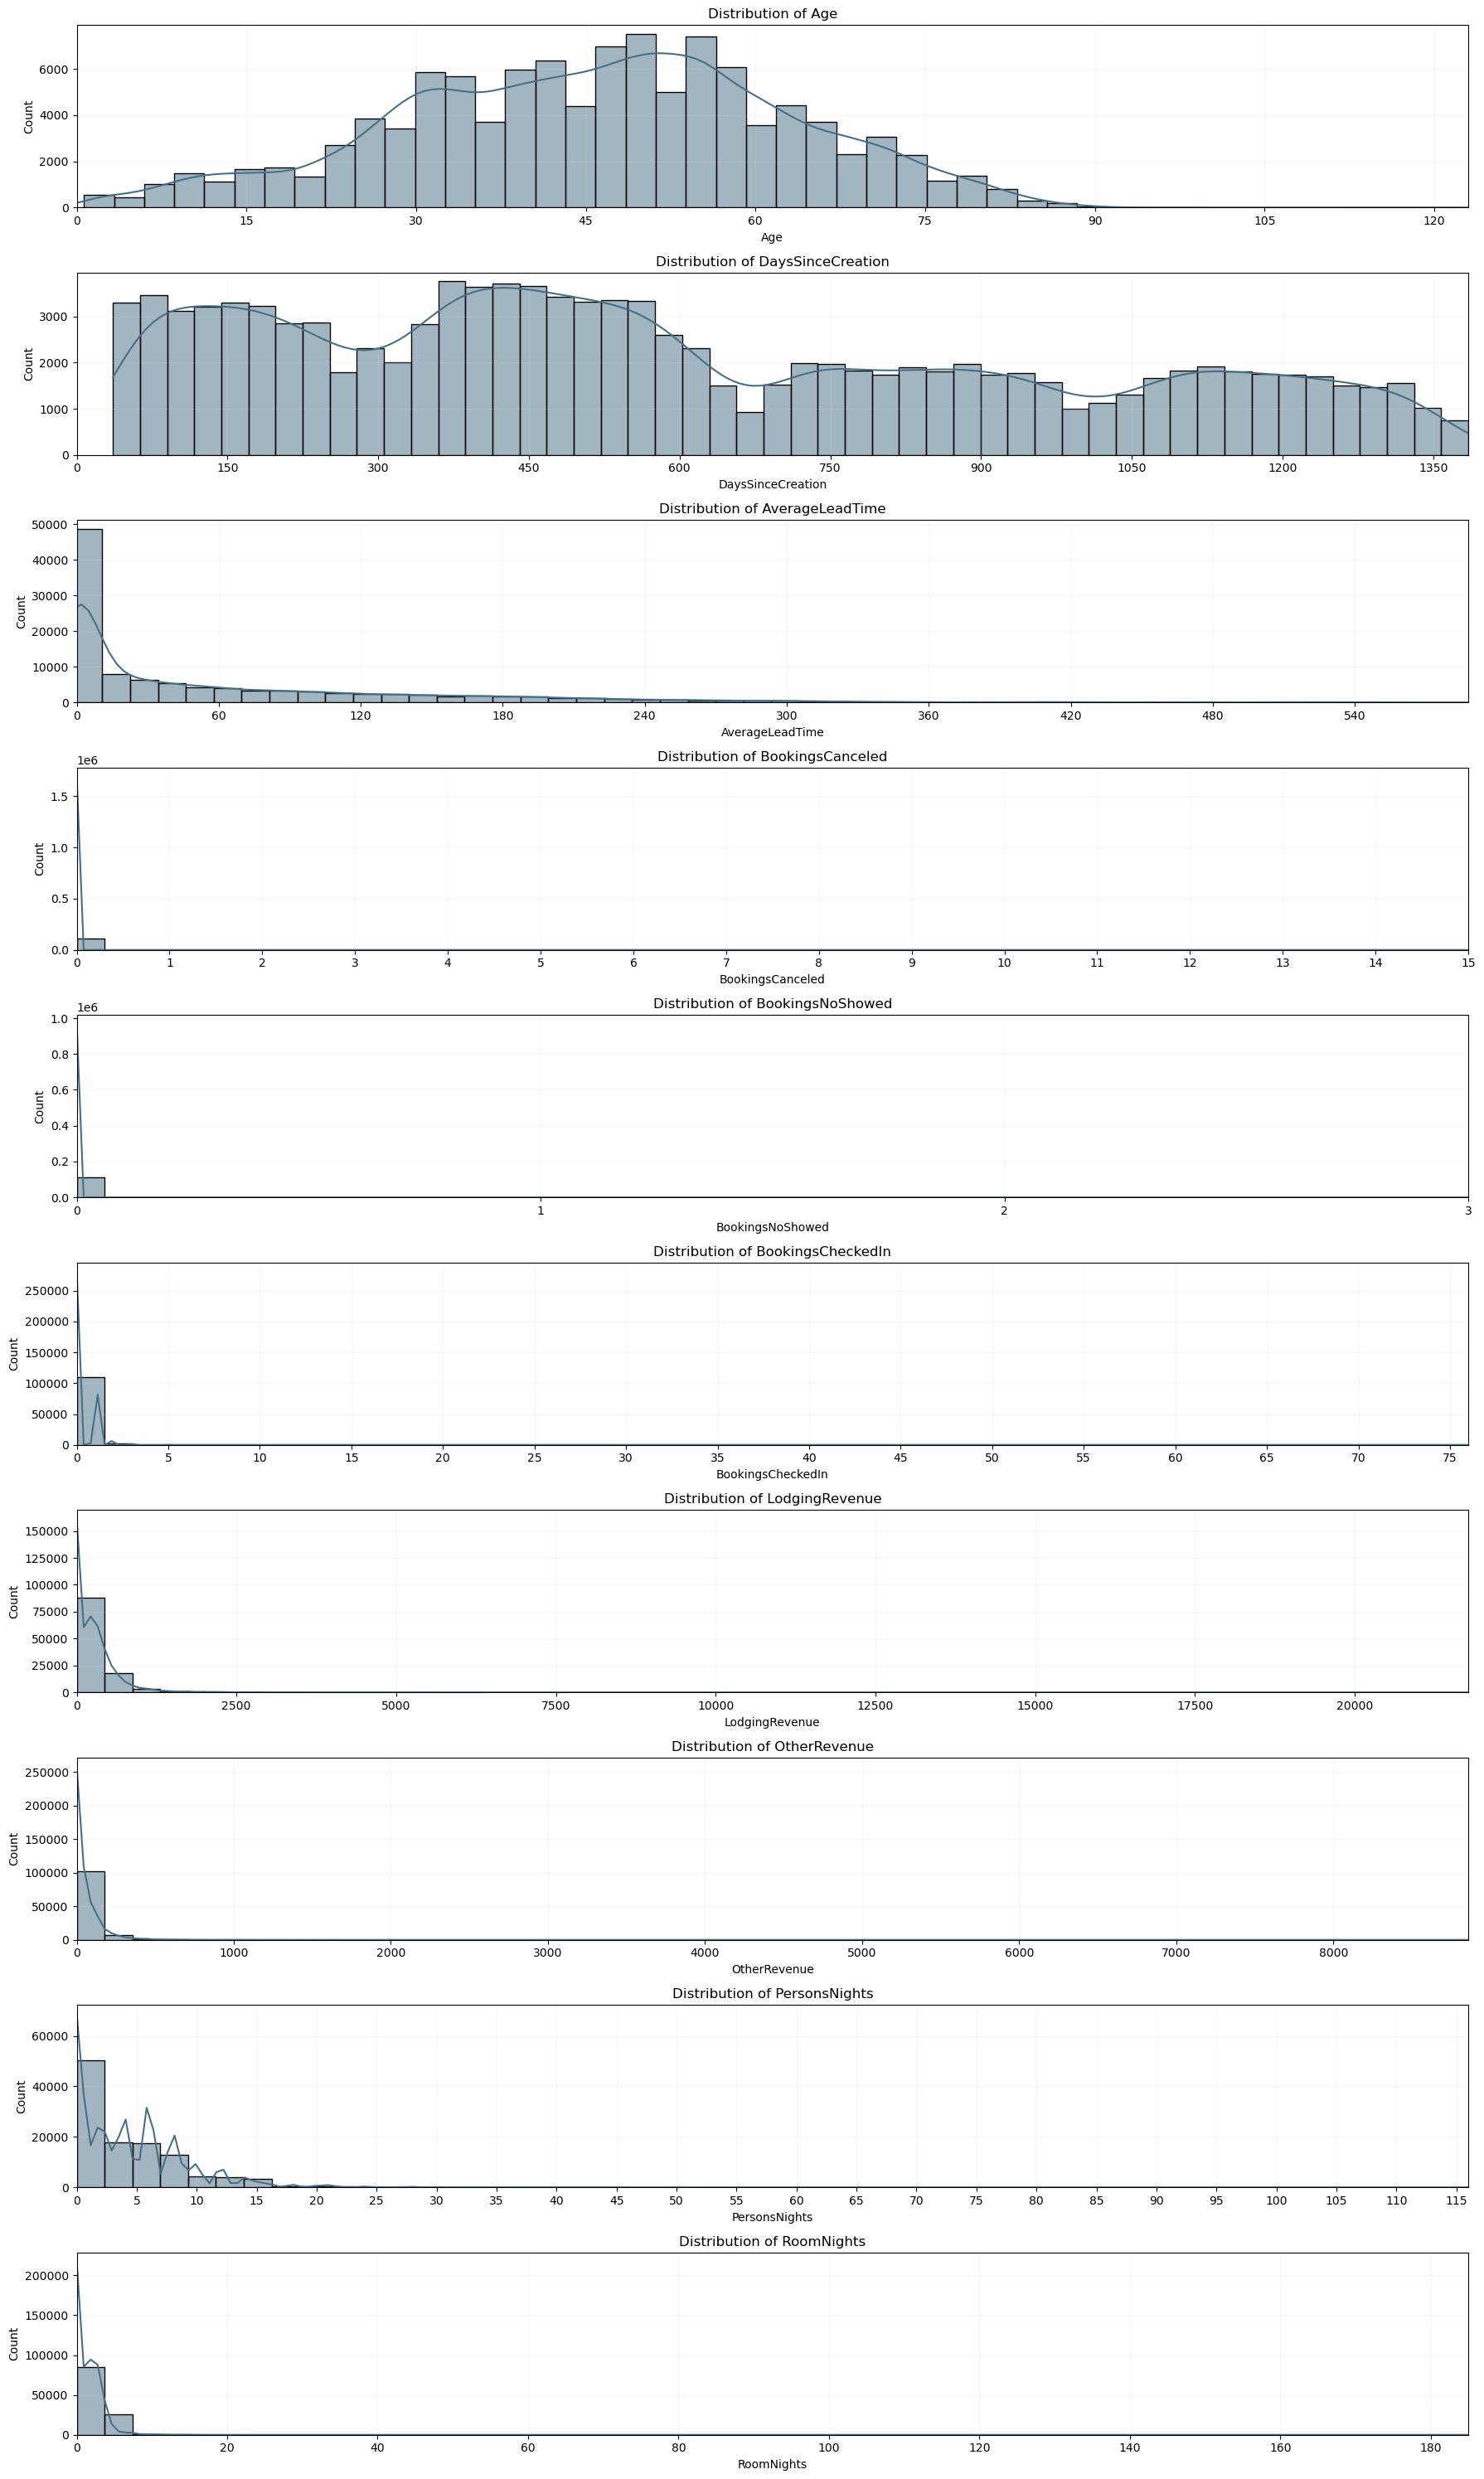

In [34]:
# Histogram for continuous_columns - Original
num_cols = 1
num_rows = (len(numeric_original) + num_cols - 1) // num_cols 
plot_histograms(df_eda, numeric_original, num_rows, num_cols)

- `Age`: The distribution appears to be approximately normal, with most values concentrated around the middle range (30-60 years old). There are few very young or very old customers. Middle-aged individuals may have greater financial stability and a stronger desire for comfort, making them willing to spend more and more frequently on accommodations.

- `DaysSinceCreation`: More frequency in lower values and a gradual decline as values increase. This suggests that most accounts were created recently.

- `AverageLeadTime`, `LodgingRevenue`, `OtherRevenue`,`BookingsCanceled`,`BookingsNoShowed`, `BookingsCheckedIn`, `PersonsNights`, `RoomNights` are highly right-skewed, with most values concentrated near zero and a few extreme cases. This suggests that the majority of bookings are short stays, generate low additional revenue, and have minimal cancellations or no-shows. However, there are occasional high-value outliers, indicating a small subset of customers who book well in advance, stay longer, or spend significantly more.

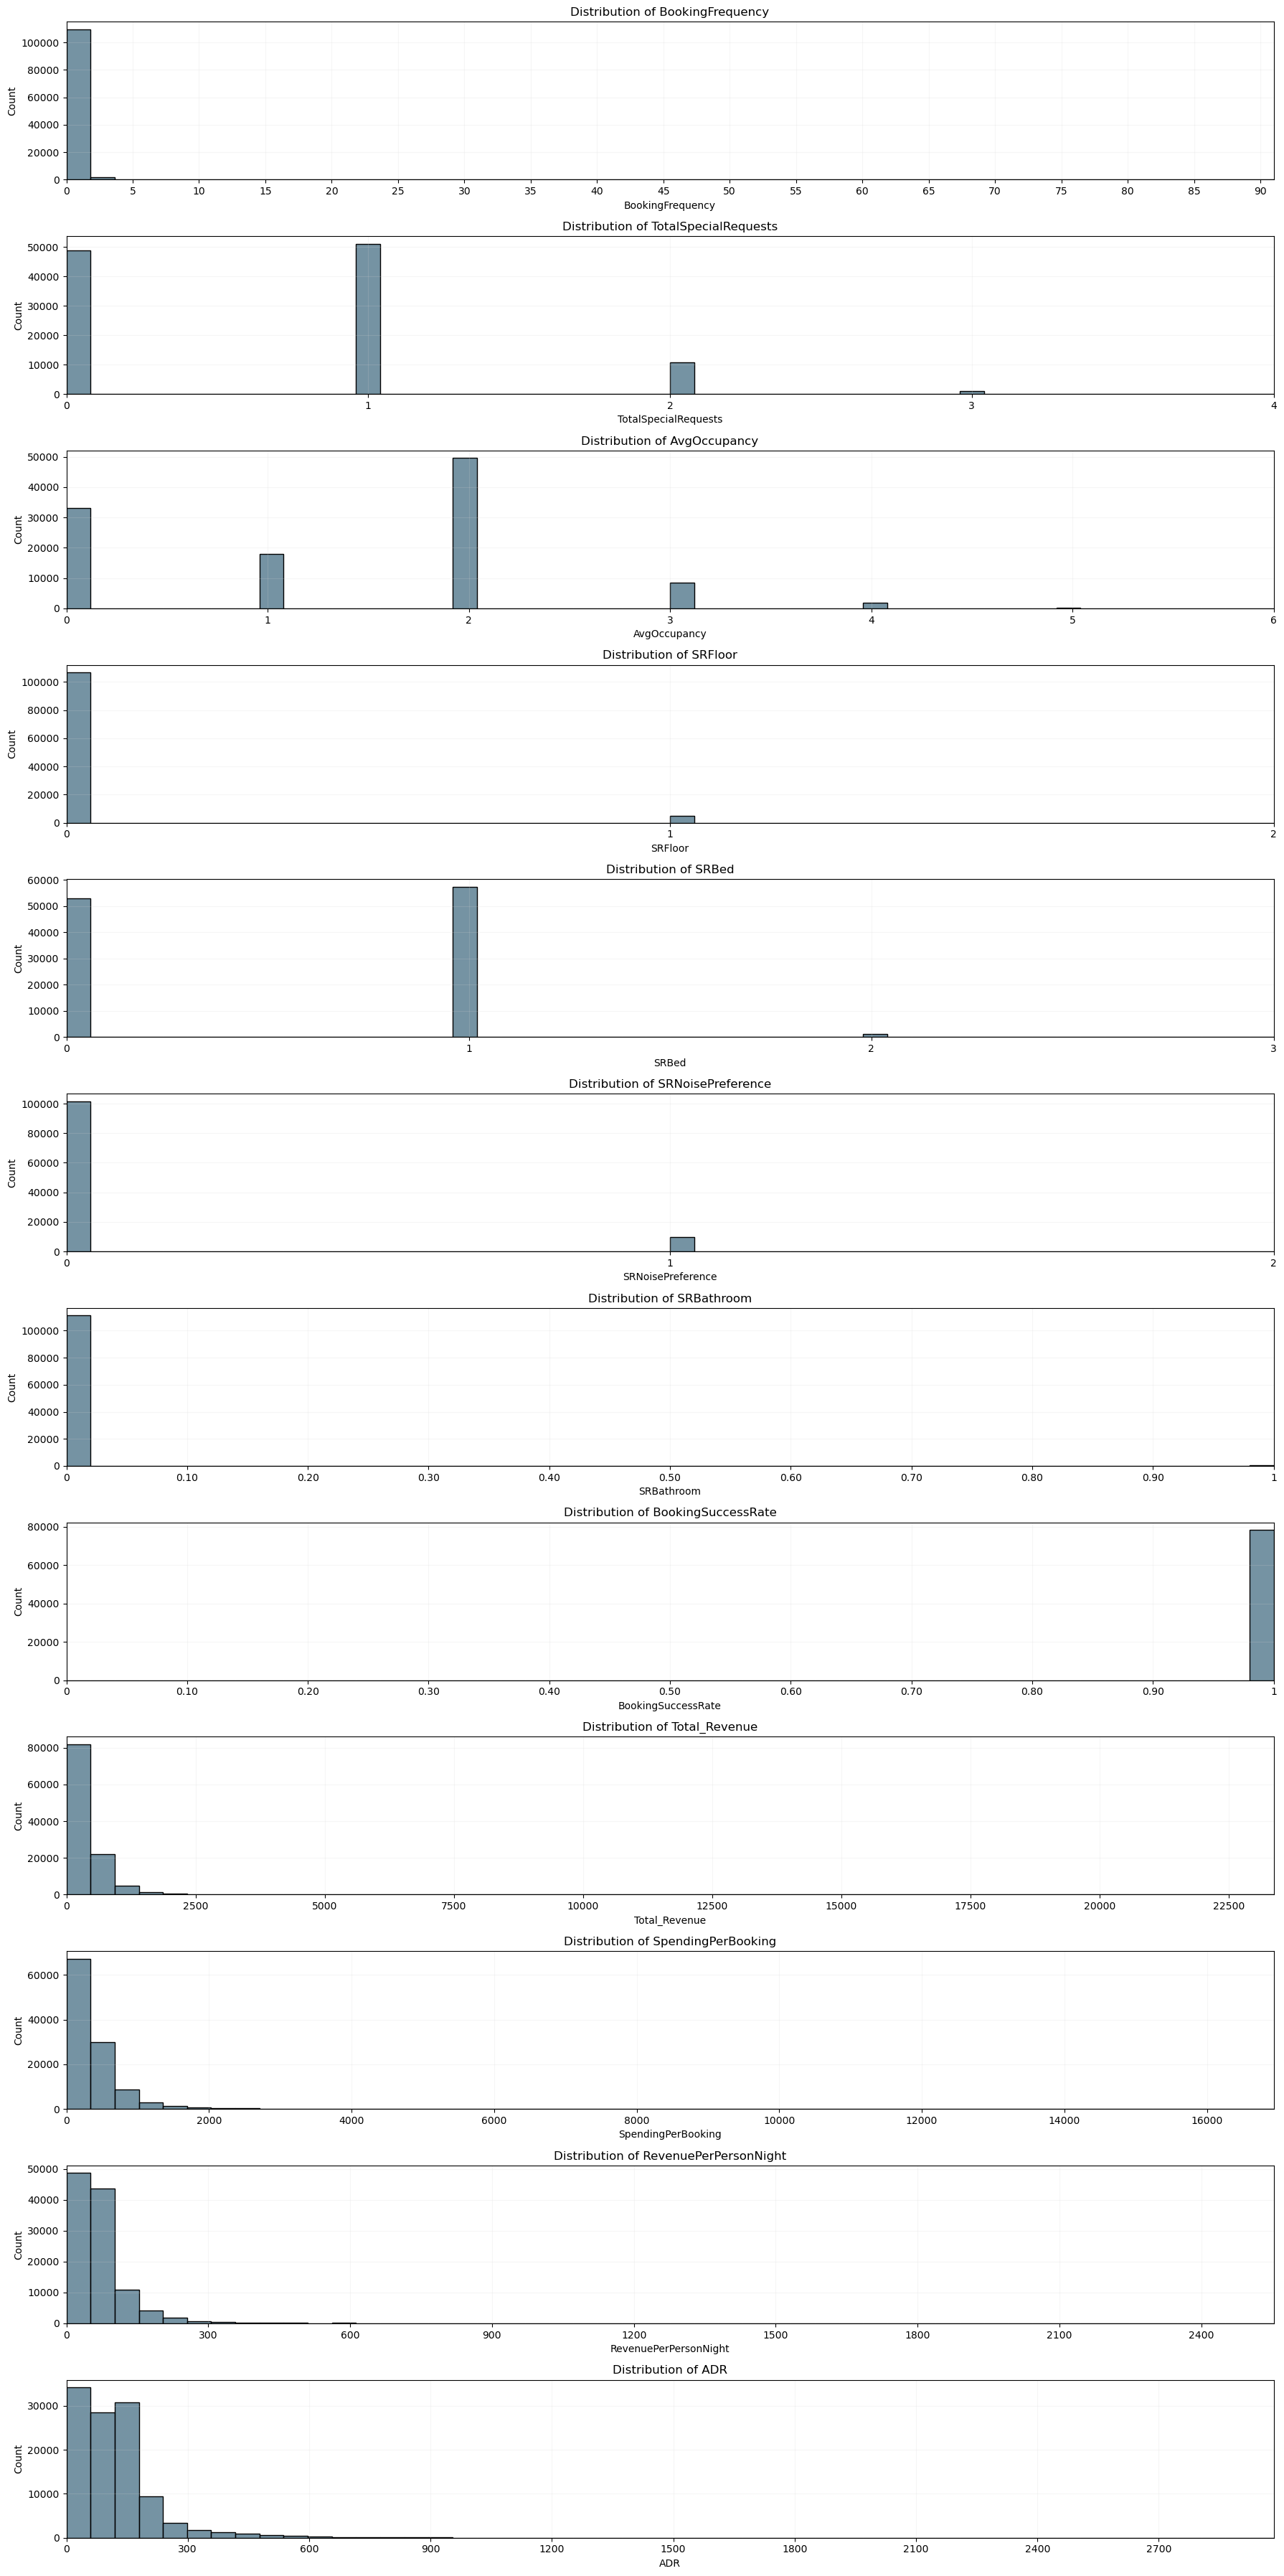

In [35]:
# Histogram for continuous_columns - New
num_cols = 1
num_rows = (len(numeric_new) + num_cols - 1) // num_cols 
plot_histograms(df_eda, numeric_new, num_rows, num_cols, show_kde = False)

- `BookingSuccess` seems to have low variance, with all values close to 1, so we need to confirm this. It seems that almost all reservations lead to check-in.  

- `Total_Revenue`, `SpendingPerBooking`, `RevenuePerPersonNight`, and `ADR` are skewed to the left (with a tail to the right), indicating some upper-limit outliers.  

- `AverageOccupancy` has a mode of 2 but also has many values at 0, which may indicate clients with no real reservations.  

-
    #### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Outliers Analysis: Box-Plots**</span> <a id='box'></a>  
    _Box-plots help detect extreme values and understand the spread of numerical variables._ 

    ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

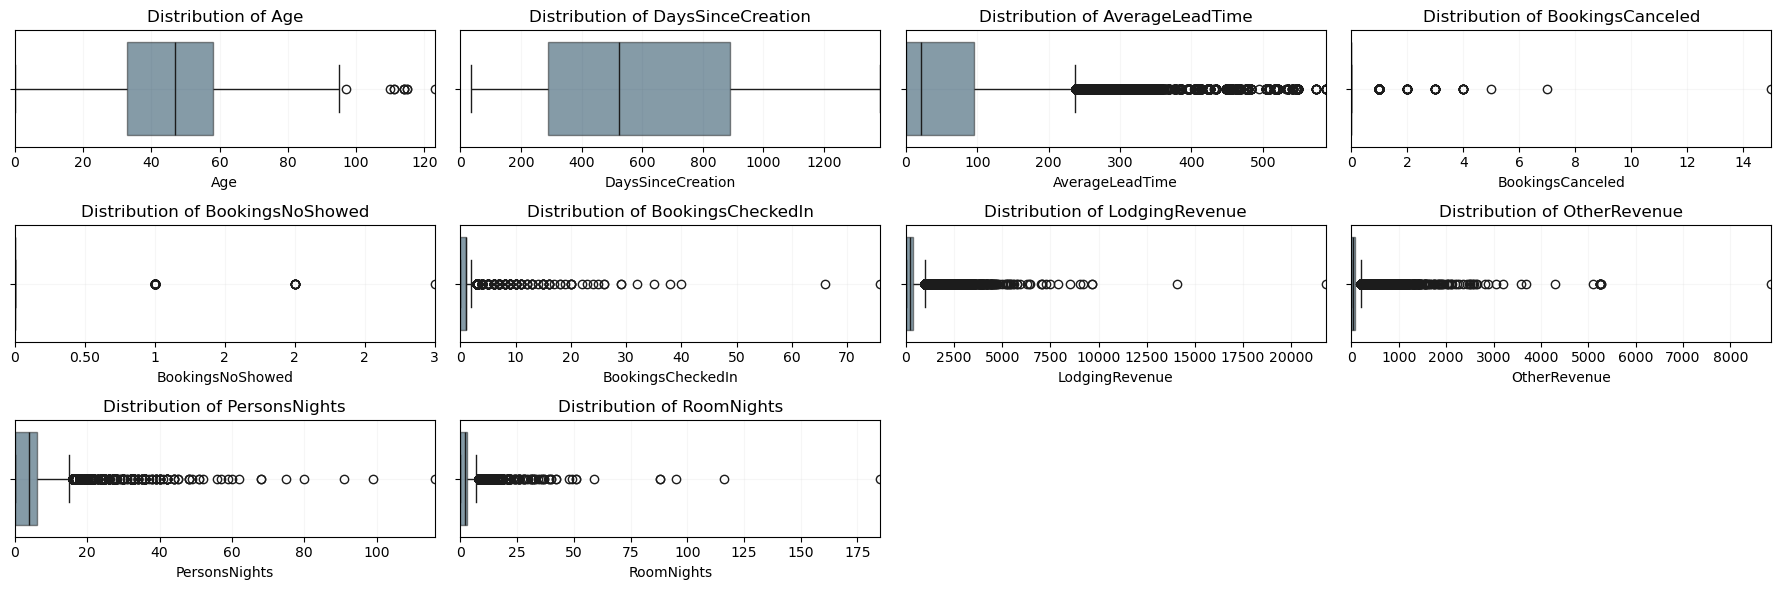

In [36]:
#Blox plot & stats for the numeric_discrete_original & numeric_continuous_original
num_cols = 4
num_rows = (len(numeric_original) + num_cols - 1) // num_cols 
stats_df_original = plot_boxplots(df_eda, numeric_original, num_rows, num_cols)

In [37]:
stats_df_original

Variable   Min  Lower Fence     Q1  Median     Q3  Upper Fence  \
0                Age -10.0        -4.50   33.0    47.0   58.0        95.50   
1  DaysSinceCreation  36.0      -613.50  288.0   522.0  889.0      1790.50   
2    AverageLeadTime  -1.0      -142.50    0.0    21.0   95.0       237.50   
3   BookingsCanceled   0.0         0.00    0.0     0.0    0.0         0.00   
4   BookingsNoShowed   0.0         0.00    0.0     0.0    0.0         0.00   
5  BookingsCheckedIn   0.0        -1.50    0.0     1.0    1.0         2.50   
6     LodgingRevenue   0.0      -589.95    0.0   208.0  393.3       983.25   
7       OtherRevenue   0.0      -126.00    0.0    31.0   84.0       210.00   
8      PersonsNights   0.0        -9.00    0.0     4.0    6.0        15.00   
9         RoomNights   0.0        -4.50    0.0     2.0    3.0         7.50   

        Max  
0    123.00  
1   1385.00  
2    588.00  
3     15.00  
4      3.00  
5     76.00  
6  21781.00  
7   8859.25  
8    116.00  
9    185.00

- **`Age`**: Contains some unrealistic negative values (e.g., -10), suggesting data entry errors. The distribution is relatively spread out, with a strange maximum (123).  
- **`DaysSinceCreation`**: All good.
- **`AverageLeadTime`**: Includes a negative value (-1) we've indentify earlier.
- **`LodgingRevenue` & `OtherRevenue`**: Both are heavily right-skewed, with large max values.
- **`BookingsCanceled` & `BookingsNoShowed`**: The upper fence is 0, meaning all values above this are outliers. However, the max values (15 and 3) suggest rare but existing extreme cases.  
- **`BookingsCheckedIn`**: Mostly centered around 1, with some extreme outliers (max = 76). The lower fence (-1.5) suggests possible anomalies.  
- **`PersonsNights` & `RoomNights`**: Right-skewed distributions, with occasional large outliers (116 and 185).  

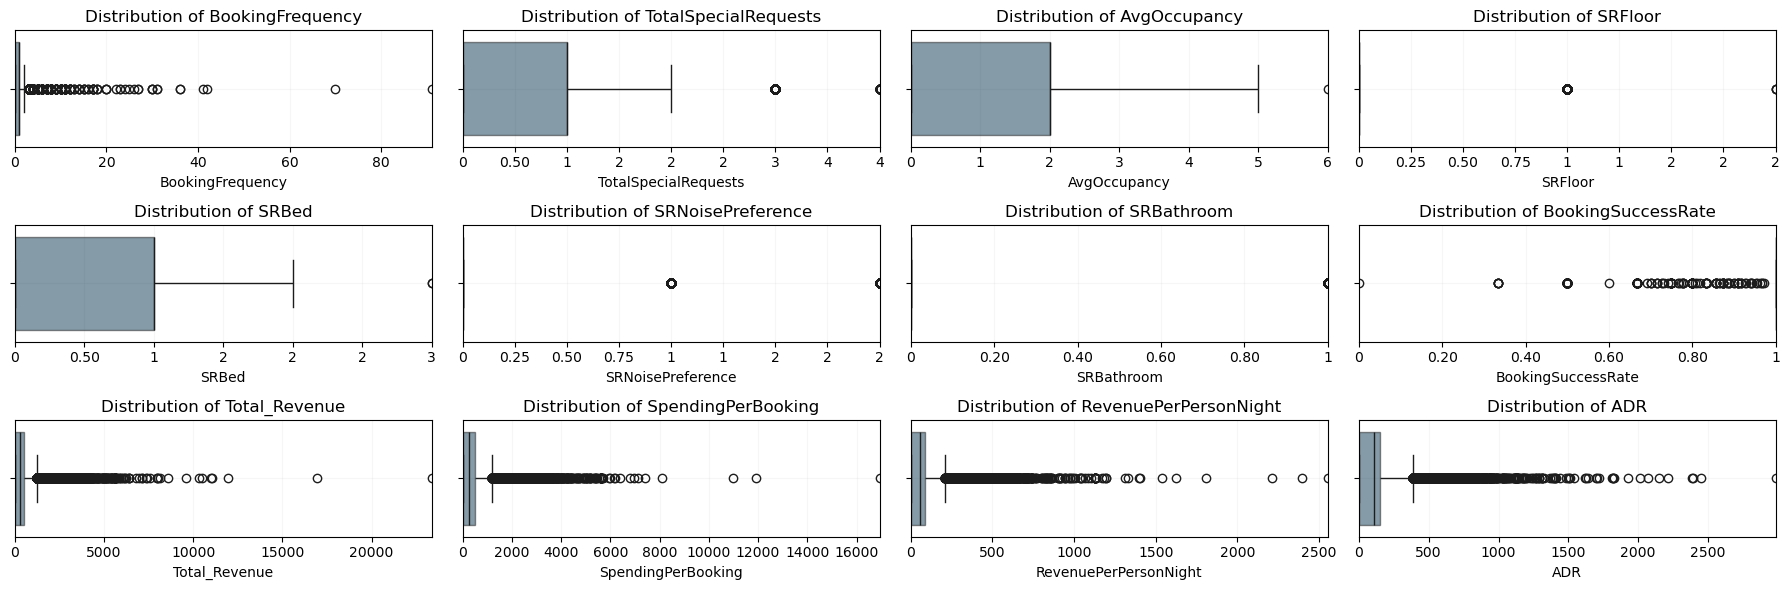

In [38]:
#Blox plot & stats for the numeric_discrete_new & numeric_continuous_new
num_cols = 4
num_rows = (len(numeric_new) + num_cols - 1) // num_cols 
stats_df_new = plot_boxplots(df_eda, numeric_new, num_rows, num_cols)

In [39]:
stats_df_new

Variable  Min  Lower Fence   Q1  Median     Q3  Upper Fence  \
0        BookingFrequency  0.0        -1.50  0.0    1.00    1.0         2.50   
1    TotalSpecialRequests  0.0        -1.50  0.0    1.00    1.0         2.50   
2            AvgOccupancy  0.0        -3.00  0.0    2.00    2.0         5.00   
3                 SRFloor  0.0         0.00  0.0    0.00    0.0         0.00   
4                   SRBed  0.0        -1.50  0.0    1.00    1.0         2.50   
5       SRNoisePreference  0.0         0.00  0.0    0.00    0.0         0.00   
6              SRBathroom  0.0         0.00  0.0    0.00    0.0         0.00   
7      BookingSuccessRate  0.0         1.00  1.0    1.00    1.0         1.00   
8           Total_Revenue  0.0      -729.90  0.0  262.00  486.6      1216.50   
9      SpendingPerBooking  0.0      -718.50  0.0  256.30  479.0      1197.50   
10  RevenuePerPersonNight  0.0      -126.75  0.0   57.44   84.5       211.25   
11                    ADR  0.0      -231.00  0.0  110.00  154.0       385.00   

         Max  
0      91.00  
1       4.00  
2       6.00  
3       2.00  
4       3.00  
5       2.00  
6       1.00  
7       1.00  
8   23365.00  
9   16936.30  
10   2552.75  
11   2983.80

- **`BookingSuccessRate`**: Again, has no variance. 
- **`Total_Revenue` & `SpendingPerBooking`**: Both are heavily right-skewed, with large maximum values (23,365 and 16,936.3, respectively). The upper fences suggest high-revenue outliers.  
- **`BookingFrequency`**: Mostly centered around 1, with extreme cases, maybee its best to group all the new visitors and the clients that visited more than one time.
- **`TotalSpecialRequests`**: Typically between 0 and 1.
- **`SRFloor`, `SRBed`, `SRNoisePreference`, `SRBathroom`**: Most values are 0, suggesting that special requests are generally uncommon. 

-
  #### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Categorical variables: Bar Plots**</span> <a id='bar'></a>  
  _Bar plots provide an overview of categorical variable distributions and highlight dominant categories._  

  ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

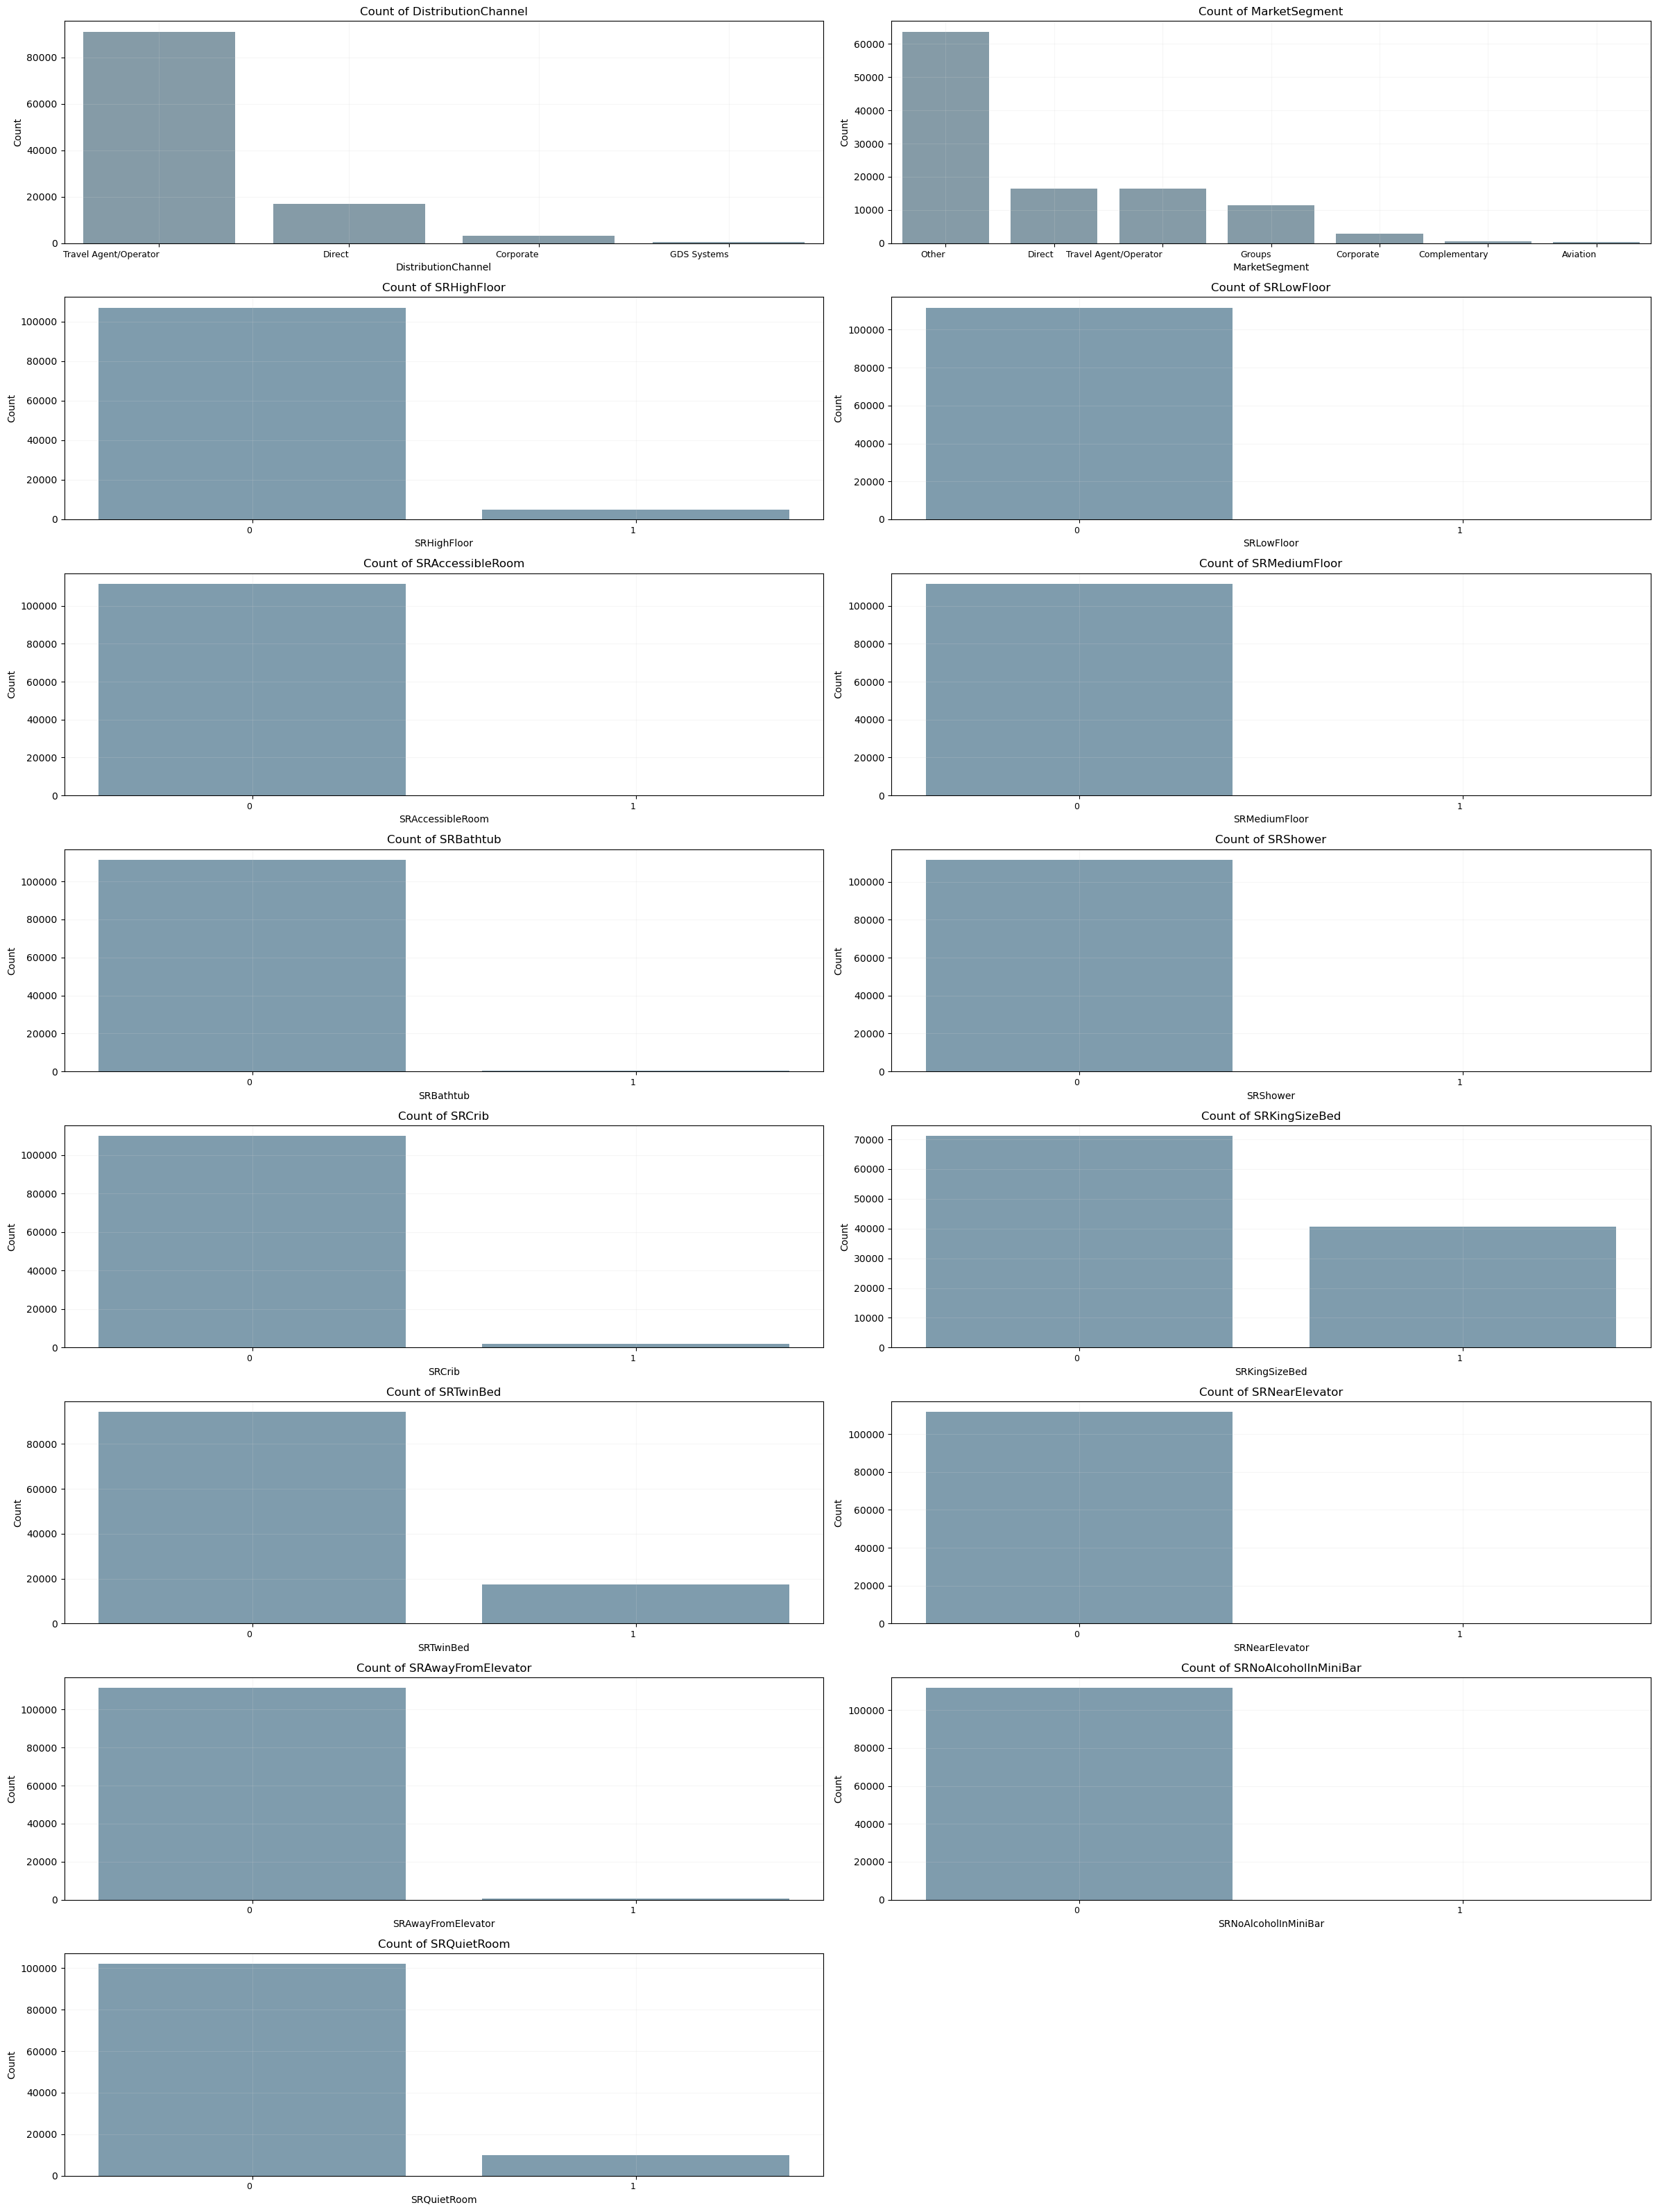

In [40]:
# bar plots for categorical_original
num_cols = 2
num_rows = (len(categorical_original) + num_cols - 1) // num_cols
plot_barplots(df_eda, categorical_original, num_rows, num_cols)

- Clients typically specify a floor preference only when they request a top floor. More specifically, 4.3% of the customers asked for a higher floor.
- There is a nearly null percentage of customers asking for a Bathtub or a Shower. We can conclude these are not important caracteristics for clients when choosing a room.
- 1.6% have ask for a Crib indicating people are staying with babies. This can be an important information for marketing strategies.
- The difference of preferences start to show in the Bed choice, its normal since a lot of platforms ask for this information to assign the bedroom.
- We can also see that a QuietRoom is a important request for 8.8% of the customers. 

-
  #### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Categorical variables: Geographic Map**</span> <a id='GeographicMap'></a>  
  _Geospatial visualizations help analyze data distributions based on location._

  ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

The `Nationality` Bar Plot is difficult to visualize in a bar plot, so we are going to develop a Geographic Map to study this feature distribution.

In [41]:
# Agg the count of visitors by nationality
nationality_counts = df_eda['Nationality'].value_counts().reset_index()
nationality_counts.columns = ['Country', 'VisitorCount']
nationality_counts['Percentage'] = (nationality_counts['VisitorCount'] / nationality_counts['VisitorCount'].sum()) * 100
nationality_counts['Percentage'] = nationality_counts['Percentage'].map('{:.0f}%'.format)
nationality_counts = nationality_counts.sort_values(by='VisitorCount', ascending=False)

nationality_counts.head(20)

Country  VisitorCount Percentage
0      FRA         16516        15%
1      DEU         14805        13%
2      PRT         14101        13%
3      GBR         11462        10%
4      ESP          6123         5%
5      USA          5409         5%
6      ITA          4268         4%
7      BEL          4111         4%
8      BRA          4037         4%
9      NLD          3794         3%
10     IRL          2938         3%
11     CHE          2686         2%
12     CAN          2192         2%
13     AUT          1949         2%
14     SWE          1687         2%
15     ISR          1149         1%
16     CHN          1147         1%
17     NOR          1055         1%
18     POL          1035         1%
19     AUS          1022         1%

**France**, **Germany**, **Portugal** (National customers) and **Great Britain** are our top 4 customer nationality. We can have this biggest categories in mind when we reduce the cardinality of this variable.

In [42]:
fig = go.Figure(data=go.Choropleth(
    locations=nationality_counts['Country'],
    z=nationality_counts['VisitorCount'],
    text=nationality_counts['Country'],
    colorscale='YlGnBu',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='black',
    marker_line_width=0.5,
    colorbar_tickprefix='',
    colorbar_title='Count of Visitors'))

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    ),
    width=1000,  
    height=600,
    title='Visual Representation of Nationality of Customers',
    title_x=0.5,)

fig.show()

#Adapted from a previous notebook and learned from https://www.youtube.com/watch?v=_FQMD-TpBpM

---
#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Bivariate EDA: Data Visualization**</span> <a id='Bivariate-Vizualization'></a>  
_Exploring relationships between pairs of variables to detect correlations and dependencies._  

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

-
    #### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Numeric-Numeric: Correlations**</span> <a id='NNCorrelations'></a>  
    _Correlation analysis reveals linear relationships between numerical variables._ 

    ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [43]:
all_numeric = numeric_original + numeric_new

We have a lot of correlations to analyze and it's difficult to analyze and plot every single one.
First there's a need to use a relevant threshold and plot only possible relevant pairs

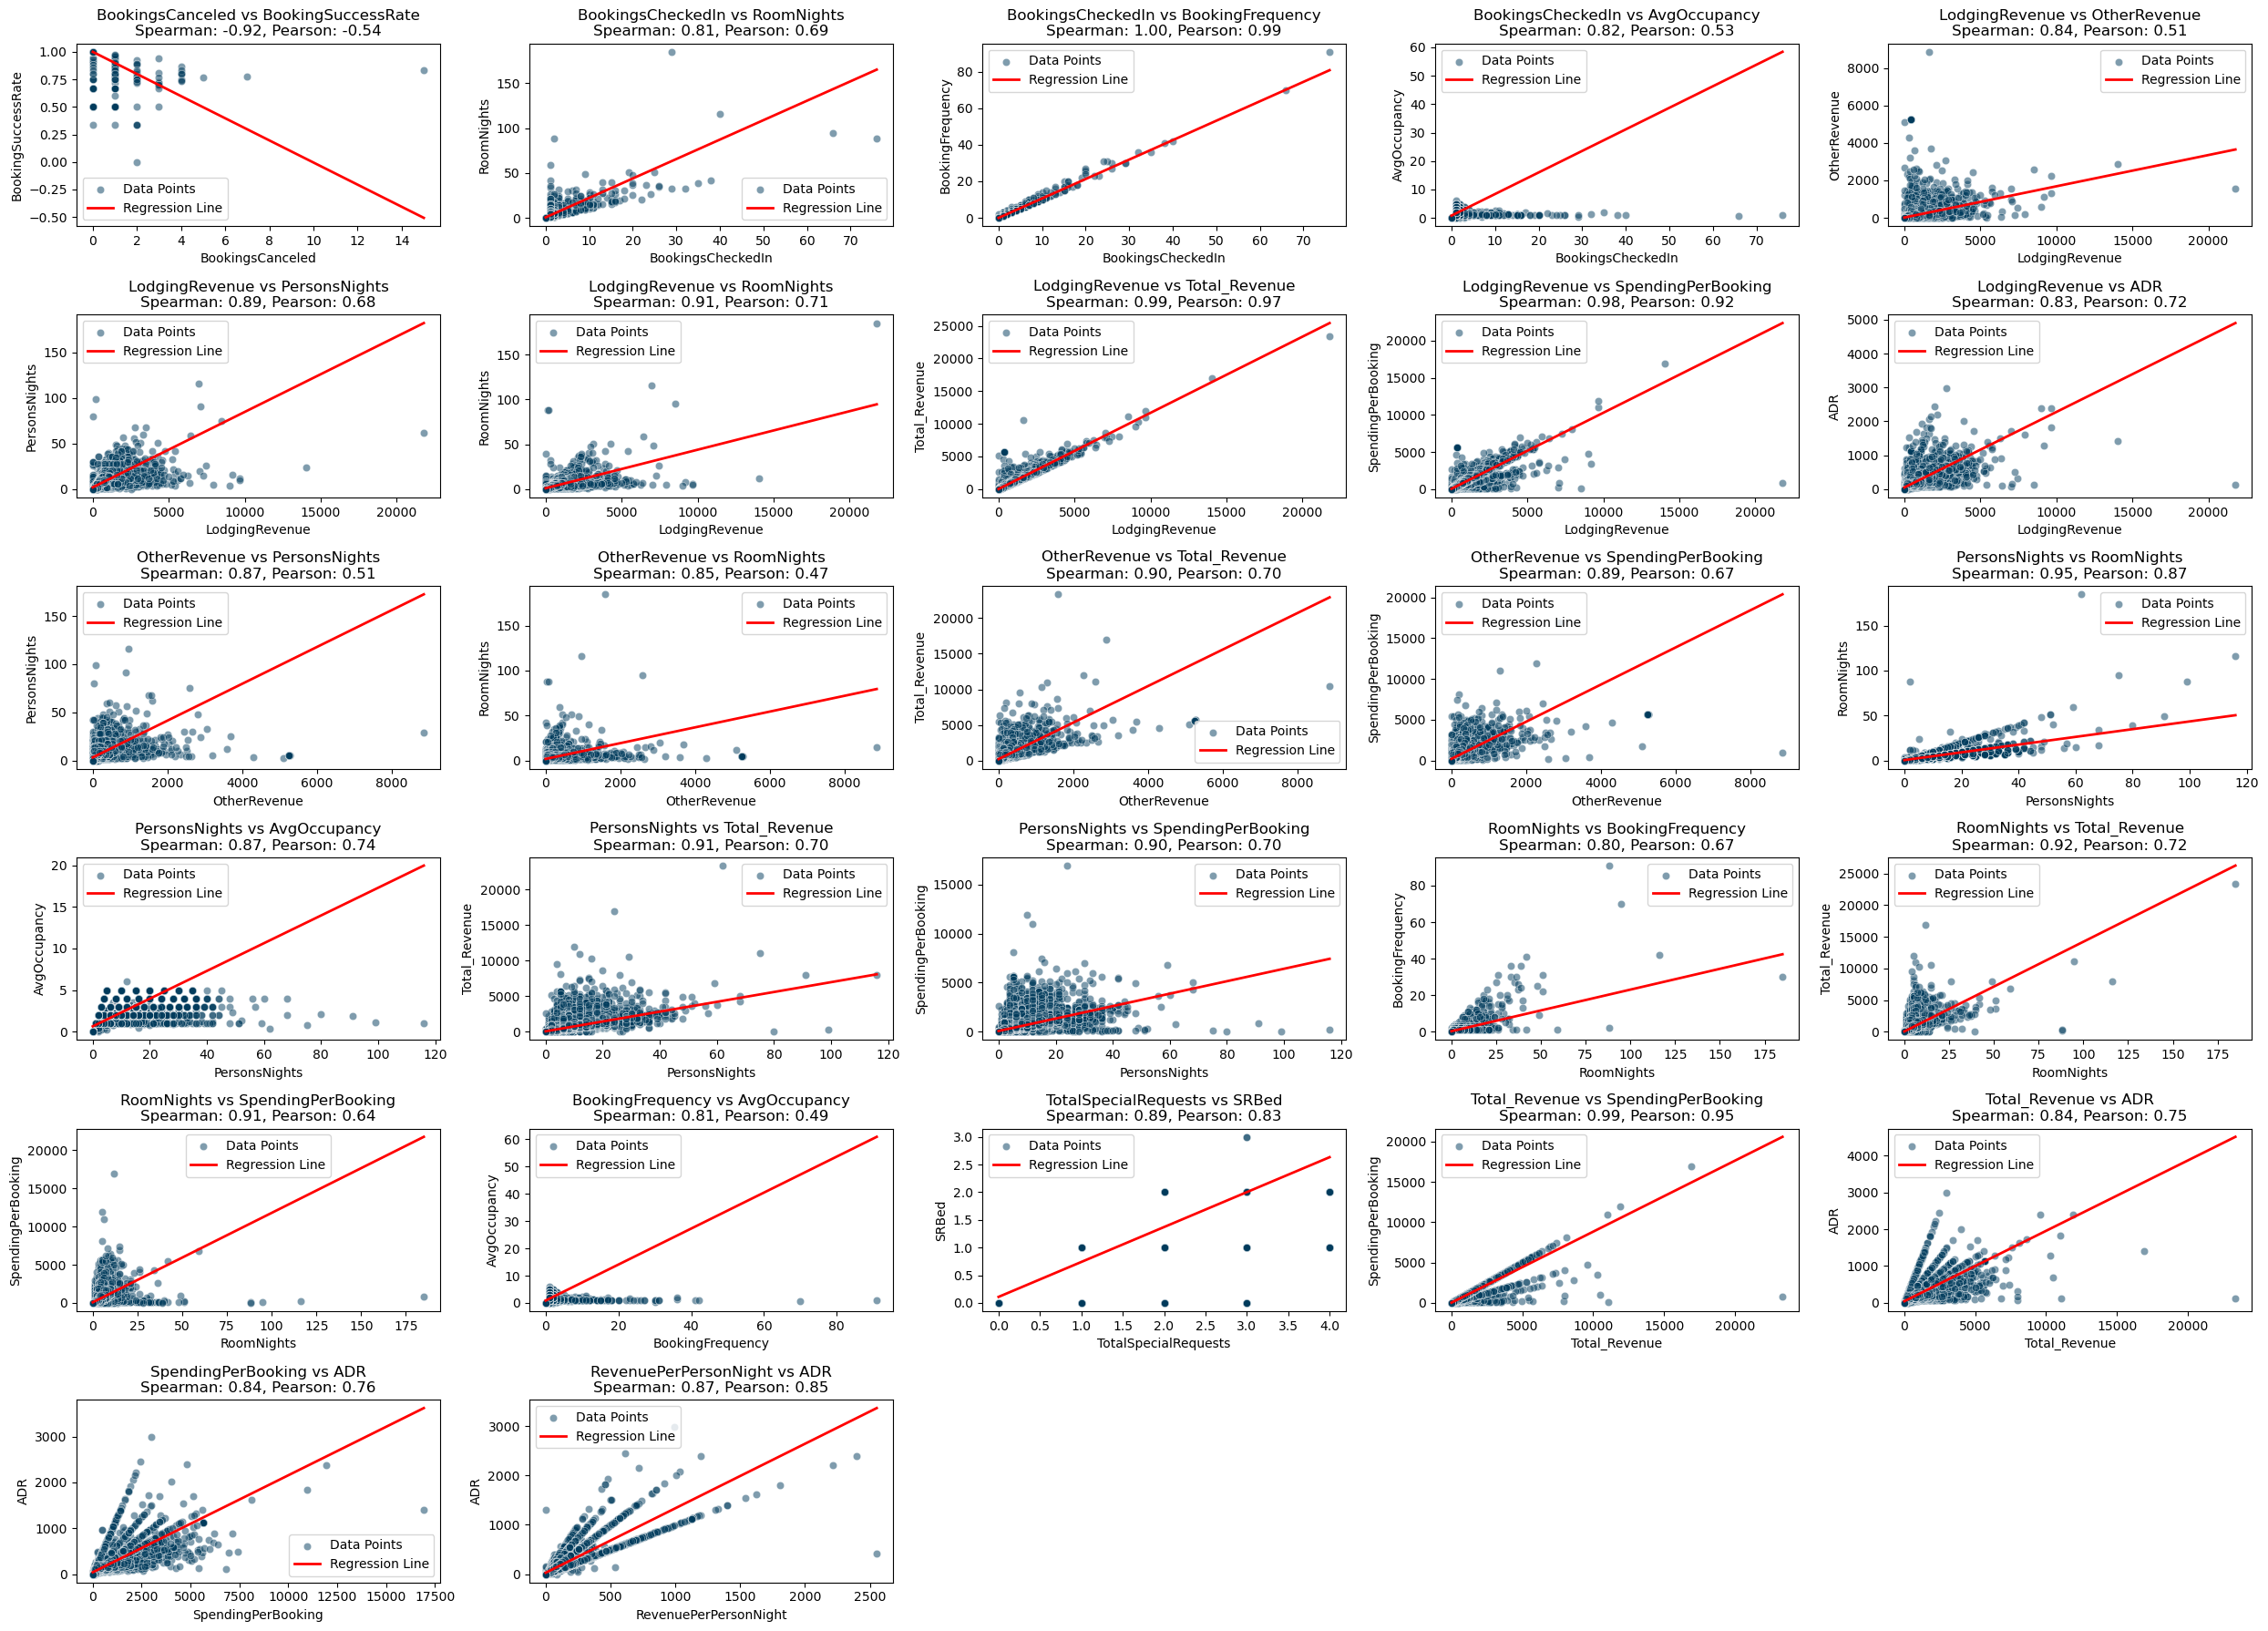

In [44]:
# We have a lot of correlations to analyze and it's difficult to analyze and plot every single one,
# First there's a need to use a relevant threshold and plot only possible relevant pairs
spearman_corr_matrix = df_eda[all_numeric].corr(method='spearman')
pearson_corr_matrix = df_eda[all_numeric].corr(method='pearson')
threshold = 0.80
significant_correlations = []

# Identifying pairs with both Spearman and Pearson correlations >= threshold
for i, col1 in enumerate(spearman_corr_matrix.columns):
    for j, col2 in enumerate(spearman_corr_matrix.columns):
        if j > i:  # This is to not go over the same pair but in an inverse other
            spearman_corr = spearman_corr_matrix.loc[col1, col2]
            pearson_corr = pearson_corr_matrix.loc[col1, col2]
            
            # Checks both Spearman and Pearson correlation thresholds
            if abs(spearman_corr) >= threshold or abs(pearson_corr) >= threshold:
                significant_correlations.append((col1, col2, spearman_corr, pearson_corr))

# Prepare the grid
num_plots = len(significant_correlations)
num_cols = 5
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 3 * num_rows))
axes = axes.flatten()

# iterate over each significant pair
for i, (col1, col2, spearman_corr, pearson_corr) in enumerate(significant_correlations):
    df_clean = df_eda[[col1, col2]].dropna()  # Drops rows with NaN values

    # Scatterplot
    sns.scatterplot(x=df_clean[col1], y=df_clean[col2], ax=axes[i], color=pal_novaims[1], label='Data Points', alpha=0.5)
    
    # Add a regression line if data is not constant
    if df_clean[col1].nunique() > 1 and df_clean[col2].nunique() > 1:
        try:
            m, b = np.polyfit(df_clean[col1], df_clean[col2], 1)
            x = np.array([df_clean[col1].min(), df_clean[col1].max()])
            y = m * x + b
            axes[i].plot(x, y, color='red', linewidth=2, label='Regression Line')
        except np.linalg.LinAlgError:
            print(f"Could not fit regression line for {col1} vs {col2}")

    # in the title this will show both corr so i can compare
    axes[i].set_title(f"{col1} vs {col2}\nSpearman: {spearman_corr:.2f}, Pearson: {pearson_corr:.2f}")
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#This code was a mix of an old code and a prompt in the chat gpt so i can add a threshold and plot only possibe corr, since it was impossible to see every single one

-
    #### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Numeric-Categorical: Correlations**</span> <a id='NCCorrelations'></a>  
    _Analyzing the influence of categorical variables on numerical features._
    
    ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [45]:
# Count occurrences of each nationality
top_nationalities = df_eda["Nationality"].value_counts().nlargest(8).index  
df_eda["Nationality_Grouped"] = df_eda["Nationality"].apply(lambda x: x if x in top_nationalities else "Other")

In [46]:
# combinations for analysis
DistributionChannel_combinations = [
    {'numeric': 'Age', 'categorical': 'DistributionChannel'},
    {'numeric': 'DaysSinceCreation', 'categorical': 'DistributionChannel'},
    {'numeric': 'AverageLeadTime', 'categorical': 'DistributionChannel'},
    {'numeric': 'LodgingRevenue', 'categorical': 'DistributionChannel'},
    {'numeric': 'OtherRevenue', 'categorical': 'DistributionChannel'}, 
    {'numeric': 'BookingsCanceled', 'categorical': 'DistributionChannel'},
    {'numeric': 'BookingsNoShowed', 'categorical': 'DistributionChannel'}, 
    {'numeric': 'BookingsCheckedIn', 'categorical': 'DistributionChannel'}, 
    {'numeric': 'PersonsNights', 'categorical': 'DistributionChannel'},
    {'numeric': 'RoomNights', 'categorical': 'DistributionChannel'}
] 

In [47]:
# Cross Tables
for combo in DistributionChannel_combinations:
    if 'categorical' in combo:
        categorical_col = combo['categorical']
        numeric_col = combo['numeric']
        cross_table = df_eda.groupby(categorical_col, as_index=False)[numeric_col].mean()
        total = cross_table[numeric_col].sum()
        cross_table = cross_table.sort_values(by=numeric_col, ascending=False)
        display(cross_table)

DistributionChannel        Age
0              Corporate  47.252743
3  Travel Agent/Operator  46.168244
2            GDS Systems  43.672566
1                 Direct  42.579531

DistributionChannel  DaysSinceCreation
0              Corporate         715.551515
3  Travel Agent/Operator         601.241334
1                 Direct         541.586507
2            GDS Systems         535.722701

DistributionChannel  AverageLeadTime
3  Travel Agent/Operator        66.156901
1                 Direct        39.581295
0              Corporate        29.509729
2            GDS Systems        21.222701

DistributionChannel  LodgingRevenue
0              Corporate      327.794928
1                 Direct      295.040933
2            GDS Systems      289.017342
3  Travel Agent/Operator      280.222659

DistributionChannel  OtherRevenue
0              Corporate     67.498804
3  Travel Agent/Operator     64.834430
1                 Direct     64.529331
2            GDS Systems     35.892399

DistributionChannel  BookingsCanceled
0              Corporate          0.056459
1                 Direct          0.003376
2            GDS Systems          0.001437
3  Travel Agent/Operator          0.000220

DistributionChannel  BookingsNoShowed
0              Corporate          0.017863
1                 Direct          0.000355
3  Travel Agent/Operator          0.000055
2            GDS Systems          0.000000

DistributionChannel  BookingsCheckedIn
0              Corporate           1.450080
2            GDS Systems           0.998563
3  Travel Agent/Operator           0.717092
1                 Direct           0.705147

DistributionChannel  PersonsNights
3  Travel Agent/Operator       4.425395
1                 Direct       4.020849
0              Corporate       3.596172
2            GDS Systems       2.389368

DistributionChannel  RoomNights
0              Corporate    3.073046
3  Travel Agent/Operator    2.220470
2            GDS Systems    2.109195
1                 Direct    1.956584

In [48]:
# combinations for analysis
Nationality_Grouped_combinations = [
    {'numeric': 'Age', 'categorical': 'Nationality_Grouped'},
    {'numeric': 'DaysSinceCreation', 'categorical': 'Nationality_Grouped'},
    {'numeric': 'AverageLeadTime', 'categorical': 'Nationality_Grouped'},
    {'numeric': 'LodgingRevenue', 'categorical': 'Nationality_Grouped'},
    {'numeric': 'OtherRevenue', 'categorical': 'Nationality_Grouped'}, 
    {'numeric': 'BookingsCanceled', 'categorical': 'Nationality_Grouped'},
    {'numeric': 'BookingsNoShowed', 'categorical': 'Nationality_Grouped'}, 
    {'numeric': 'BookingsCheckedIn', 'categorical': 'Nationality_Grouped'}, 
    {'numeric': 'PersonsNights', 'categorical': 'Nationality_Grouped'},
    {'numeric': 'RoomNights', 'categorical': 'Nationality_Grouped'}
] 

In [49]:
# Cross Tables
for combo in Nationality_Grouped_combinations:
    if 'categorical' in combo:
        categorical_col = combo['categorical']
        numeric_col = combo['numeric']
        cross_table = df_eda.groupby(categorical_col, as_index=False)[numeric_col].mean()
        total = cross_table[numeric_col].sum()
        cross_table = cross_table.sort_values(by=numeric_col, ascending=False)
        display(cross_table)

Nationality_Grouped        Age
1                 DEU  50.760419
8                 USA  48.022000
5                 ITA  46.882849
4                 GBR  46.250829
6               Other  44.676647
2                 ESP  44.351029
3                 FRA  44.006176
7                 PRT  43.920250
0                 BEL  41.875943

Nationality_Grouped  DaysSinceCreation
7                 PRT         717.286363
5                 ITA         656.144799
2                 ESP         649.364691
3                 FRA         626.145435
0                 BEL         581.732912
4                 GBR         567.424882
6               Other         561.393239
1                 DEU         556.783722
8                 USA         462.059530

Nationality_Grouped  AverageLeadTime
1                 DEU        98.519284
4                 GBR        77.920433
0                 BEL        67.308198
5                 ITA        55.592315
6               Other        55.496050
8                 USA        53.479756
3                 FRA        52.918685
2                 ESP        41.035930
7                 PRT        40.985391

Nationality_Grouped  LodgingRevenue
0                 BEL      314.184082
6               Other      303.659136
4                 GBR      298.063909
5                 ITA      297.802762
3                 FRA      291.245713
2                 ESP      285.074197
1                 DEU      272.810439
8                 USA      263.280211
7                 PRT      220.445806

Nationality_Grouped  OtherRevenue
0                 BEL     78.784347
3                 FRA     78.668122
1                 DEU     66.865187
5                 ITA     66.495333
4                 GBR     65.610139
6               Other     61.353674
2                 ESP     61.157738
8                 USA     57.181499
7                 PRT     53.254064

Nationality_Grouped  BookingsCanceled
7                 PRT          0.014325
2                 ESP          0.001470
5                 ITA          0.000937
0                 BEL          0.000730
6               Other          0.000687
3                 FRA          0.000484
8                 USA          0.000370
4                 GBR          0.000262
1                 DEU          0.000000

Nationality_Grouped  BookingsNoShowed
7                 PRT          0.003546
2                 ESP          0.000327
6               Other          0.000258
0                 BEL          0.000243
8                 USA          0.000185
4                 GBR          0.000174
1                 DEU          0.000068
3                 FRA          0.000061
5                 ITA          0.000000

Nationality_Grouped  BookingsCheckedIn
7                 PRT           0.935253
2                 ESP           0.781806
5                 ITA           0.730319
4                 GBR           0.719421
1                 DEU           0.714083
3                 FRA           0.705437
6               Other           0.698952
0                 BEL           0.698127
8                 USA           0.658902

Nationality_Grouped  PersonsNights
3                 FRA       4.810608
0                 BEL       4.808806
5                 ITA       4.700094
1                 DEU       4.434380
4                 GBR       4.431775
6               Other       4.424667
2                 ESP       4.219500
7                 PRT       3.460889
8                 USA       3.449806

Nationality_Grouped  RoomNights
3                 FRA    2.323202
0                 BEL    2.308441
1                 DEU    2.299358
5                 ITA    2.263590
4                 GBR    2.259030
6               Other    2.240626
2                 ESP    2.072187
7                 PRT    1.985675
8                 USA    1.814199

> Age Across Channels

In [50]:
# Create list of distributions
distributions = [df_eda[df_eda['DistributionChannel'] == channel]['Age'].dropna() 
                 for channel in df_eda['DistributionChannel'].unique()]

# Create density plot
fig = ff.create_distplot(distributions, 
                         group_labels=df_eda['DistributionChannel'].unique(), 
                         show_hist=False, show_rug=False)

# Get colors from the YlGnBu palette in seaborn
colors = sns.color_palette("YlGnBu", n_colors=len(fig.data)).as_hex()

# Update colors in the plot
for i, color in enumerate(colors):
    fig.data[i].update(line=dict(color=color), fill='tozeroy',
                       fillcolor=f"rgba{tuple(int(color.lstrip('#')[j:j+2], 16) for j in (0, 2, 4)) + (0.4,)}")  # RGBA with 40% opacity

# Customize layout
fig.update_layout(title="Age Distribution by Distribution Channel",
                  xaxis_title="Age",
                  yaxis_title="Density",
                  template="plotly_white")

fig.show()

1. **Travel Agent/Operator Channel**  
   - This channel has the widest age distribution, covering a broad range from young adults to elderly travelers.

2. **Corporate Channel**  
   - This distribution is more concentrated between ages 20-70, resembling a normal distribution.
   - It makes sense, as corporate travelers are typically working professionals, aligning with the common working-age range.
   - The peak around 40-50 years suggests that middle-aged professionals might travel more frequently for business.

-
    #### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Categorical-Categorical: Cross-tabulations**</span> <a id='CCCross-tabulations'></a>  
    _Cross-tabulations highlight relationships between categorical variables._ 
    
    ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

> Nationality & Distribution Channel

In [51]:
# Group by DistributionChannel and Nationality_Grouped
channel_nationality_counts = df_eda.groupby(["DistributionChannel", "Nationality_Grouped"]).size().reset_index(name="Count")

# treemap
fig = px.treemap(
    channel_nationality_counts,
    path=[px.Constant("Distribution Channels"), "DistributionChannel", "Nationality_Grouped"],  
    values="Count",
    title="Treemap of Distribution Channels and Top Nationalities",
    color="Count",
    color_continuous_scale="YlGnBu")

fig.update_traces(
    root_color="white",
    maxdepth=2,
    textinfo="label+value+percent entry",
    marker=dict(line=dict(width=1, color='black')))

fig.show()


As expected, the majority of corporate clients are Portuguese, accounting for 45% of the customers in this channel.

> boolean - boolean

In [52]:
boolean_variables = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 
                'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 
                'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 
                'SRQuietRoom']

threshold = 0.05
for i in range(len(boolean_variables)):
    for j in range(i+1, len(boolean_variables)):
        bool_var = boolean_variables[i]
        bool_var2 = boolean_variables[j]
        contingency_table = pd.crosstab(df_eda[bool_var], df[bool_var2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        if p < threshold:
            display(contingency_table)
            print(f"Chi-square Test of Independence for {bool_var} and {bool_var2}: p-value = {p}")

SRBathtub         0    1
SRHighFloor             
0            106684  299
1              4699   51

Chi-square Test of Independence for SRHighFloor and SRBathtub: p-value = 3.321257465607039e-21


SRShower          0    1
SRHighFloor             
0            106826  157
1              4725   25

Chi-square Test of Independence for SRHighFloor and SRShower: p-value = 7.10595950428234e-10


SRKingSizeBed      0      1
SRHighFloor                
0              69056  37927
1               2088   2662

Chi-square Test of Independence for SRHighFloor and SRKingSizeBed: p-value = 4.067197218839975e-183


SRTwinBed        0      1
SRHighFloor              
0            90263  16720
1             3949    801

Chi-square Test of Independence for SRHighFloor and SRTwinBed: p-value = 0.023256752571913033


SRNearElevator       0   1
SRHighFloor               
0               106954  29
1                 4742   8

Chi-square Test of Independence for SRHighFloor and SRNearElevator: p-value = 1.3622784235898043e-06


SRAwayFromElevator       0    1
SRHighFloor                    
0                   106776  207
1                     4555  195

Chi-square Test of Independence for SRHighFloor and SRAwayFromElevator: p-value = 0.0


SRQuietRoom      0     1
SRHighFloor             
0            98063  8920
1             3869   881

Chi-square Test of Independence for SRHighFloor and SRQuietRoom: p-value = 1.4158017820950864e-130


SRAccessibleRoom       0   1
SRLowFloor                  
0                 111563  24
1                    145   1

Chi-square Test of Independence for SRLowFloor and SRAccessibleRoom: p-value = 0.00966371524525142


SRBathtub        0    1
SRLowFloor             
0           111240  347
1              143    3

Chi-square Test of Independence for SRLowFloor and SRBathtub: p-value = 0.002468283322679939


SRKingSizeBed      0      1
SRLowFloor                 
0              71068  40519
1                 76     70

Chi-square Test of Independence for SRLowFloor and SRKingSizeBed: p-value = 0.004585472833072309


SRQuietRoom       0     1
SRLowFloor               
0            101813  9774
1               119    27

Chi-square Test of Independence for SRLowFloor and SRQuietRoom: p-value = 6.105676897092218e-05


SRShower               0    1
SRAccessibleRoom             
0                 111528  180
1                     23    2

Chi-square Test of Independence for SRAccessibleRoom and SRShower: p-value = 4.549551183489832e-13


SRNearElevator         0   1
SRAccessibleRoom            
0                 111674  34
1                     22   3

Chi-square Test of Independence for SRAccessibleRoom and SRNearElevator: p-value = 3.3217101276785456e-165


SRShower            0    1
SRMediumFloor             
0              111467  180
1                  84    2

Chi-square Test of Independence for SRMediumFloor and SRShower: p-value = 0.00027497424350004


SRTwinBed          0      1
SRMediumFloor              
0              94147  17500
1                 65     21

Chi-square Test of Independence for SRMediumFloor and SRTwinBed: p-value = 0.03744507127822283


SRNearElevator       0   1
SRMediumFloor             
0               111611  36
1                   85   1

Chi-square Test of Independence for SRMediumFloor and SRNearElevator: p-value = 0.00517971447598147


SRAwayFromElevator       0    1
SRMediumFloor                  
0                   111253  394
1                       78    8

Chi-square Test of Independence for SRMediumFloor and SRAwayFromElevator: p-value = 2.1970112110911806e-38


SRQuietRoom         0     1
SRMediumFloor              
0              101869  9778
1                  63    23

Chi-square Test of Independence for SRMediumFloor and SRQuietRoom: p-value = 1.1746081938423862e-08


SRCrib          0     1
SRBathtub              
0          109603  1780
1             322    28

Chi-square Test of Independence for SRBathtub and SRCrib: p-value = 1.9434395909054978e-20


SRKingSizeBed      0      1
SRBathtub                  
0              71006  40377
1                138    212

Chi-square Test of Independence for SRBathtub and SRKingSizeBed: p-value = 5.991176573649041e-21


SRTwinBed      0      1
SRBathtub              
0          93902  17481
1            310     40

Chi-square Test of Independence for SRBathtub and SRTwinBed: p-value = 0.03419621867508318


SRAwayFromElevator       0    1
SRBathtub                      
0                   110985  398
1                      346    4

Chi-square Test of Independence for SRBathtub and SRAwayFromElevator: p-value = 0.045118054457665355


SRQuietRoom       0     1
SRBathtub                
0            101631  9752
1               301    49

Chi-square Test of Independence for SRBathtub and SRQuietRoom: p-value = 0.0007560048151707746


SRKingSizeBed      0      1
SRShower                   
0              71067  40484
1                 77    105

Chi-square Test of Independence for SRShower and SRKingSizeBed: p-value = 3.200987524920014e-09


SRNearElevator       0   1
SRShower                  
0               111516  35
1                  180   2

Chi-square Test of Independence for SRShower and SRNearElevator: p-value = 4.349630590673492e-09


SRQuietRoom       0     1
SRShower                 
0            101785  9766
1               147    35

Chi-square Test of Independence for SRShower and SRQuietRoom: p-value = 1.1690211544537033e-06


SRKingSizeBed      0      1
SRCrib                     
0              70273  39652
1                871    937

Chi-square Test of Independence for SRCrib and SRKingSizeBed: p-value = 2.930176987179501e-43


SRTwinBed      0      1
SRCrib                 
0          92466  17459
1           1746     62

Chi-square Test of Independence for SRCrib and SRTwinBed: p-value = 4.3714316659293176e-47


SRAwayFromElevator       0    1
SRCrib                         
0                   109536  389
1                     1795   13

Chi-square Test of Independence for SRCrib and SRAwayFromElevator: p-value = 0.017592180615739368


SRNoAlcoholInMiniBar       0   1
SRCrib                          
0                     109906  19
1                       1805   3

Chi-square Test of Independence for SRCrib and SRNoAlcoholInMiniBar: p-value = 0.00029098421089882124


SRQuietRoom       0     1
SRCrib                   
0            100257  9668
1              1675   133

Chi-square Test of Independence for SRCrib and SRQuietRoom: p-value = 0.03543669615799684


SRTwinBed          0      1
SRKingSizeBed              
0              53896  17248
1              40316    273

Chi-square Test of Independence for SRKingSizeBed and SRTwinBed: p-value = 0.0


SRAwayFromElevator      0    1
SRKingSizeBed                 
0                   70936  208
1                   40395  194

Chi-square Test of Independence for SRKingSizeBed and SRAwayFromElevator: p-value = 8.167377074206044e-07


SRQuietRoom        0     1
SRKingSizeBed             
0              66521  4623
1              35411  5178

Chi-square Test of Independence for SRKingSizeBed and SRQuietRoom: p-value = 6.048203943600293e-277


SRNoAlcoholInMiniBar      0   1
SRTwinBed                      
0                     94198  14
1                     17513   8

Chi-square Test of Independence for SRTwinBed and SRNoAlcoholInMiniBar: p-value = 0.017552095588057343


SRQuietRoom              0     1
SRAwayFromElevator              
0                   101690  9641
1                      242   160

Chi-square Test of Independence for SRAwayFromElevator and SRQuietRoom: p-value = 9.914541294810432e-107


SRQuietRoom                0     1
SRNoAlcoholInMiniBar              
0                     101918  9793
1                         14     8

Chi-square Test of Independence for SRNoAlcoholInMiniBar and SRQuietRoom: p-value = 2.686970773146233e-05


`Boolean-Boolean Analysis`: Imbalanced data is common in boolean variables, where one value (e.g., 0) is much more frequent than the other (e.g., 1). This imbalance can skew statistical results and make it harder to detect meaningful relationships, as the analysis may be dominated by the more frequent category. Also, the chi-square test of independence assumes that the data is randomly sampled and the expected frequencies in each cell of the contingency table are sufficiently large (usually > 5). Therefore, in these cases, the p-values may not be reliable, leading to incorrect conclusions about the relationships between variables.

---
#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Multivariate EDA**</span> <a id='Multivariate'></a>  


##### Click [here](#table-of-contents) ⬆️ to return to the Index.

-
  #### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Old Segmentation Vs. All**</span> <a id='old-segmentation'></a>  
  _Comparing previous segmentation approach with the full dataset._  
  
  ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [53]:
# number of persons per MarketSegment and DistributionChannel
segment_channel_counts = df_eda.groupby(["MarketSegment", "DistributionChannel"]).size().reset_index(name="Count")
segment_channel_counts = segment_channel_counts.sort_values(by="Count", ascending=False)

# Treemap with hierarchy
fig = px.treemap(
    segment_channel_counts,
    path=[px.Constant("Market Segments"), "MarketSegment", "DistributionChannel"],  
    values="Count",
    title="Treemap de Segmentos de Mercado e Canais de Distribuição",
    color="Count",
    color_continuous_scale="YlGnBu")

fig.update_traces(
    root_color="white",
    maxdepth=2,
    textinfo="label+value+percent entry",
    marker=dict(line=dict(width=1, color='black')))


fig.show()

In [54]:
# combinations for analysis
MarketSegment_combinations = [
    {'numeric': 'Age', 'categorical': 'MarketSegment'},
    {'numeric': 'DaysSinceCreation', 'categorical': 'MarketSegment'},
    {'numeric': 'AverageLeadTime', 'categorical': 'MarketSegment'},
    {'numeric': 'LodgingRevenue', 'categorical': 'MarketSegment'},
    {'numeric': 'OtherRevenue', 'categorical': 'MarketSegment'}, 
    {'numeric': 'BookingsCanceled', 'categorical': 'MarketSegment'},
    {'numeric': 'BookingsNoShowed', 'categorical': 'MarketSegment'}, 
    {'numeric': 'BookingsCheckedIn', 'categorical': 'MarketSegment'}, 
    {'numeric': 'PersonsNights', 'categorical': 'MarketSegment'},
    {'numeric': 'RoomNights', 'categorical': 'MarketSegment'}
] 

In [55]:
# Cross Tables
for combo in MarketSegment_combinations:
    if 'categorical' in combo:
        categorical_col = combo['categorical']
        numeric_col = combo['numeric']
        cross_table = df_eda.groupby(categorical_col, as_index=False)[numeric_col].mean()
        total = cross_table[numeric_col].sum()
        cross_table = cross_table.sort_values(by=numeric_col, ascending=False)
        display(cross_table)

MarketSegment        Age
4                 Groups  54.987702
6  Travel Agent/Operator  51.217725
0               Aviation  50.984906
2              Corporate  45.476946
5                  Other  43.348875
3                 Direct  42.633978
1          Complementary  41.424188

MarketSegment  DaysSinceCreation
0               Aviation         698.013889
4                 Groups         661.408254
6  Travel Agent/Operator         616.172935
1          Complementary         607.106545
2              Corporate         604.455817
5                  Other         591.624309
3                 Direct         536.652081

MarketSegment  AverageLeadTime
4                 Groups        95.776896
6  Travel Agent/Operator        94.408304
5                  Other        53.608810
3                 Direct        40.111104
2              Corporate        23.738997
1          Complementary        21.687976
0               Aviation         5.336806

MarketSegment  LodgingRevenue
0               Aviation      530.432465
3                 Direct      306.455248
2              Corporate      305.144661
5                  Other      299.012173
4                 Groups      270.408032
6  Travel Agent/Operator      213.977329
1          Complementary       22.027032

MarketSegment  OtherRevenue
0               Aviation     80.760590
6  Travel Agent/Operator     70.016510
4                 Groups     68.812907
3                 Direct     66.661558
2              Corporate     64.018570
5                  Other     62.530171
1          Complementary     15.155236

MarketSegment  BookingsCanceled
0               Aviation          0.072917
2              Corporate          0.053907
1          Complementary          0.048706
3                 Direct          0.001772
6  Travel Agent/Operator          0.000306
4                 Groups          0.000262
5                  Other          0.000110

MarketSegment  BookingsNoShowed
0               Aviation          0.024306
2              Corporate          0.017059
3                 Direct          0.000367
6  Travel Agent/Operator          0.000245
1          Complementary          0.000000
4                 Groups          0.000000
5                  Other          0.000000

MarketSegment  BookingsCheckedIn
0               Aviation           1.461806
2              Corporate           1.442511
1          Complementary           1.141553
4                 Groups           0.817032
6  Travel Agent/Operator           0.748120
3                 Direct           0.693699
5                  Other           0.692007

MarketSegment  PersonsNights
0               Aviation       5.145833
5                  Other       4.537374
6  Travel Agent/Operator       4.517459
3                 Direct       4.065453
4                 Groups       3.554227
2              Corporate       3.394405
1          Complementary       3.216134

MarketSegment  RoomNights
0               Aviation    4.989583
2              Corporate    2.835892
6  Travel Agent/Operator    2.377668
4                 Groups    2.282436
5                  Other    2.163945
1          Complementary    1.990868
3                 Direct    1.976532

In [56]:
#columns to use
selected_columns = [
    'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
    'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
    'DistributionChannel', 'SRHighFloor', 'SRLowFloor', 
    'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
    'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
    'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'Nationality_Grouped']

# Filter only selected columns
X = df_eda[selected_columns]

# Identify categorical variables
categorical_cols = X.select_dtypes(include=["object"]).columns

# Apply One-Hot Encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=False, dtype=int)

# Apply log transformation to numerical variables (excluding categorical/dummies)
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[numeric_cols] = X[numeric_cols].clip(lower=0)  # Set negative values to 0
X[numeric_cols] = np.log1p(X[numeric_cols])  # Apply log transformation


# Transform target variable
y = LabelEncoder().fit_transform(df_eda["MarketSegment"])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree and Random Forest models
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

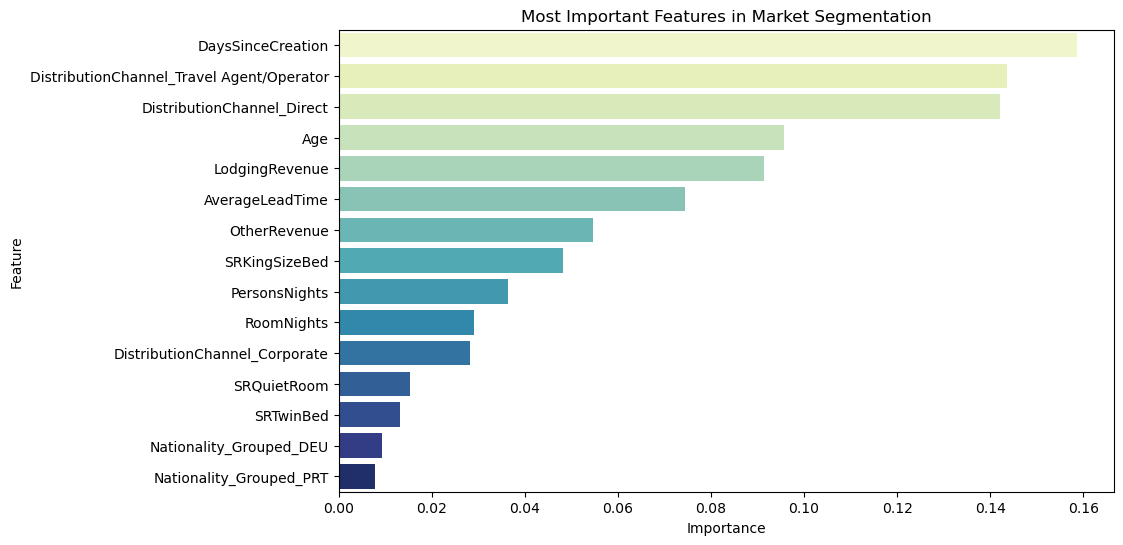

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importance.Importance[:15], 
    y=feature_importance.Feature[:15], 
    palette=sns.color_palette("YlGnBu", n_colors=15),  
    hue=feature_importance.Feature[:15], 
    legend=False)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Most Important Features in Market Segmentation")
plt.show()

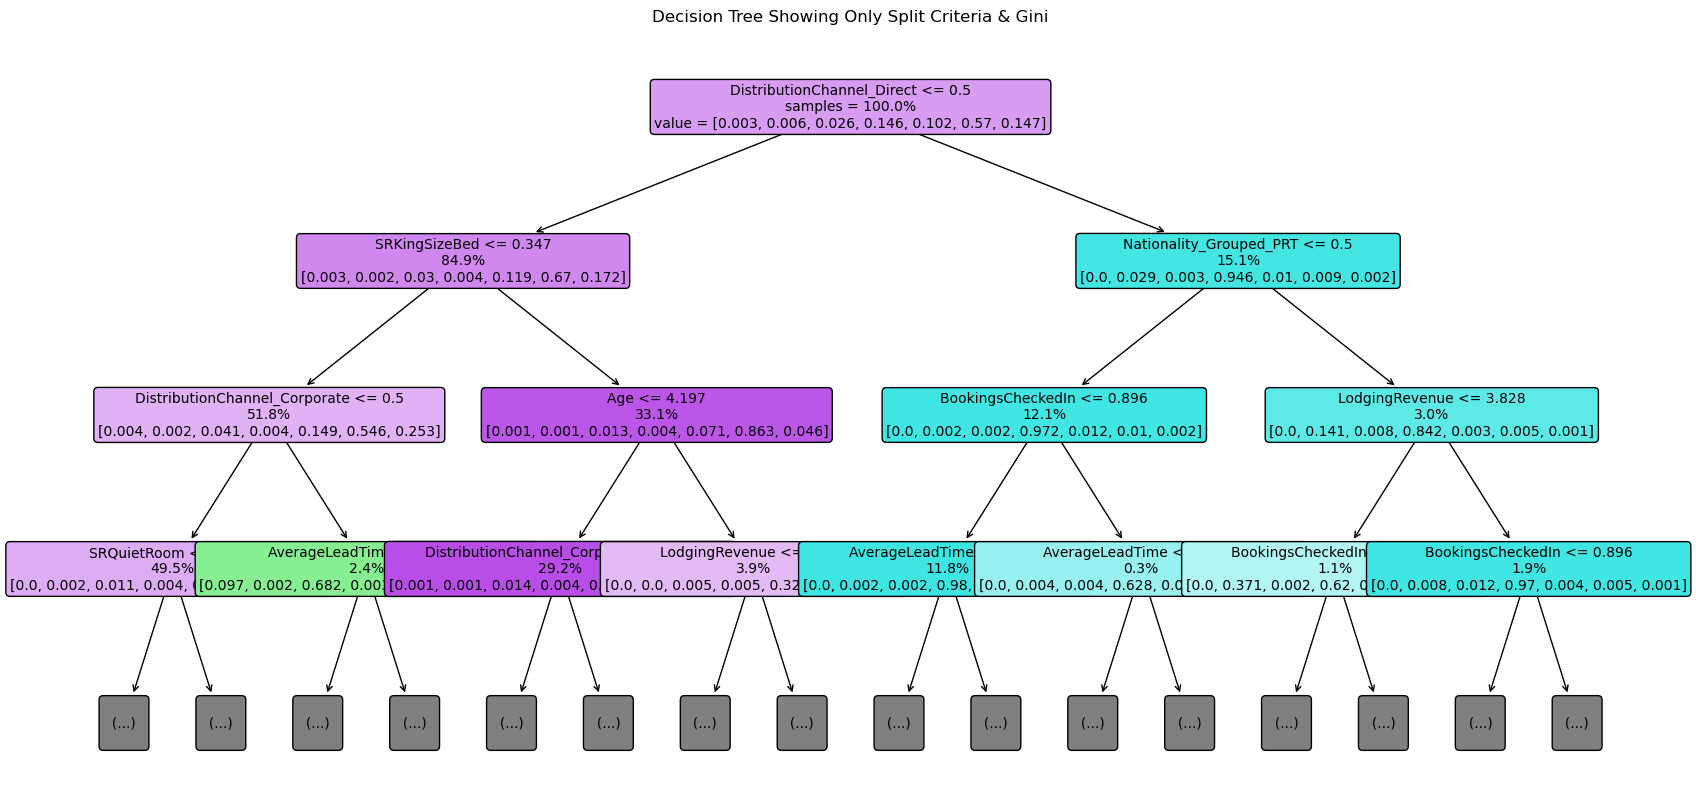

In [58]:
plt.figure(figsize=(20, 10))
plot_tree(dt, max_depth=3, feature_names=X.columns, 
class_names=None, label='root', filled=True, impurity=False, node_ids=False, proportion=True, rounded=True, fontsize=10)
plt.title("Decision Tree Showing Only Split Criteria & Gini")
plt.show()

-
  #### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Duplicates**</span> <a id='duplicatesdu'></a>  
  _Detecting and handling duplicate records._   

  ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [59]:
df_eda.duplicated().sum()

111

>We have these complete duplicates, but we also need to deal with the repeated docid we identified earlier.

---
#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Market Basket Analysis**</span> <a id='MBA'></a>  
_Applying association rule learning techniques to find patterns in customer behavior._  

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [60]:
special_requests = ['SRHighFloor', 'SRLowFloor','SRAccessibleRoom', 'SRMediumFloor', 
                    'SRBathtub', 'SRShower', 'SRCrib','SRKingSizeBed', 'SRTwinBed',
                    'SRNearElevator', 'SRAwayFromElevator','SRNoAlcoholInMiniBar', 'SRQuietRoom']

In [61]:
requests_data = df_eda[df_eda['TotalSpecialRequests'] > 1].copy()
requests_data = requests_data[special_requests]

# Apriori algorithm
frequent_itemsets = apriori(requests_data.astype(bool), min_support=0.01, use_colnames=True)

# this gives the association rules, sorted by confidence & support, min support of 0.1, lift > 1 & confidence > 0.45
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
rules.sort_values(by=['confidence', 'support'], ascending=False, inplace=True)
rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.10)]
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents      consequents   support  confidence      lift
10              (SRCrib)  (SRKingSizeBed)  0.079840    0.854148  1.138088
4   (SRAwayFromElevator)    (SRHighFloor)  0.016616    0.532787  1.625367
11       (SRKingSizeBed)         (SRCrib)  0.079840    0.106381  1.138088

ADPTAR PARA ESTE TRABALHO

(CUI_Street Food / Snacks) → (CUI_Asian)
* Support of 10.55%: Aprox 10.55% of all the considered clients order both "Street Food / Snacks" and "Asian" cuisine, indicating a moderate pairing frequency.
* Confidence of 61.80%: There’s a 61.8% chance that when users order "Street Food / Snacks," they also order "Asian" cuisine.
* Lift of 1.36: Positive association, showing that "Asian" cuisine is 1.36 times more likely to be ordered when "Street Food / Snacks" is also ordered.

**Recommendations:** The Asian cuisine is also pretty famous for its street food and snaks, so this association rule can be an opportunity to create special promotions combining these two styles like an Asian Street Food special, or simply like a promotion in some asian snakes when someone buys Street Food.

In [62]:
del df_eda

### <span style="background-color:#235987; padding:5px; border-radius:5px;"> 📌 Data Preparation</span> <a id='data-preparation'></a>

- **[Data Types](#data-types)**  
- **[Duplicates](#duplicates)**  
- **[Missing values](#missing-values)**  
    - [K-Nearest Neighbor Imputation](#knn) 
    - [SimpleImputer or Most Frequent Imputation](#mfv) 
- **[Inconsistencies](#inconsistencies)**  
- **[Feature Engineering](#feature-engineering)**  
- **[Outliers](#outliers)**  
    - **Detection:**  
        - [Z-Score](#z-score)  
        - [IQR (Interquartile Range)](#iqr)  
        - [DBSCAN](#dbscan)  
        - [Local Outlier Factor (LOF)](#lof)  
    - **Handling Strategies:**  
        - [Removal](#outlier-removal)  
        - [Winsorization](#winsorization)  
- **[Encoding](#encoding)**  
- **[Normalization & Scaling](#scaling)**  
    - **Methods:**
        - [Standard Scaling](#std-scaling)
        - [Min-Max Scaling](#min-max-scaling)
        - [Robust Scaling](#robust-scaling) 
        - [Standardization (Z-Score)](#standardization)  
        - [Log Transformation](#log-transformation)  
        - [Power Transform (Box-Cox, Yeo-Johnson)](#power-transform)  
- **[Variable pre-selection](#variable-preselection)**  
- **[Dimensionality reduction](#dimensionality-reduction)**  
    - [PCA](#pca)  
    - [t-SNE](#tsne)  
    - [UMAP](#umap)
 
<br>

- <span style="background-color:#235987; padding:5px; border-radius:5px;"> **[Final Pipeline](#final-pipeline)** </span>

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

---

In [63]:
df_preparation = df.copy()

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Data Types**</span> <a id='data-types'></a>
_By reducing memory consumption, we can enhance the performance of subsequent sections, including **feature engineering, clustering algorithms, and distance-based models**. Since these algorithms rely on calculating distances between points, reducing memory usage and optimizing data structures can significantly improve their computational efficiency._

In [64]:
df_preparation.dtypes

Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

**Problems:**  

Numerical Columns: 

- The `Age` column assumes a float format because, as seen before, it contains missing values. In Pandas, any numeric column with missing values is automatically assigned a float data type to accommodate them.  

- Furthermore, the current int/float data types seem excessive for the values stored in these columns. The only ones with relatively large values are the revenue-related columns (`LodgingRevenue` and `OtherRevenue`). However, even for them, using a `float64` data type, which can represent an extremely large range of values, is unnecessary. Optimizing these data types will help **reduce memory usage** and **improve processing efficiency**, which is particularly important for large datasets.  

Categorical Columns: 
- Apart from the `NameHash` and `DocIdHash`, the other categorical columns contain few distinct categories considering the total rows. 
- For example, the 199 unique values in the column `Nationality`, out of +100k rows, results in a low cardinality ratio (~0.2%) when we're considering **data type optimization**. In this case, using the category type is an appropriate choice because it stores each unique value as an integer ID, rather than storing the full string values. This is memory-efficient and makes the column easier to handle during data processing.
- However, even though 199 unique values might be considered low cardinality for optimizing data types, it can still be viewed as high cardinality when preparing the column for encoding. This is because encoding techniques such as one-hot encoding or label encoding can result in too many features or too many distinct values that may not contribute significantly to the model's performance. High cardinality columns can cause the curse of dimensionality, leading to overfitting and increased computational costs.
- Therefore, while we treat the column as low cardinality for data type optimization (using category), we must consider further reducing the cardinality before encoding. 


Final Notes:

- One important note: as mentioned earlier, the `Age` column will remain in float format for now because it contains missing values. We will handle these missing values in the next section, and only after that will we convert `Age` to its correct integer format. This transformation will be **integrated into the final data processing pipeline** to ensure consistency throughout the workflow. 

In [65]:
def reduce_memory_usage(df):
    """ 
    Optimize data types to reduce memory usage:
    - Converts integers to the smallest possible int type.
    - Converts floats to the smallest possible float type (at least float32).
    - Converts object columns to category if unique values are below a threshold.
    ✅ Evita float16 para prevenir erros de overflow/underflow.
    ✅ Mantém os float como float32 pelo menos, garantindo compatibilidade com cálculos estatísticos.
    """
    df = df.copy()
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Initial memory usage: {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        # Skip categorical columns
        if isinstance(col_type, pd.CategoricalDtype):
            continue

        # Optimize integer columns
        if np.issubdtype(col_type, np.integer):
            c_min, c_max = df[col].min(), df[col].max()
            if c_min >= np.iinfo(np.int8).min and c_max <= np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min >= np.iinfo(np.int16).min and c_max <= np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min >= np.iinfo(np.int32).min and c_max <= np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.int64)

        # Optimize float columns (avoid float16 to prevent precision issues)
        elif np.issubdtype(col_type, np.floating):
            c_min, c_max = df[col].min(), df[col].max()
            if c_min >= np.finfo(np.float32).min and c_max <= np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)

        # Convert object columns to category if unique values are below a threshold
        elif df[col].dtype == 'object':
            num_unique = df[col].nunique()
            num_total = len(df[col])
            if num_unique / num_total < 0.5:  # Convert if unique values < 50% of total rows
                df[col] = df[col].astype('category')

    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Optimized memory usage: {end_mem:.2f} MB")
    print(f"Memory reduced by {100 * (start_mem - end_mem) / start_mem:.1f}%")
    
    return df

In [66]:
test_df = reduce_memory_usage(df_preparation)

Initial memory usage: 67.68 MB
Optimized memory usage: 33.49 MB
Memory reduced by 50.5%


In [67]:
test_df.dtypes

Nationality             category
Age                      float32
DaysSinceCreation          int16
NameHash                  object
DocIDHash                 object
AverageLeadTime            int16
LodgingRevenue           float32
OtherRevenue             float32
BookingsCanceled            int8
BookingsNoShowed            int8
BookingsCheckedIn           int8
PersonsNights               int8
RoomNights                 int16
DistributionChannel     category
MarketSegment           category
SRHighFloor                 int8
SRLowFloor                  int8
SRAccessibleRoom            int8
SRMediumFloor               int8
SRBathtub                   int8
SRShower                    int8
SRCrib                      int8
SRKingSizeBed               int8
SRTwinBed                   int8
SRNearElevator              int8
SRAwayFromElevator          int8
SRNoAlcoholInMiniBar        int8
SRQuietRoom                 int8
dtype: object

As expected, `Age` is still a float, but now we can proced to correct the missing values issue.

> We decided to perfom this optimization at the end to avoid some compatability problems during the next stages.

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Duplicates**</span> <a id='duplicates'></a>
_We saw before that we have 111 total missing values (all the columns the same), but we also need to see if we have customers with the same NameHash and DocIDHash combination because this can be a duplicate record of the same customer and we need to merge the information of these customers._

In [68]:
optimized_df = df_preparation.copy()

In [69]:
duplicates = optimized_df[optimized_df.duplicated(keep=False)]
duplicates.head(10)

Nationality   Age  DaysSinceCreation  \
ID                                          
594          ROU  38.0               1365   
595          ROU  38.0               1365   
701          BRA  26.0               1359   
702          BRA  26.0               1359   
1110         PRT   NaN               1345   
1111         PRT   NaN               1345   
1377         PRT   NaN               1340   
1391         PRT   NaN               1340   
1403         PRT   NaN               1340   
1419         PRT   NaN               1339   

                                               NameHash  \
ID                                                        
594   0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...   
595   0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...   
701   0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...   
702   0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...   
1110  0x517974F81AFEBB5A7D7364B258EF7E3536190C01850F...   
1111  0x517974F81AFEBB5A7D7364B258EF7E3536190C01850F...   
1377  0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   
1391  0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   
1403  0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   
1419  0x234D43A3F656FDFD3A585F2B32B3D5AE092BC30C78E3...   

                                              DocIDHash  AverageLeadTime  \
ID                                                                         
594   0x9CD129744684370C750190DB02D767653BB96C8119B3...                0   
595   0x9CD129744684370C750190DB02D767653BB96C8119B3...                0   
701   0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...                0   
702   0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...                0   
1110                                                NaN                0   
1111                                                NaN                0   
1377                                                NaN                0   
1391                                                NaN                0   
1403                                                NaN                0   
1419                                                NaN                0   

      LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                       
594              0.0           0.0                 0                 0   
595              0.0           0.0                 0                 0   
701              0.0           0.0                 0                 0   
702              0.0           0.0                 0                 0   
1110             0.0           0.0                 0                 0   
1111             0.0           0.0                 0                 0   
1377             0.0           0.0                 0                 0   
1391             0.0           0.0                 0                 0   
1403             0.0           0.0                 0                 0   
1419             0.0           0.0                 0                 0   

      BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                          
594                   0              0           0  Travel Agent/Operator   
595                   0              0           0  Travel Agent/Operator   
701                   0              0           0              Corporate   
702                   0              0           0              Corporate   
1110                  0              0           0  Travel Agent/Operator   
1111                  0              0           0  Travel Agent/Operator   
1377                  0              0           0  Travel Agent/Operator   
1391                  0              0           0  Travel Agent/Operator   
1403                  0              0           0  Travel Agent/Operator   
1419                  0              0           0  Travel Agent/Operator   

              MarketSegment 

We aim to investigate whether repeated or missing values in certain columns can reveal the source of duplicates and help prevent them in the future. By analyzing which columns have identical values across duplicates, we may identify patterns indicating systemic issues. If duplicates frequently contain NaNs, this could suggest data entry problems. Additionally, tracking duplicates over time can show whether the issue was more common in the past or is ongoing. Identifying these patterns allows us to pinpoint potential causes and take corrective actions to improve data integrity.

In [70]:
# Identify columns where all values are identical across duplicates
common_columns = duplicates.nunique() == 1
common_columns = common_columns[common_columns].index.tolist()

# Extract the first value for each common column (since all are identical)
common_values = {col: duplicates[col].iloc[0] for col in common_columns}

print("Columns with identical values in duplicates and their values:")
for col, val in common_values.items():
    print(f"{col}: {val}")

Columns with identical values in duplicates and their values:
BookingsCanceled: 0
BookingsNoShowed: 0
SRHighFloor: 0
SRLowFloor: 0
SRAccessibleRoom: 0
SRMediumFloor: 0
SRBathtub: 0
SRShower: 0
SRNearElevator: 0
SRAwayFromElevator: 0
SRNoAlcoholInMiniBar: 0


In [71]:
# Count duplicates per DaysSinceCreation
duplicate_counts = duplicates.groupby("DaysSinceCreation").size().reset_index(name="Count")

fig = px.line(
    duplicate_counts, 
    x="DaysSinceCreation", 
    y="Count", 
    markers=True, 
    title="Trend of Duplicate Entries Over Time",
    labels={"DaysSinceCreation": "Days Since Creation", "Count": "Number of Duplicates"})
fig.update_traces(
    hovertemplate="Day: %{x}<br>Duplicates: %{y}")
fig.show()

Nothing particularly incriminating—it's possible that one person made the reservation for a group, and each member checked into their own room, but the staff handling the check-in kept all records under the same name. However, with the current information available, it's difficult to confirm this scenario. 

> We will remove these rows.

In [72]:
optimized_df.drop_duplicates(inplace = True)

Now, the second case (more than one record for the same person), we know that the DocIDHash should be unique, but we notice that we have some non unique ids:

In [73]:
doc_id_counts = optimized_df['DocIDHash'].value_counts()
doc_id_counts = doc_id_counts[doc_id_counts > 1]
doc_id_counts

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    3021
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      31
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      24
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      15
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      14
                                                                      ... 
0x0B55276B283C2AAE2333E849091AB6FDD31DAA5E6D9C3744F9FDBED802E072E7       2
0x72A57D435849B9E796C9BEF993EE1A88F9B207F26F163A98F3217AB78B63684A       2
0x9775185620EA4FC990A1018F24E0E5376C0ADFFD1145E99391EDDA9994607730       2
0x9F19E7E240FFCAE70B66C2B2160E5CD685734070D0B9EABBF1580E27EC2FDC22       2
0x7BFEA5100BDC372A6A40BD31BE4B43A2735FCDB7A7B3029AF276AD9C7648CE74       2
Name: count, Length: 3060, dtype: int64

We know that having the same **DocIDHash** would typically indicate a single client. However, in some cases, the person checking in might not have their ID with them, leading the operator to enter a placeholder like `"."`, `"Na"`, or another standard value (thats probably why we have 3021 entries of the same Id). 

> Since the hash function is **deterministic**—meaning the same input always produces the same hash—this could result in multiple different guests being assigned the same **DocIDHash**, potentially creating false duplicates.

The problem is that without the DocIDHash, we cannot reliably identify an individual, as people from the same country can have the same name. This makes it difficult to distinguish between different guests, especially in cases where the DocIDHash is missing or replaced with a placeholder. Without a unique identifier, false duplicates may occur, complicating data integrity and analysis.

We will handle three cases:
> 1. A single name appearing multiple times under the same DocIDHash → We assume it's the same person and aggregate their data.
> 
> 2. A single name appearing only once! under a shared DocIDHash → It could be a special case, like a company ID used for different people. We should separate them (just to simplify the final analysis).
> 
> 3. Names appearing multiple times under the DocIDHash with multiple names → This requires further analysis to determine if they are truly the same person or different people. (people from the same country can have the same name)

In [74]:
# Create a dictionary to store names per DocIDHash
doc_id_to_names = defaultdict(lambda: defaultdict(int))
for _, row in optimized_df.iterrows():
    doc_id_to_names[row['DocIDHash']][row['NameHash']] += 1

In [75]:
for doc_id, names_counts in doc_id_to_names.items():
    matching_rows = optimized_df[optimized_df['DocIDHash'] == doc_id]
    
    multiple_occurrences = {name: count for name, count in names_counts.items() if count > 1}
    single_occurrences = {name: count for name, count in names_counts.items() if count == 1}
    
    if len(multiple_occurrences) == 1 and len(single_occurrences) == 0:
        # Case 1: Only one name appears multiple times → Aggregate
        optimized_df.loc[optimized_df['DocIDHash'] == doc_id, 'dup_cases'] = "Case_1"
    else:
        # Case 2 & Case 3 (Mixed or Pure Cases)
        for idx, row in matching_rows.iterrows():
            if row['NameHash'] in single_occurrences:
                optimized_df.at[idx, 'dup_cases'] = "Case_2"
            else:
                optimized_df.at[idx, 'dup_cases'] = "Case_3"

In [76]:
# Categorize Cases
def categorize_case(row):
    doc_id = row['DocIDHash']
    name_counts = doc_id_to_names[doc_id]
    
    multiple_occurrences = {name: count for name, count in name_counts.items() if count > 1}
    single_occurrences = {name: count for name, count in name_counts.items() if count == 1}
    
    if len(multiple_occurrences) == 1 and len(single_occurrences) == 0:
        return "Case_1"
    elif row['NameHash'] in single_occurrences:
        return "Case_2"
    else:
        return "Case_3"

optimized_df['dup_cases'] = optimized_df.apply(categorize_case, axis=1)

In [77]:
#file_path = 'optimized_df.xlsx'
#optimized_df.to_excel(file_path, index=False)

> Case 1: A single name appearing multiple times under the same DocIDHash

In [78]:
optimized_df['index'] = optimized_df.index
agg_functions = {
    'index': 'first',
    'Nationality': 'first',
    'Age': 'max',  
    'DaysSinceCreation': 'max',  # Keep the first DaysSinceCreation (original longevity of the client- if by mistake we create a new file for one of our oldest clients we still want to know that)
    'DocIDHash': 'first',
    'NameHash': 'first',
    'AverageLeadTime': 'mean',  
    'LodgingRevenue': 'sum',  # Sum of LodgingRevenue
    'OtherRevenue': 'sum',  # Sum of OtherRevenue
    'BookingsCanceled': 'sum',  # Sum of BookingsCanceled
    'BookingsNoShowed': 'sum',  # Sum of BookingsNoShowed
    'BookingsCheckedIn': 'sum',  # Sum of BookingsCheckedIn
    'PersonsNights': 'sum',  # Sum of PersonsNights
    'RoomNights': 'sum',  # Sum of RoomNights
    'DistributionChannel': 'last',  # Keep the last DistributionChannel (most recent)
    'MarketSegment': 'last', 
    'SRHighFloor': 'max',  # Maximum value of SRHighFloor
    'SRLowFloor': 'max',  # Maximum value of SRLowFloor
    'SRAccessibleRoom': 'max',  # Maximum value of SRAccessibleRoom
    'SRMediumFloor': 'max',  # Maximum value of SRMediumFloor
    'SRBathtub': 'max',  # Maximum value of SRBathtub
    'SRShower': 'max',  # Maximum value of SRShower
    'SRCrib': 'max',  # Maximum value of SRCrib
    'SRKingSizeBed': 'max',  # Maximum value of SRKingSizeBed
    'SRTwinBed': 'max',  # Maximum value of SRTwinBed
    'SRNearElevator': 'max',  # Maximum value of SRNearElevator
    'SRAwayFromElevator': 'max',  # Maximum value of SRAwayFromElevator
    'SRNoAlcoholInMiniBar': 'max',  # Maximum value of SRNoAlcoholInMiniBar
    'SRQuietRoom': 'max',  # Maximum value of SRQuietRoom
    'dup_cases': 'first'
}

In [79]:
aggregated_df = (
    optimized_df[optimized_df['dup_cases'] == 'Case_1']
    .groupby(['DocIDHash', 'NameHash'])
    .agg(agg_functions)
    .reset_index(drop=True)
)

df_clean = pd.concat([
    optimized_df[optimized_df['dup_cases'] != 'Case_1'],  
    aggregated_df  
], ignore_index=True)

> Case 2: A single name appearing only once! even if under an id with multiple names

In [80]:
# CASE 2: MODIFY DOCIDHASH ---
case_2_mask = (df_clean['dup_cases'] == 'Case_2') & (df_clean['DocIDHash'].isin(doc_id_counts.index))

df_clean.loc[case_2_mask, 'DocIDHash'] = df_clean.loc[case_2_mask].apply(
    lambda row: f"{row['DocIDHash']}_{row['NameHash'][-4:]}", axis=1)

In [81]:
#file_path = 'df_clean.xlsx'
#df_clean.to_excel(file_path, index=False)

With excel we were able to compare individual cases to make sure the tranformations were correct

> Case 3: Uncertain Cases

In [82]:
doc_id_counts2 = df_clean['DocIDHash'].value_counts()
doc_id_counts2 = doc_id_counts2[doc_id_counts2 > 1]
doc_id_counts2

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    344
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B     26
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52     21
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003     13
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076     12
                                                                     ... 
0xC486BF8825FEC62281795F6B940EC902FF88A698E22686F47A31602535A20E59      2
0x50CE1B637E9FB91F785A2EF8F94D5A9F6B1428578DBA678880FDBABE67FDE79A      2
0xD92B371CE845514CAC9D7AA9E16F402B132E5EC5F8F61628D9D56D58EFF8CD0E      2
0x14E48EA6567E552144860BBBECE6B8047894DBBF68D2765BE8DF2A7306C58D74      2
0x3987318C906856558670343730E4F2D428248189543F8DA0BBFBC5E7DE904DC8      2
Name: count, Length: 293, dtype: int64

In [83]:
# Ensure all rows with NaN 'DocIDHash' and 'dup_cases' == 'Case_3' have a sum of 0 for the booking-related columns
assert (df_clean.loc[
            df_clean['DocIDHash'].isna() & (df_clean['dup_cases'] == 'Case_3'), 
            ['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']
        ].sum(axis=1) == 0).all(), "❌ Some rows with NaN 'DocIDHash' and 'Case_3' have non-zero booking-related values."

print("✅ All rows with NaN 'DocIDHash' and 'Case_3' have a sum of 0 for the booking-related columns.")

✅ All rows with NaN 'DocIDHash' and 'Case_3' have a sum of 0 for the booking-related columns.


So basically these are not real cutomer records, we can remove these rows.

In [84]:
df_clean = df_clean.loc[~(df_clean['DocIDHash'].isna() & (df_clean['dup_cases'] == 'Case_3'))]

estiveos a ver e os restantes do id defaut correspondem quase a todas as entradas de missing age , isto pode consitituir assertos na revenue mas nao temos como ligar diretamente.

In [85]:
df_clean = df_clean[df_clean['DocIDHash'] != "0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855"]

Restantes casos parecem ser derivados de grupos ou empresas:-......

In [86]:
aggregated_case_3 = (
    df_clean[df_clean['dup_cases'] == 'Case_3']
    .groupby(['DocIDHash', 'NameHash'])
    .agg(agg_functions)
    .reset_index(drop=True)  # Reset index
)

# Step 4: Merge back the processed Case 3 rows into df_clean
df_clean = pd.concat([
    df_clean[df_clean['dup_cases'] != 'Case_3'],  # Keep non-aggregated rows
    aggregated_case_3  # Add aggregated Case 3 rows
], ignore_index=True)  # Reset index

In [87]:
df_clean = df_clean.drop(columns=['DocIDHash', 'NameHash', 'dup_cases', 'index'])

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Inconsistencies**</span> <a id='inconsistencies'></a>
_Correcting the inconsistencies we found during EDA_

> Correcting Negative values in Average Lead Time (dont make sense to have a negative value in here)

In [88]:
len(df_clean[df_clean['AverageLeadTime'] < 0])

13

In [89]:
# Removing Records with AverageLeadTime < 0
df_clean = df_clean[df_clean['AverageLeadTime'] >= 0]

> Correcting negative ages and restricting the interval for customers eligible for marketing purposes.

In [90]:
# Removing customers with Age < 18 and Age > 100
df_clean = df_clean.drop(df_clean[(df_clean['Age'] < 17) | (df_clean['Age'] > 100)].index)

> **Potential Customers:** Previously, we removed some rows with zero bookings because their DocIDHash was NaN, making it impossible to associate them with a specific individual. However, the remaining records with zero bookings belong to potential customers—users who registered on the website but have not yet made a reservation. Since these cases differ from the others, we will handle them separately and apply a targeted marketing strategy to encourage them to book with us.

In [91]:
len(df_clean[(df_clean['BookingsCheckedIn'] == 0)])

26854

In [92]:
potential_customers = df_clean[((df_clean['BookingsCanceled'] == 0) & (df_clean['BookingsNoShowed'] == 0) & (df_clean['BookingsCheckedIn'] == 0))]

In [93]:
df_clean = df_clean[~((df_clean['BookingsCanceled'] == 0) & (df_clean['BookingsNoShowed'] == 0) & (df_clean['BookingsCheckedIn'] == 0))]

> Negative Revenue

In [94]:
len(df_clean[(df_clean['LodgingRevenue'] < 0) | (df_clean['OtherRevenue'] < 0)])

0

> Negative persons/rooms per night

In [95]:
len(df_clean[((df_clean['PersonsNights'] < 0) | (df_clean['RoomNights'] < 0))])

0

In [96]:
len(df_clean[(df_clean['BookingsCheckedIn'] > 0) & ((df_clean['RoomNights'] == 0) | (df_clean['PersonsNights'] == 0))])

3

In [97]:
df_clean = df_clean[~((df_clean['BookingsCheckedIn'] > 0) & ((df_clean['RoomNights'] == 0) | (df_clean['PersonsNights'] == 0)))]

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Missing Values**</span> <a id='missing-values'></a>
_K-Nearest Neighbor Imputation vs. SimpleImputer or Most Frequent Imputation_

In [98]:
df_missing = df_clean.copy()

In [99]:
# Checking missing values - Code adapted from prev notebook
missing_values = df_missing.isnull().sum().to_frame(name='Total')
missing_values['Percentage'] = (missing_values['Total'] / len(df_missing) * 100).round(2).astype(str) + '%'
missing_values.sort_values(by='Total', ascending=False, inplace=True)
missing_values

Total Percentage
Age                    2682      3.57%
Nationality               0       0.0%
SRNoAlcoholInMiniBar      0       0.0%
SRAwayFromElevator        0       0.0%
SRNearElevator            0       0.0%
SRTwinBed                 0       0.0%
SRKingSizeBed             0       0.0%
SRCrib                    0       0.0%
SRShower                  0       0.0%
SRBathtub                 0       0.0%
SRMediumFloor             0       0.0%
SRAccessibleRoom          0       0.0%
SRLowFloor                0       0.0%
SRHighFloor               0       0.0%
MarketSegment             0       0.0%
DistributionChannel       0       0.0%
RoomNights                0       0.0%
PersonsNights             0       0.0%
BookingsCheckedIn         0       0.0%
BookingsNoShowed          0       0.0%
BookingsCanceled          0       0.0%
OtherRevenue              0       0.0%
LodgingRevenue            0       0.0%
AverageLeadTime           0       0.0%
DaysSinceCreation         0       0.0%
SRQuietRoom               0       0.0%

In [100]:
#df_missing['Age'] = df_missing['Age'].astype('float32')
df_KNN = df_missing.copy()
df_mfv = df_missing.copy()

**K-Nearest Neighbor Imputation for Age**

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor'.

In [101]:
# Step 1: Fit the scaler and transform
scaler = StandardScaler()
df_KNN['Age_scaled'] = scaler.fit_transform(df_KNN[['Age']])

# Step 2: Apply KNN Imputation on the scaled data
knn_imputer = KNNImputer(n_neighbors=5)
df_KNN['Age_scaled'] = knn_imputer.fit_transform(df_KNN[['Age_scaled']])

# Step 3: Reverse the scaling to get the original age range
df_KNN['Age'] = scaler.inverse_transform(df_KNN[['Age_scaled']])

# Optional: Drop the intermediate scaled column if no longer needed
df_KNN.drop(columns=['Age_scaled'], inplace=True)

**SimpleImputer or Most Frequent Imputation for Age**

...

In [102]:
mode_imputer = SimpleImputer(strategy='most_frequent') #Imputer that fills missing values with the most frequent value

In [103]:
df_mfv[['Age']] = mode_imputer.fit_transform(df_mfv[['Age']])

**Comparing Methods**

...

In [104]:
original = df_missing['Age'].describe().T
knn = df_KNN['Age'].describe().T
mfv = df_mfv['Age'].describe().T

In [105]:
# DataFrame to compare the values
comparison_df = pd.DataFrame({'Original': original,'KNN': knn,'MFV': mfv})

comparison_df['KNN_diff'] = abs(comparison_df['Original'] - comparison_df['KNN']) # absolute differences from the original for KNN and MFV
comparison_df['MFV_diff'] = abs(comparison_df['Original'] - comparison_df['MFV'])

# in here is to determine which method is closer or if it's a tie
comparison_df['Closer_Method'] = np.where(
    comparison_df['KNN_diff'] < comparison_df['MFV_diff'], 'KNN',
    np.where(comparison_df['KNN_diff'] > comparison_df['MFV_diff'], 'MFV', 'Tie'))

# Highlight the closer method 
def highlight_closer(row):
    if row['Closer_Method'] == 'KNN':
        return ['background-color: green' if col == 'KNN' else '' for col in comparison_df.columns]
    elif row['Closer_Method'] == 'MFV':
        return ['background-color: green' if col == 'MFV' else '' for col in comparison_df.columns]
    elif row['Closer_Method'] == 'Tie':
        return ['background-color: green' if col in ['KNN', 'MFV'] else '' for col in comparison_df.columns]
    else:
        return ['' for _ in comparison_df.columns]

styled_df = comparison_df.style.apply(highlight_closer, axis=1)
styled_df

So 2 things: in absolute terms its a tie (1 for the KNN method and other for the Most frequent value) BUT the absolute difference is always smaller for the KNN method and since clustering often relies on pairwise distances, variability, and overall data structure - KNN might be more suitable because it considers neighboring values, which could better maintain relationships between data points

In [106]:
df_preparation = df_KNN.copy()

In [107]:
df_preparation.isna().sum()

Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [108]:
df_preparation = reduce_memory_usage(df_preparation)

Initial memory usage: 26.39 MB
Optimized memory usage: 3.60 MB
Memory reduced by 86.4%


---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Feature Engineering**</span> <a id='feature-engineering'></a>
_Now that we solve the ...._

In [109]:
df_new = df_preparation.copy()

---

**BookingFrequency** measures how often a customer has interacted with the hotel, regardless of the outcome (check-in, cancellation, or no-show). 

⚠ **Interpretation:**  

🔹 **High BookingFrequency** → The customer frequently books at the hotel (*can indicate loyalty or repeat visits*).  
🔹 **Low BookingFrequency** → The customer rarely books (*may be a one-time guest or new customer*).  

In [110]:
df_new['BookingFrequency'] = df_new['BookingsCheckedIn'] + df_new['BookingsCanceled'] + df_new['BookingsNoShowed']

---

**BookingSuccessRate** measures the proportion of bookings that actually resulted in a stay. It helps assess customer reliability.  

⚠ **Interpretation:**  

🔹 **High BookingSuccessRate** → Most bookings result in actual stays (*indicates reliable customers*).  
🔹 **Low BookingSuccessRate** → Many bookings are canceled or result in no-shows (*may indicate indecisive or unreliable customers*).  

In [111]:
df_new['BookingSuccessRate'] = (df_new['BookingsCheckedIn'] / df_new['BookingFrequency'])

---

**TotalSpecialRequests** counts the number of specific room preferences a customer has made. 

⚠ **Interpretation:**  

🔹 **High TotalSpecialRequests** → Customer has specific needs.  
🔹 **Low TotalSpecialRequests** → Customer has fewer preferences.  

In [112]:
total_special_requests = df_new['SRHighFloor'] + df_new['SRLowFloor'] + df_new['SRAccessibleRoom'] + \
                         df_new['SRMediumFloor'] + df_new['SRBathtub'] + df_new['SRShower'] + \
                         df_new['SRCrib'] + df_new['SRKingSizeBed'] + df_new['SRTwinBed'] + \
                         df_new['SRNearElevator'] + df_new['SRAwayFromElevator'] + \
                         df_new['SRNoAlcoholInMiniBar'] + df_new['SRQuietRoom']
df_new['TotalSpecialRequests'] = total_special_requests

In [113]:
df_new['SRFloor'] = df_new['SRHighFloor'] + df_new['SRMediumFloor'] + df_new['SRLowFloor']
df_new['SRBed'] = df_new['SRKingSizeBed'] + df_new['SRTwinBed'] + df_new['SRCrib']
df_new['SRNoisePreference'] = df_new['SRNearElevator'] + df_new['SRAwayFromElevator'] + df_new['SRQuietRoom']
df_new['SRBathroom'] = df_new['SRBathtub'] + df_new['SRShower']

---

**Total_Revenue** is the total amount spent by the customer, including room charges and additional services. It helps evaluate customer value.  

⚠ **Interpretation:**  

🔹 **High Total_Revenue** → Customer spends a lot (*may indicate a high-value customer or luxury traveler*).  
🔹 **Low Total_Revenue** → Customer spends less (*may indicate budget traveler or short stays*).  

**SpendingPerBooking** calculates the average amount spent per booking. It helps understand the financial value of each booking.  

In [114]:
df_new['Total_Revenue'] = df_new['LodgingRevenue'] + df_new['OtherRevenue']

df_new['SpendingPerBooking'] = df_new['Total_Revenue'] / df_new['BookingFrequency'] 

---

**RevenuePerPersonNight** measures the average revenue generated per person per night. It helps assess spending behavior on an individual basis.  

⚠ **Interpretation:**  

🔹 **High RevenuePerPersonNight** → Higher spending per person (*may indicate luxury travelers or high-priced services*).  
🔹 **Low RevenuePerPersonNight** → Lower spending per person (*may indicate budget-conscious guests*).  

In [115]:
df_new['RevenuePerPersonNight'] = np.where(df_new['PersonsNights'] == 0, 0, df_new['Total_Revenue'] / df_new['PersonsNights'])

---
**AvgOccupancy (Average Occupancy Rate)** measures the average number of people staying per room night. It helps hotels understand room utilization efficiency.  

⚠ **Interpretation:**  

🔹 **High AvgOccupancy** → More people per room (*can indicate family/group bookings or high demand for shared accommodations*).  
🔹 **Low AvgOccupancy** → Fewer people per room (*can indicate business travelers or underutilized space*). 

In [116]:
df_new['AvgOccupancy'] = np.where(df_new['RoomNights'] == 0, 0, df_new['PersonsNights'] / df_new['RoomNights'])

---
**ADR (Average Daily Rate)** is a key performance metric in the hotel industry that measures the average revenue earned per occupied room per night. It helps hotels understand how much they are charging per night on average for their rooms - helps the hotel optimize pricing and profitability.

- **Total Revenue** = `LodgingRevenue + OtherRevenue`  
  - *Lodging Revenue:* Money earned from room bookings.  
  - *Other Revenue:* Additional revenue from food, spa, etc.  
- **Room Nights** = `(Number of rooms per booking) × (Number of nights stayed)`  

⚠ **Interpretation:**  

🔹 **High ADR** → Guests are paying more per night (*can indicate a premium hotel or peak season*).  
🔹 **Low ADR** → Lower pricing or discounts (*can indicate promotions, low season, or budget hotel*).   

In [117]:
df_new['ADR'] = np.where(df_new['RoomNights'] == 0, 0, df_new['Total_Revenue'] / df_new['RoomNights'])

 **Days Since Creation** represents the number of days since a customer’s record was first created in the system. It helps understand how long a customer has been associated with the hotel, but it does not necessarily indicate engagement or loyalty.  

📊 **Categories:**  
- **Newly Registered** → Customers who have recently entered the system.  
- **Developing** → Customers with some history but not long-term.  
- **Established** → Customers with a significant duration in the system.  
- **Longstanding** → Customers who have been in the system for an extended period.  

**Average Lead Time** measures the number of days between the booking date and the check-in date. It helps hotels analyze guest booking behavior.  

📊 **Categories:**  
- **Last-minute** → Bookings made close to check-in.  
- **Moderate Planners** → Guests who book a few weeks in advance.  
- **Advance Planners** → Guests who plan their stays well in advance.  
- **Long-term Planners** → Guests who book months ahead.  

In [118]:
# Calculate percentiles for categories
days_percentiles = df_new['DaysSinceCreation'].quantile([0.25, 0.50, 0.75]).tolist() 
lead_percentiles = df_new['AverageLeadTime'].quantile([0.25, 0.50, 0.75]).tolist()
days_bins = [0] + days_percentiles + [float('inf')] #[0, 382.0, 717.0, 1019.0, inf]
lead_bins = [0] + lead_percentiles + [float('inf')] #[0, 18.0, 59.0, 133.0, inf]

# Category labels
days_labels = ['Newly Registered', 'Developing', 'Established', 'Longstanding']
lead_labels = ['Last-minute', 'Moderate Planners', 'Advance Planners', 'Long-term Planners']

# Categorization
df_new['DaysSinceCreation_Category'] = pd.cut(df_new['DaysSinceCreation'], bins=days_bins, labels=days_labels, include_lowest=True)
df_new['AverageLeadTime_Category'] = pd.cut(df_new['AverageLeadTime'], bins=lead_bins, labels=lead_labels, include_lowest=True)

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Outliers**</span> <a id='outliers'></a>
_..._

In [119]:
columns_to_exclude = ['BookingsCheckedIn', 'BookingsCanceled', 'BookingsNoShowed', 
                     'SRHighFloor', 'SRMediumFloor', 'SRLowFloor', 'SRKingSizeBed', 'SRTwinBed', 'SRCrib',
                     'SRNearElevator', 'SRAwayFromElevator', 'SRQuietRoom', 'SRBathtub', 'SRShower']
columns_to_keep = [col for col in df_new.columns if col not in columns_to_exclude]
df_outliers = df_new.copy()

In [120]:
numeric_variables = df_outliers[columns_to_keep].select_dtypes(include=['number']).columns.tolist() 

🔹 **Detection Methods**
- **IQR (Interquartile Range)** <a id='iqr'></a>

In [121]:
#https://github.com/DeepSparkChaker/GiveMeCredit_Top5_Solution_Kaggle/blob/main/credit-part2-data-preparation-5-features_engineer.ipynb
def get_outliers(numeric_df, outlier_threshold=1.5):
    """
    Gives us the percentage of outliers for each numeric column based on the IQR method. Adapt the theshold if needed.
    
    """
    # Q1, Q3, and IQR for numeric columns
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outlier_counts = ((numeric_df < (Q1 - outlier_threshold * IQR)) | 
                      (numeric_df > (Q3 + outlier_threshold * IQR))).sum()

    # Percentage of outliers
    total_rows = len(numeric_df)
    outlier_percentages = (outlier_counts / total_rows) * 100
    formatted_percentages = outlier_percentages[outlier_percentages > 0].sort_values(ascending=False).apply(lambda x: f"{x:.2f}%")

    return formatted_percentages

In [122]:
outlier_counts = get_outliers(df_outliers[numeric_variables])

In [123]:
outlier_counts

AvgOccupancy             36.11%
SRNoisePreference         8.97%
ADR                       8.44%
RevenuePerPersonNight     8.26%
OtherRevenue              6.57%
Total_Revenue             6.36%
LodgingRevenue            6.34%
SpendingPerBooking        6.05%
SRFloor                   4.40%
BookingFrequency          4.37%
PersonsNights             3.40%
AverageLeadTime           2.60%
RoomNights                2.09%
TotalSpecialRequests      0.95%
SRBathroom                0.46%
BookingSuccessRate        0.21%
SRAccessibleRoom          0.03%
Age                       0.02%
SRNoAlcoholInMiniBar      0.01%
SRBed                     0.00%
dtype: object

In [124]:
columns_with_outliers = outlier_counts.index.tolist()

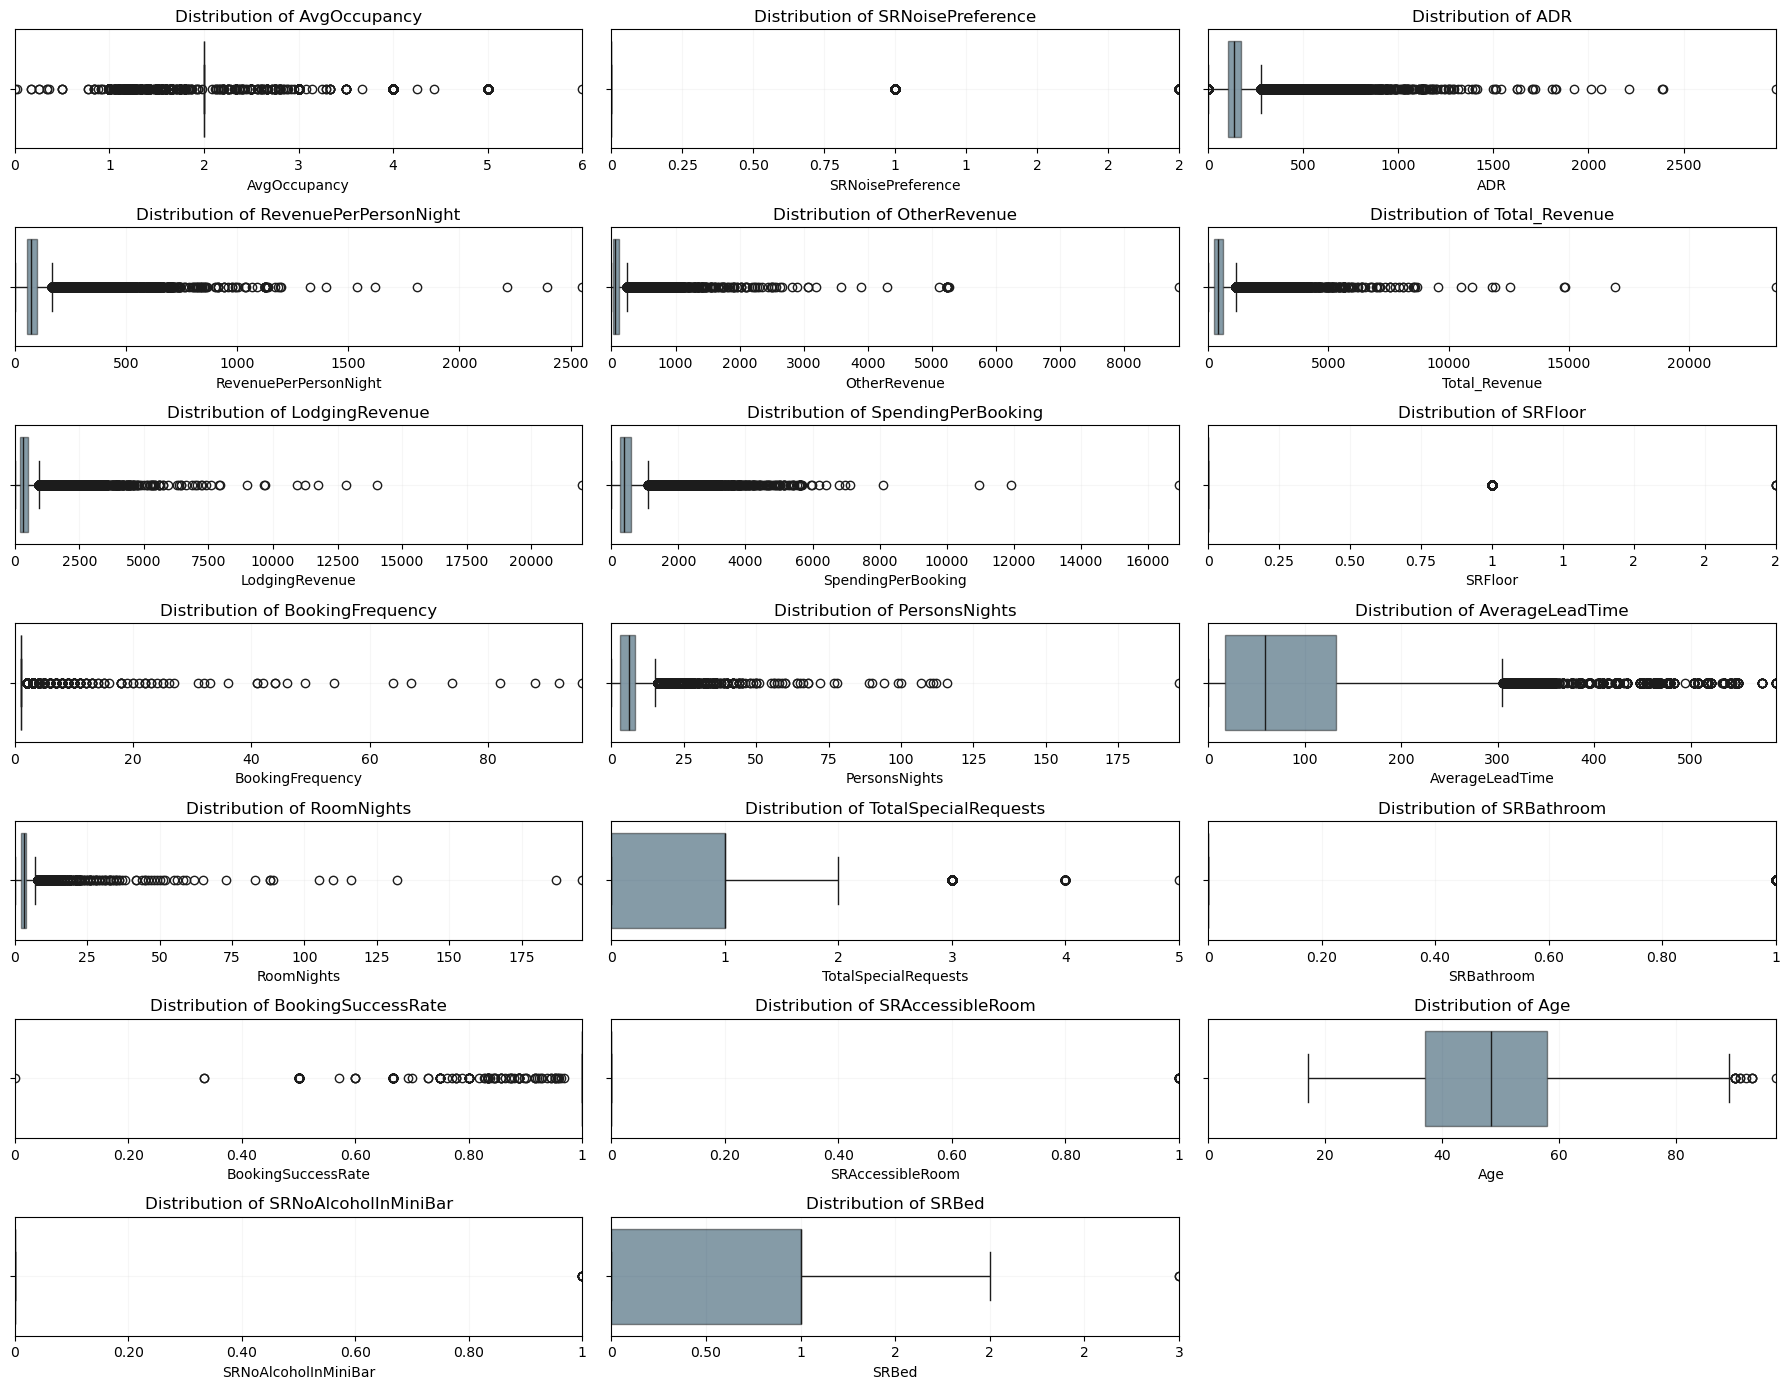

Variable   Min  Lower Fence          Q1      Median  \
0            AvgOccupancy   0.0     2.000000    2.000000    2.000000   
1       SRNoisePreference   0.0     0.000000    0.000000    0.000000   
2                     ADR   0.0     1.188744  105.000000  134.000000   
3   RevenuePerPersonNight   0.0   -12.908327   54.916668   71.000000   
4            OtherRevenue   0.0  -104.000000   28.000000   60.000000   
5           Total_Revenue   0.0  -287.175018  248.250000  393.000000   
6          LodgingRevenue   0.0  -258.800018  191.679993  315.799988   
7      SpendingPerBooking   0.0  -275.024986  241.740005  381.299988   
8                 SRFloor   0.0     0.000000    0.000000    0.000000   
9        BookingFrequency   1.0     1.000000    1.000000    1.000000   
10          PersonsNights   0.0    -4.500000    3.000000    6.000000   
11        AverageLeadTime   0.0  -154.500000   18.000000   59.000000   
12             RoomNights   0.0    -1.000000    2.000000    3.000000   
13   TotalSpecialRequests   0.0    -1.500000    0.000000    1.000000   
14             SRBathroom   0.0     0.000000    0.000000    0.000000   
15     BookingSuccessRate   0.0     1.000000    1.000000    1.000000   
16       SRAccessibleRoom   0.0     0.000000    0.000000    0.000000   
17                    Age  17.0     5.500000   37.000000   48.428909   
18   SRNoAlcoholInMiniBar   0.0     0.000000    0.000000    0.000000   
19                  SRBed   0.0    -1.500000    0.000000    1.000000   

            Q3  Upper Fence           Max  
0     2.000000     2.000000      6.000000  
1     0.000000     0.000000      2.000000  
2   174.207504   278.018761   2983.800049  
3   100.133331   167.958326   2552.750000  
4   116.000000   248.000000   8859.250000  
5   605.200012  1140.625031  23597.000000  
6   492.000000   942.480011  21981.000000  
7   586.250000  1103.014992  16936.300781  
8     0.000000     0.000000      2.000000  
9     1.000000     1.000000     96.000000  
10    8.000000    15.500000    196.000000  
11  133.000000   305.500000    588.000000  
12    4.000000     7.000000    196.000000  
13    1.000000     2.500000      5.000000  
14    0.000000     0.000000      1.000000  
15    1.000000     1.000000      1.000000  
16    0.000000     0.000000      1.000000  
17   58.000000    89.500000     97.000000  
18    0.000000     0.000000      1.000000  
19    1.000000     2.500000      3.000000

In [125]:
num_cols = 3
num_rows = (len(columns_with_outliers) + num_cols - 1) // num_cols 
stats_df = plot_boxplots(df_outliers, columns_with_outliers, num_rows, num_cols)
stats_df

In [126]:
len(df_outliers[df_outliers['AvgOccupancy'] < 1])

22

In [127]:
df_outliers[df_outliers['AvgOccupancy'] < 1]

Nationality        Age  DaysSinceCreation  AverageLeadTime  \
2631           PRT  48.428909               1314         8.000000   
3929           PRT  45.000000               1288        75.000000   
14561          PRT  49.000000               1112         0.000000   
17982          USA  47.000000               1057        17.000000   
25403          PRT  38.000000                905        18.000000   
25674          GRC  52.000000                901         7.000000   
26314          HRV  43.000000                892        10.000000   
42423          PRT  48.428909                625         6.000000   
44551          USA  38.000000                599         0.000000   
48426          PRT  46.000000                560        14.000000   
56780          PRT  34.000000                489         0.000000   
59594          PRT  46.000000                466         3.000000   
64508          PRT  48.428909                426        97.000000   
71036          ESP  48.428909                377        69.000000   
77043          BRA  33.000000                319         0.000000   
92074          ISR  31.000000                155         0.000000   
97920          PRT  48.428909                103         5.000000   
106205         ESP  50.000000                736        15.250000   
107159         ESP  52.000000                929         4.000000   
107800         PRT  48.428909               1315        34.000000   
107917         PRT  48.000000               1323        34.066666   
107963         PRT  66.000000               1189        38.000000   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
2631          0.000000   5105.500000                 0                 0   
3929        138.000000     38.500000                 0                 0   
14561       858.150024    114.000000                 0                 0   
17982       140.820007      6.000000                 0                 0   
25403       297.000000    172.899994                 0                 0   
25674      3066.000000    347.299988                 0                 0   
26314      1136.000000    146.199997                 0                 0   
42423       683.000000   1734.500000                 0                 0   
44551         0.000000      0.000000                 2                 0   
48426       537.000000    195.000000                 1                 1   
56780       459.000000     42.000000                 0                 0   
59594       269.000000      7.000000                 0                 1   
64508      3123.000000   1056.750000                 0                 0   
71036       488.000000     49.000000                 0                 0   
77043       524.869995    242.500000                 0                 0   
92074       119.199997    111.000000                 0                 0   
97920       492.000000    175.000000                 0                 0   
106205     1931.000000    133.000000                 0                 0   
107159     2292.000000    402.600006                 1                 0   
107800    21981.000000   1616.000000                 1                 0   
107917    11740.650391   3066.500000                 5                 1   
107963     1239.000000    230.000000                 4                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
2631                    3              2          12  Travel Agent/Operator   
3929                    2              2          88  Travel Agent/Operator   
14561                   3              4          11                 Direct   
17982                   2              3          12  Travel Agent/Operator   
25403                   7             16          32                 Direct   
25674                   5             28          30              Corporate   
26314                   3              7           9              Corporate   
42423                   4             

In [128]:
df_outliers = df_outliers[df_outliers['AvgOccupancy'] >= 1]

$$
\text{AvgOccupancy} = \frac{\text{Persons} \times \text{Nights}}{\text{Rooms} \times \text{Nights}}
$$

cancelling "Nights":

$$
\text{AvgOccupancy} = \frac{\text{Persons}}{\text{Rooms}}
$$

Having Average Occupancy bellow 1 is strange because each record should have at least 1 person per room. so its best to remove these records.

> Second problem, booking success rate seems to be a column with almost no variation, only a few people miss their reservation (cancel or not show up):

In [129]:
df_outliers['BookingSuccessRate'].var()

0.00021202579981029183

In [130]:
df_outliers['BookingSuccessRate'].value_counts(normalize=True).sort_values(ascending=False).head()

BookingSuccessRate
1.000000    0.998002
0.500000    0.000466
0.666667    0.000386
0.800000    0.000160
0.750000    0.000133
Name: proportion, dtype: float64

> the majority has a 1 (100% success rate), wich means this column will not be very usefull to distinguish customers during the segmentation process. We can try to create an indicator for cases when the people miss or cancel their booking, not using a ratio:

In [131]:
df_outliers['BookingIssue'] = ((df_outliers['BookingsCanceled'] > 0) | (df_outliers['BookingsNoShowed'] > 0)).astype(int)

In [132]:
df_outliers['BookingIssue'].var()

0.001993824506977408

> The variation is still very small...its best to let this feature aside.

In [133]:
df_outliers['BookingIssue'].value_counts(normalize=True).sort_values(ascending=False)

BookingIssue
0    0.998002
1    0.001998
Name: proportion, dtype: float64

In [134]:
df_outliers = df_outliers.drop(columns=['BookingIssue'])

> Same Issue:

In [135]:
df_outliers['SRNoAlcoholInMiniBar'].var()

0.00013316997603408386

In [136]:
df_outliers['SRAccessibleRoom'].var()

0.000266304474605955

In [137]:
df_outliers['SRBathroom'].var()

0.00461345016090968

In [138]:
df_outliers['SRBathroom'].value_counts(normalize=True).sort_values(ascending=False)

SRBathroom
0    0.995365
1    0.004635
Name: proportion, dtype: float64

In [139]:
df_outliers['SRFloor'].var()

0.04223606599549166

In [140]:
df_outliers['SRNoisePreference'].var()

0.08599035983052591

In [141]:
df_outliers['BookingFrequency'].var() #also looses all variablility if treated

1.0222000567474072

> These last 3 can stay.

In [142]:
columns_to_keep = [col for col in columns_to_keep if col not in [
    'BookingSuccessRate', 'SRNoAlcoholInMiniBar', 'SRAccessibleRoom', 'SRBathroom']]
numeric_variables = df_outliers[columns_to_keep].select_dtypes(include=['number']).columns.tolist() 

Even though these columns have some variation, that variation is not in the number of requests (e.g., how many times a customer requested something), but rather in whether a customer has a preference or not for that feature.

Instead of keeping them as raw numerical values, it makes sense to transform them into a binary format:

0 → The customer did not request this feature.

1 → The customer has a preference for this feature (regardless of how many times they requested it).

In [143]:
df_outliers['SRFloor'] = (df_outliers['SRFloor'] > 0).astype(int)
df_outliers['SRNoisePreference'] = (df_outliers['SRNoisePreference'] > 0).astype(int)
df_outliers['SRBed'] = (df_outliers['SRBed'] > 0).astype(int)

> Also, since the majoriry of the clients have only one booking, we will create a category just to divide one time customers from returning customers

In [144]:
def categorize_booking_frequency(value):
    if value == 1:
        return "New Customer"
    else:
        return "Returning Customer"

df_outliers["BookingFrequency"] = df_outliers["BookingFrequency"].apply(categorize_booking_frequency)
df_outliers["BookingFrequency"].value_counts(normalize=True)

BookingFrequency
New Customer          0.956541
Returning Customer    0.043459
Name: proportion, dtype: float64

In [145]:
df_outliers['SRFloor'].value_counts(normalize=True).sort_values(ascending=False)

SRFloor
0    0.955982
1    0.044018
Name: proportion, dtype: float64

In [146]:
df_outliers['SRNoisePreference'].value_counts(normalize=True).sort_values(ascending=False)

SRNoisePreference
0    0.910233
1    0.089767
Name: proportion, dtype: float64

In [147]:
df_outliers['SRBed'].value_counts(normalize=True).sort_values(ascending=False)

SRBed
1    0.50873
0    0.49127
Name: proportion, dtype: float64

> Other columns

In [148]:
df_outliers[df_outliers['OtherRevenue'] == df_outliers['OtherRevenue'].max()]

Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
46528         PRT  45.0                577             14.0          1649.5   

       OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
46528       8859.25                 0                 0                 11   

       PersonsNights  RoomNights DistributionChannel MarketSegment  \
46528             29          15           Corporate     Corporate   

       SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  SRBathtub  \
46528            0           0                 0              0          0   

       SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
46528         0       0              1          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  \
46528                   0                     0            0   

         BookingFrequency  BookingSuccessRate  TotalSpecialRequests  SRFloor  \
46528  Returning Customer                 1.0                     1        0   

       SRBed  SRNoisePreference  SRBathroom  Total_Revenue  \
46528      1                  0           0       10508.75   

       SpendingPerBooking  RevenuePerPersonNight  AvgOccupancy         ADR  \
46528          955.340881             362.370697      1.933333  700.583313   

      DaysSinceCreation_Category AverageLeadTime_Category  
46528                 Developing              Last-minute

In [149]:
df_outliers[df_outliers['LodgingRevenue'] == df_outliers['LodgingRevenue'].max()]

Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
100080         DNK  51.0                 83            160.0    14044.799805   

        OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
100080        2891.5                 0                 0                  1   

        PersonsNights  RoomNights    DistributionChannel MarketSegment  \
100080             24          12  Travel Agent/Operator         Other   

        SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  SRBathtub  \
100080            0           0                 0              0          0   

        SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
100080         0       0              0          0               0   

        SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  \
100080                   0                     0            0   

       BookingFrequency  BookingSuccessRate  TotalSpecialRequests  SRFloor  \
100080     New Customer                 1.0                     0        0   

        SRBed  SRNoisePreference  SRBathroom  Total_Revenue  \
100080      0                  0           0   16936.300781   

        SpendingPerBooking  RevenuePerPersonNight  AvgOccupancy          ADR  \
100080        16936.300781             705.679199           2.0  1411.358398   

       DaysSinceCreation_Category AverageLeadTime_Category  
100080           Newly Registered       Long-term Planners

> In this particular case, we observe that these high revenue values come from records within the Corporate Distribution Channel. This is likely due to the fact that companies tend to have higher expenses, such as covering meals for more people, booking conference rooms, and other related costs. While these values are plausible, they introduce what we can call the 'Bill Gates effect' in these columns, meaning a small number of extreme values could disproportionately influence the analysis. Therefore, we need to find a way to minimize this impact.
>
> ❌ We decided not to use the IQR method because it would remove too many rows, leading to excessive data loss. Instead, we aim to limit data removal to a maximum of 5%.

In [150]:
columns_to_treat = ['AvgOccupancy','ADR','RevenuePerPersonNight',
                    'OtherRevenue','Total_Revenue','LodgingRevenue',
                    'SpendingPerBooking','PersonsNights','AverageLeadTime',
                    'RoomNights','TotalSpecialRequests','Age']

- **Z-Score** <a id='z-score'></a> _(Formula and usage here)_

In [151]:
def get_outliers_zscore(numeric_df, threshold=3):
    """
    Identifies outliers using the Z-score method.
    """
    z_scores = np.abs(zscore(numeric_df))
    outlier_counts = (z_scores > threshold).sum()
    total_rows = len(numeric_df)
    outlier_percentages = (outlier_counts / total_rows) * 100
    return outlier_percentages[outlier_percentages > 0].sort_values(ascending=False).apply(lambda x: f"{x:.2f}%")

In [152]:
outlier_counts_zscore = get_outliers_zscore(df_outliers[columns_to_treat])

In [153]:
outlier_counts_zscore

AvgOccupancy             2.55%
ADR                      2.21%
SpendingPerBooking       1.84%
RevenuePerPersonNight    1.80%
LodgingRevenue           1.75%
Total_Revenue            1.69%
AverageLeadTime          1.44%
PersonsNights            1.42%
OtherRevenue             1.18%
TotalSpecialRequests     0.95%
RoomNights               0.66%
Age                      0.01%
dtype: object

> ✅ Seems an aceptable %, will be considered during treatment.

- **DBSCAN** <a id='dbscan'></a> _(Clustering method for detecting outliers)_

In [154]:
def get_outliers_dbscan(numeric_df, eps=0.5, min_samples=2):
    """
    Identifies outliers using DBSCAN clustering.
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(numeric_df)
    outlier_counts = pd.Series(labels).value_counts().get(-1, 0)
    total_rows = len(numeric_df)
    outlier_percentage = (outlier_counts / total_rows) * 100
    return f"{outlier_percentage:.2f}%" if outlier_percentage > 0 else "0.00%"

In [155]:
scaled_data = StandardScaler().fit_transform(df_outliers[columns_to_treat])
outlier_counts_dbscan = get_outliers_dbscan(scaled_data)

In [156]:
outlier_counts_dbscan

'14.04%'

> ❌ We decided not to use this method because it would remove too many rows

- **Local Outlier Factor (LOF)** <a id='lof'></a> _(Density-based outlier detection)_

In [157]:
def get_outliers_lof(numeric_df, contamination=0.02):
    """
    Identifies outliers using Local Outlier Factor (LOF).
    """
    model = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    preds = model.fit_predict(numeric_df)
    outlier_counts = (preds == -1).sum()
    total_rows = len(numeric_df)
    outlier_percentage = (outlier_counts / total_rows) * 100
    return f"{outlier_percentage:.2f}%" if outlier_percentage > 0 else "0.00%"

In [158]:
outlier_counts_lof = get_outliers_lof(df_outliers[columns_to_treat])

In [159]:
outlier_counts_lof

'2.00%'

> ✅ Will be tested as well.

🔹 **Handling Strategies**
- **Removal** <a id='outlier-removal'></a> _(When and how to remove outliers)_

In [160]:
df_zscore = df_outliers.copy()
df_lof = df_outliers.copy()
df_manual = df_outliers.copy()

In [161]:
def remove_outliers_zscore(df, numeric_columns, threshold=3):
    df_filtered = df.copy()
    initial_rows = len(df_filtered)

    z_scores = np.abs(zscore(df_filtered[numeric_columns], nan_policy='omit'))
    mask = (z_scores < threshold).all(axis=1)
    df_filtered = df_filtered[mask]

    data_loss = (1 - len(df_filtered) / initial_rows) * 100
    return df_filtered, round(data_loss, 2)

In [162]:
df_zscore, zscore_loss = remove_outliers_zscore(df_zscore, columns_to_treat)

In [163]:
print(f"Data Loss - Z-Score: {zscore_loss}%")

Data Loss - Z-Score: 10.2%


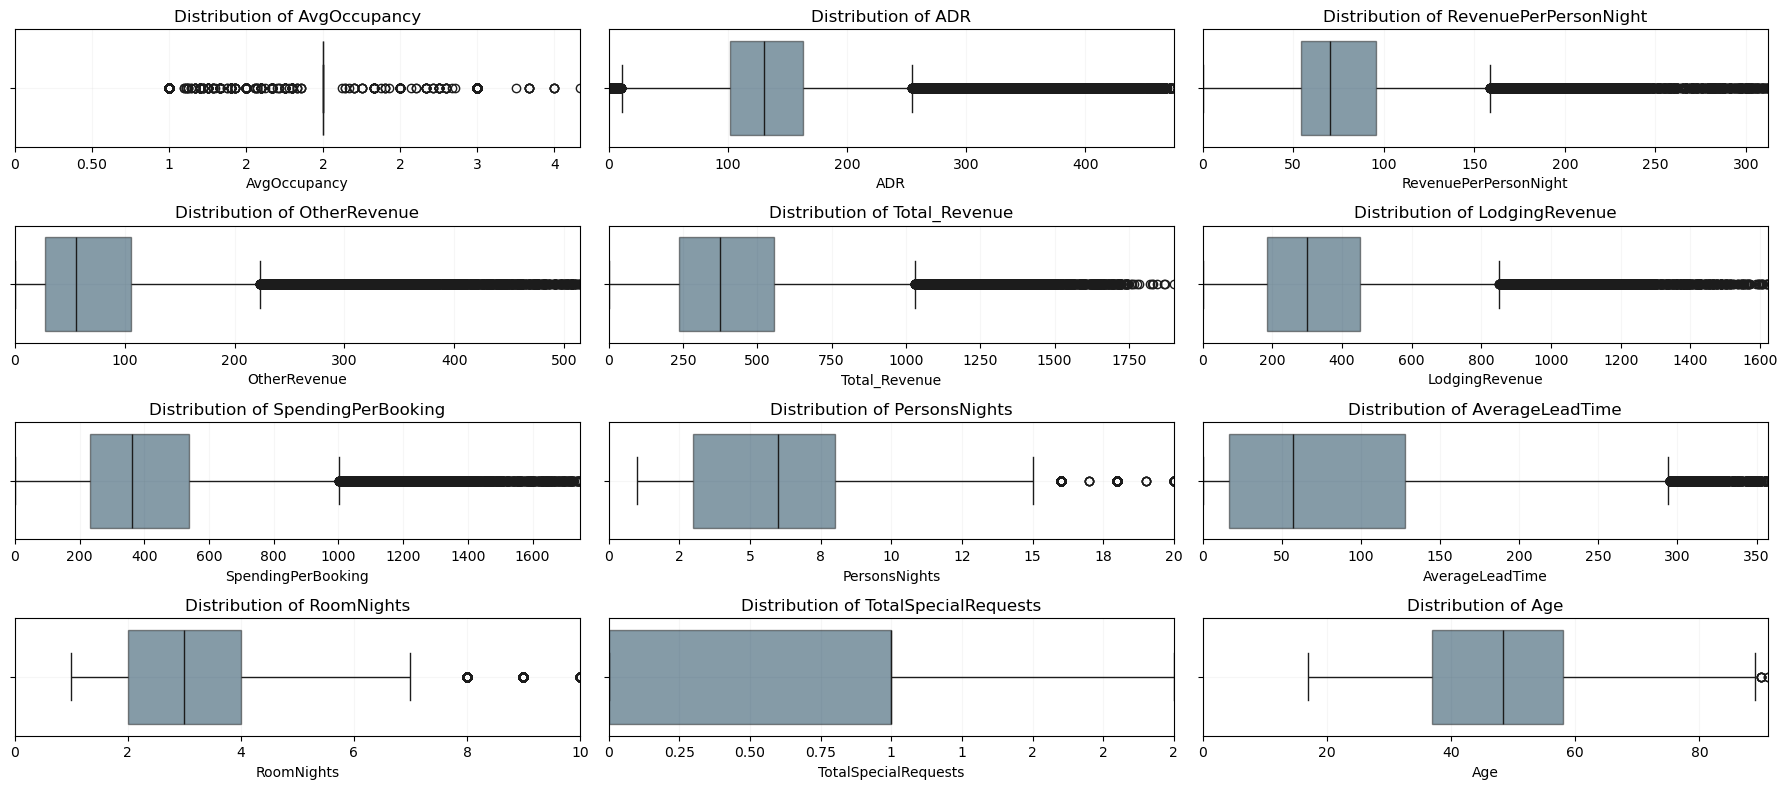

Variable   Min  Lower Fence          Q1      Median  \
0            AvgOccupancy   1.0     2.000000    2.000000    2.000000   
1                     ADR   0.0    10.500000  102.000000  130.500000   
2   RevenuePerPersonNight   0.0    -8.567509   54.172997   70.353333   
3            OtherRevenue   0.0   -90.750000   27.000000   56.000000   
4           Total_Revenue   0.0  -238.124985  237.600006  373.000000   
5          LodgingRevenue   0.0  -216.500000  184.000000  299.200012   
6      SpendingPerBooking   0.0  -229.550018  232.000000  363.000000   
7           PersonsNights   1.0    -4.500000    3.000000    6.000000   
8         AverageLeadTime   0.0  -149.500000   17.000000   57.000000   
9              RoomNights   1.0    -1.000000    2.000000    3.000000   
10   TotalSpecialRequests   0.0    -1.500000    0.000000    1.000000   
11                    Age  17.0     5.500000   37.000000   48.428909   

            Q3  Upper Fence          Max  
0     2.000000     2.000000     3.666667  
1   163.000000   254.500000   474.299988  
2    96.000000   158.740505   312.000000  
3   105.500000   223.250000   514.500000  
4   554.750000  1030.474991  1901.250000  
5   451.000000   851.500000  1621.500000  
6   539.700012  1001.250031  1746.500000  
7     8.000000    15.500000    20.000000  
8   128.000000   294.500000   357.000000  
9     4.000000     7.000000    10.000000  
10    1.000000     2.500000     2.000000  
11   58.000000    89.500000    91.000000

In [164]:
num_cols = 3
num_rows = (len(columns_to_treat) + num_cols - 1) // num_cols 
stats_df = plot_boxplots(df_zscore, columns_to_treat, num_rows, num_cols)
stats_df

In [165]:
# 2. Removal with LOF
def remove_outliers_lof(df, numeric_columns, contamination=0.05):
    df_filtered = df.copy()
    initial_rows = len(df_filtered)

    lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    outlier_predictions = lof.fit_predict(df_filtered[numeric_columns])

    mask = outlier_predictions == 1  # Keep only inliers
    df_filtered = df_filtered[mask]

    data_loss = (1 - len(df_filtered) / initial_rows) * 100
    return df_filtered, round(data_loss, 2)

In [166]:
df_lof, lof_loss = remove_outliers_lof(df_lof, columns_to_treat)

In [167]:
print(f"Data Loss - LOF: {lof_loss}%")

Data Loss - LOF: 5.0%


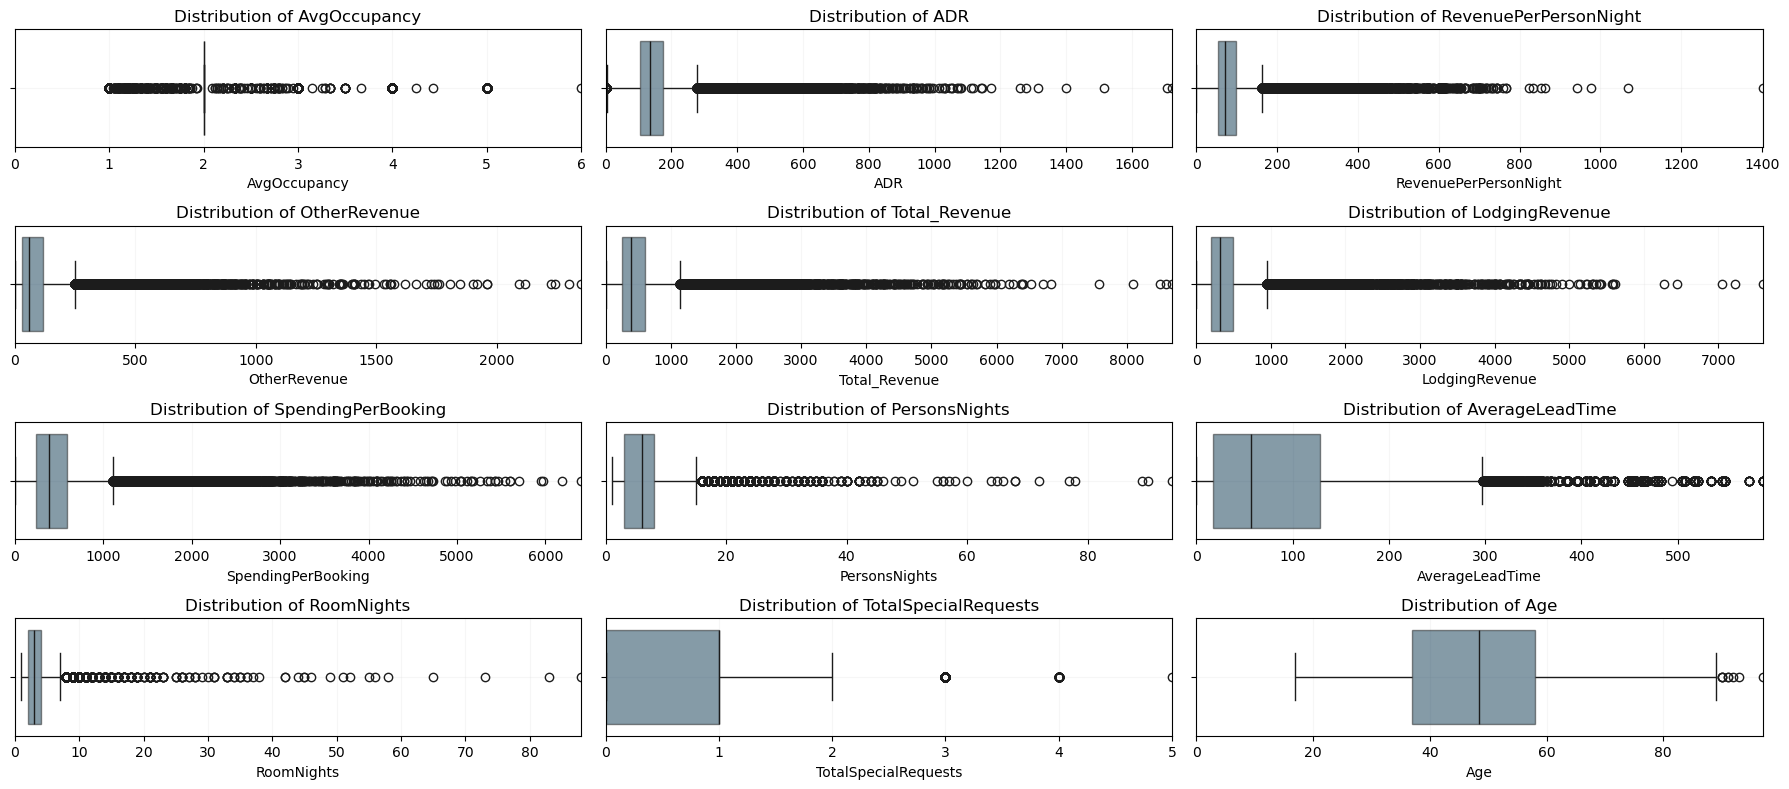

Variable   Min  Lower Fence          Q1      Median  \
0            AvgOccupancy   1.0     2.000000    2.000000    2.000000   
1                     ADR   0.0     2.774125  105.629648  134.500000   
2   RevenuePerPersonNight   0.0   -10.326044   54.669582   70.500000   
3            OtherRevenue   0.0  -104.000000   28.000000   60.000000   
4           Total_Revenue   0.0  -289.199982  249.000000  395.000000   
5          LodgingRevenue   0.0  -250.900009  197.000000  318.450012   
6      SpendingPerBooking   0.0  -274.695007  243.000000  384.000000   
7           PersonsNights   1.0    -4.500000    3.000000    6.000000   
8         AverageLeadTime   0.0  -151.000000   17.000000   57.000000   
9              RoomNights   1.0    -1.000000    2.000000    3.000000   
10   TotalSpecialRequests   0.0    -1.500000    0.000000    1.000000   
11                    Age  17.0     5.500000   37.000000   48.428909   

            Q3  Upper Fence          Max  
0     2.000000     2.000000     6.000000  
1   174.199997   277.055520  1721.400024  
2    98.000000   162.995626  1401.000000  
3   116.000000   248.000000  2350.500000  
4   607.799988  1145.999969  8689.650391  
5   495.600006   943.500015  7590.879883  
6   588.130005  1105.825012  6405.149902  
7     8.000000    15.500000    94.000000  
8   129.000000   297.000000   588.000000  
9     4.000000     7.000000    88.000000  
10    1.000000     2.500000     5.000000  
11   58.000000    89.500000    97.000000

In [168]:
num_cols = 3
num_rows = (len(columns_to_treat) + num_cols - 1) // num_cols 
stats_df = plot_boxplots(df_lof, columns_to_treat, num_rows, num_cols)
stats_df

In [169]:
# 3. Manual Removal + Winsorization

outlier_criteria = {"AvgOccupancy": (1, 6), 
                    "ADR": (0, 1400),
                    "RevenuePerPersonNight": (0, 2000), 
                    "Total_Revenue": (0, 20000),
                    "LodgingRevenue": (0, 20000), 
                    "Total_Revenue": (0, 8000),
                    "SpendingPerBooking": (0, 16000), 
                    "PersonsNights": (0, 175), 
                    "RoomNights": (0, 175)}

def remove_outliers_manual(df, conditions):
    df_filtered = df.copy()
    initial_rows = len(df_filtered)

    for column, (lower, upper) in conditions.items():
        df_filtered = df_filtered[(df_filtered[column] >= lower) & (df_filtered[column] <= upper)]

    data_loss = (1 - len(df_filtered) / initial_rows) * 100
    return df_filtered, round(data_loss, 2)

In [170]:
df_manual, manual_loss = remove_outliers_manual(df_manual, outlier_criteria)

In [171]:
print(f"Data Loss - Manual: {manual_loss}%")

Data Loss - Manual: 0.04%


So we decided to remove the extreme cases manually and now we will combine this with other techiniques to minize the impac of the remaining outliers.

- **Winsorization** <a id='winsorization'></a> _(Adjusting extreme values - no loss)_

In [172]:
df_winsorized = df_manual.copy()

In [173]:
def apply_winsorization(df, numeric_columns, limits=(0, 0.025)):
    df_winsorized = df.copy()
    
    for col in numeric_columns:
        df_winsorized[col] = winsorize(df_winsorized[col], limits=limits)
    
    return df_winsorized

In [174]:
df_winsorized = apply_winsorization(df_winsorized, columns_to_treat)

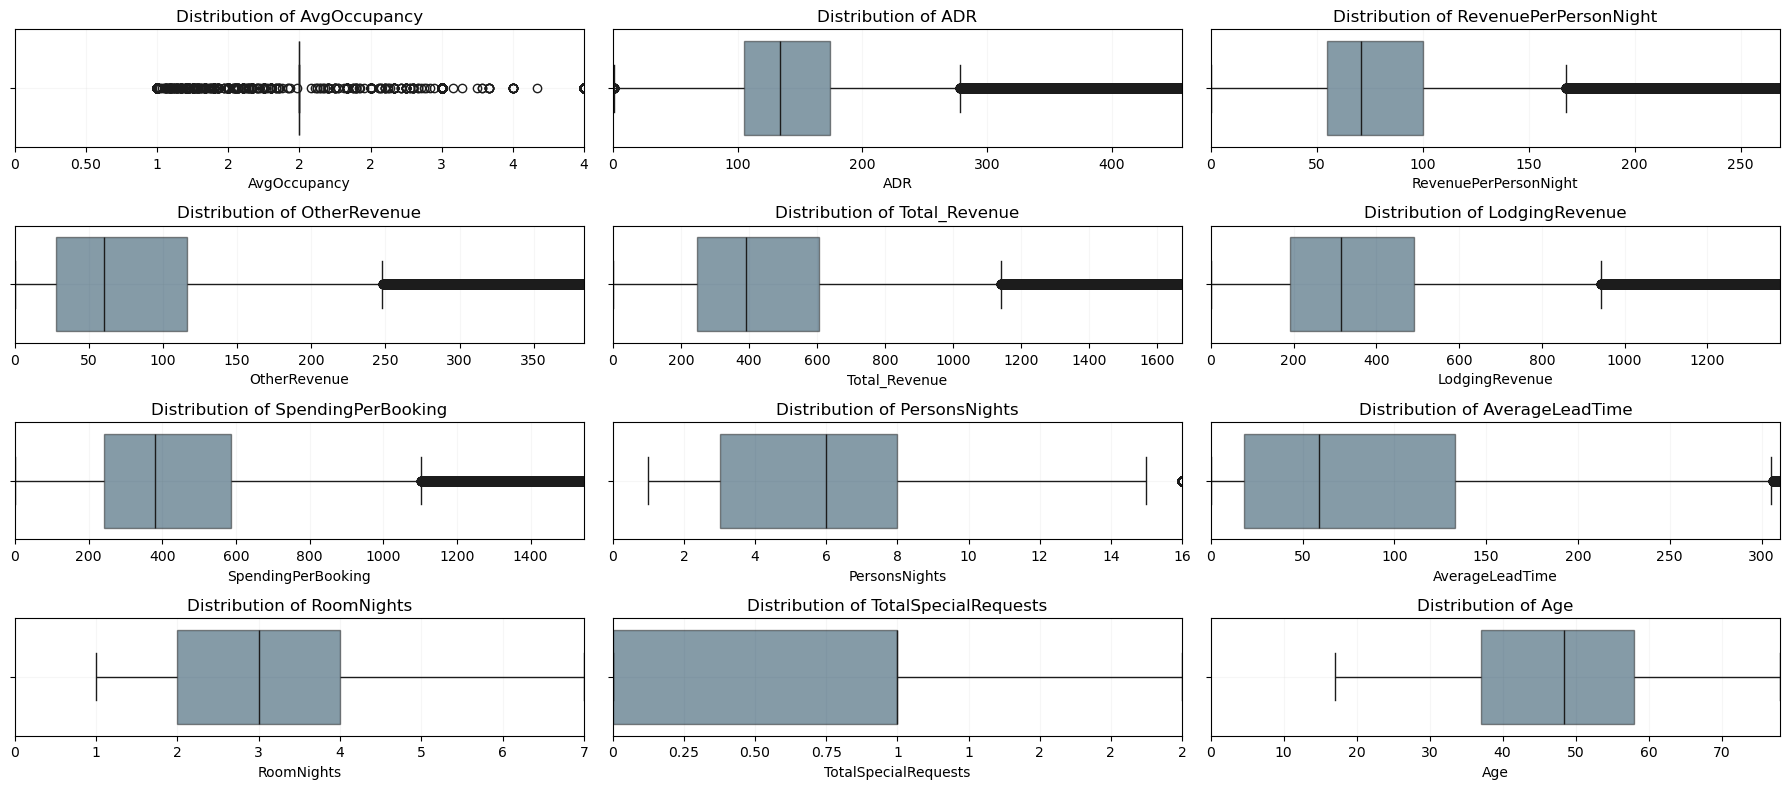

Variable   Min  Lower Fence          Q1      Median       Q3  \
0            AvgOccupancy   1.0     2.000000    2.000000    2.000000    2.000   
1                     ADR   0.0     1.312500  105.000000  134.000000  174.125   
2   RevenuePerPersonNight   0.0   -12.725687   54.909725   71.000000  100.000   
3            OtherRevenue   0.0  -104.000000   28.000000   60.000000  116.000   
4           Total_Revenue   0.0  -287.162514  248.134995  392.700012  605.000   
5          LodgingRevenue   0.0  -259.250000  191.500000  315.600006  492.000   
6      SpendingPerBooking   0.0  -274.762501  241.695000  381.299988  586.000   
7           PersonsNights   1.0    -4.500000    3.000000    6.000000    8.000   
8         AverageLeadTime   0.0  -154.500000   18.000000   59.000000  133.000   
9              RoomNights   1.0    -1.000000    2.000000    3.000000    4.000   
10   TotalSpecialRequests   0.0    -1.500000    0.000000    1.000000    1.000   
11                    Age  17.0     5.500000   37.000000   48.428909   58.000   

    Upper Fence          Max  
0      2.000000     4.000000  
1    277.812500   456.000000  
2    167.635412   268.500000  
3    248.000000   384.000000  
4   1140.297508  1672.000000  
5    942.750000  1375.199951  
6   1102.457500  1545.000000  
7     15.500000    16.000000  
8    305.500000   310.000000  
9      7.000000     7.000000  
10     2.500000     2.000000  
11    89.500000    78.000000

In [175]:
num_cols = 3
num_rows = (len(columns_to_treat) + num_cols - 1) // num_cols 
stats_df = plot_boxplots(df_winsorized, columns_to_treat, num_rows, num_cols)
stats_df

> `Final Decision:` We decided to test this combination, manual with or without winsorization. For now he rest of the preparation will be done with the first for interpretability and then in the function during modelling we will be able to choose.

In [176]:
df_preparation = df_winsorized.copy()

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Encoding**</span> <a id='encoding'></a>
_K-means does not acept categorical variables so we need to encode the ones we need, but before that, Nationality needs to be treated in order to reduce dimensionality - during encoding each category will become a column so its important to reduce this number_

#unique_nationalities = df_preparation['Nationality'].unique().tolist()

the major nationalities will sill be independent:

- FRA: 15%
- DEU: 13%
- PRT: 13%
- GBR: 10%

In [177]:
country_map = {
    'BRA': 'South_America','CHE': 'Other_Europe','FRA': 'France','DEU': 'Germany', 'CZE': 'Other_Europe',
    'AUT': 'Other_Europe','JPN': 'Asia','BEL': 'Other_Europe','GBR': 'United Kingdom','USA': 'North_America',
    'ESP': 'Other_Europe','PRT': 'Portugal','POL': 'Other_Europe','CHL': 'South_America','HUN': 'Other_Europe',
    'ISR': 'Asia','NLD': 'Other_Europe','MEX': 'North_America','SWE': 'Other_Europe','UKR': 'Other_Europe',
    'ARG': 'South_America','ITA': 'Other_Europe','GEO': 'Other_Europe','IRL': 'Other_Europe','ECU': 'South_America',
    'NOR': 'Other_Europe','PAN': 'North_America','DNK': 'Other_Europe','LUX': 'Other_Europe','RUS': 'Other_Europe',
    'CAN': 'North_America','ZAF': 'Africa','SVN': 'Other_Europe','FIN': 'Other_Europe','IND': 'Asia',
    'UZB': 'Asia','COD': 'Africa','JOR': 'Asia','ROU': 'Other_Europe','MAR': 'Africa','GRC': 'Other_Europe',
    'MUS': 'Africa','TUR': 'Asia','CHN': 'Asia','AUS': 'Oceania','SRB': 'Other_Europe','MLT': 'Other_Europe',
    'SGP': 'Asia','LVA': 'Other_Europe','ISL': 'Other_Europe','EST': 'Other_Europe','VEN': 'South_America',
    'MWI': 'Africa','IRN': 'Asia','BLR': 'Other_Europe','IDN': 'Asia','KOR': 'Asia','DOM': 'North_America',
    'CMR': 'Africa','SYR': 'Asia','SVK': 'Other_Europe','COL': 'South_America','PHL': 'Asia','MLI': 'Africa',
    'MOZ': 'Africa','PER': 'South_America','MYS': 'Asia','HRV': 'Other_Europe','CYP': 'Other_Europe','AGO': 'Africa',
    'URY': 'South_America','BGD': 'Asia','NZL': 'Oceania','BIH': 'Other_Europe','BGR': 'Other_Europe','ARM': 'Other_Europe',
    'THA': 'Asia','DZA': 'Africa','CRI': 'North_America','SAU': 'Asia','ATA': 'Antarctica', 'NGA': 'Africa',
    'AFG': 'Asia','VNM': 'Asia','CAF': 'Africa','LTU': 'Other_Europe','CPV': 'Africa','AZE': 'Other_Europe','KAZ': 'Asia',
    'GAB': 'Africa','SMR': 'Other_Europe','LBN': 'Asia','TWN': 'Asia','EGY': 'Africa','TGO': 'Africa','BOL': 'South_America',
    'GTM': 'North_America','JAM': 'North_America','PAK': 'Asia','TUN': 'Africa','UGA': 'Africa','ARE': 'Asia',
    'QAT': 'Asia','PRI': 'North_America','BRB': 'North_America','GHA': 'Africa','SEN': 'Africa','SLV': 'North_America',
    'IRQ': 'Asia','BEN': 'Africa','GIB': 'Other_Europe','LIE': 'Other_Europe','MDV': 'Asia','OMN': 'Asia',
    'ERI': 'Africa','CUB': 'North_America','SDN': 'Africa','MMR': 'Asia','MCO': 'Other_Europe','LAO': 'Asia',
    'MKD': 'Other_Europe','ALB': 'Other_Europe','ATF': 'Antarctica','ASM': 'Oceania','ATG': 'North_America','KGZ': 'Asia',
    'RWA': 'Africa','NAM': 'Africa','CIV': 'Africa','LCA': 'North_America','PRY': 'South_America','KIR': 'Oceania',
    'WLF': 'Oceania','LBY': 'Africa','KEN': 'Africa','GUY': 'South_America','KWT': 'Asia','JEY': 'Other_Europe',
    'BHR': 'Asia','SUR': 'South_America','CYM': 'North_America','HKG': 'Asia','YEM': 'Asia','COM': 'Africa',
    'BWA': 'Africa','LKA': 'Asia','FRO': 'Other_Europe','MDG': 'Africa','TJK': 'Asia','AIA': 'North_America',
    'SYC': 'Africa','TCD': 'Africa','SPM': 'North_America','SLE': 'Africa','SJM': 'Other_Europe','BMU': 'North_America',
    'SOM': 'Africa','TZA': 'Africa','GRD': 'North_America','TKM': 'Asia','NIC': 'North_America','ABW': 'North_America',
    'MNE': 'Other_Europe','STP': 'Africa','HTI': 'North_America','NCL': 'Oceania','GNB': 'Africa','PCN': 'Oceania',
    'VIR': 'North_America','AND': 'Other_Europe','GUF': 'South_America','WSM': 'Oceania','SWZ': 'Africa',
    'FLK': 'South_America','ETH': 'Africa','ZWE': 'Africa','MRT': 'Africa','DMA': 'North_America','FSM': 'Oceania'
}

In [178]:
df_preparation['Origin'] = df_preparation['Nationality'].map(country_map)

In [179]:
df_preparation['Origin'].value_counts(normalize=True).sort_values(ascending=False)

Origin
Other_Europe      0.322030
France            0.148410
Germany           0.135498
Portugal          0.132354
United Kingdom    0.103879
North_America     0.063958
South_America     0.037362
Asia              0.036949
Oceania           0.010167
Africa            0.009327
Antarctica        0.000067
Name: proportion, dtype: float64

In [180]:
df_preparation['Origin'] = df_preparation['Origin'].replace(['Africa', 'Oceania', 'Antarctica', 'Asia', 'South_America'], 'Others')

> DistributionChannel Grouping

In [181]:
df_preparation['DistributionChannel'].value_counts(normalize=True).sort_values(ascending=False)

DistributionChannel
Travel Agent/Operator    0.823080
Direct                   0.137893
Corporate                0.031112
GDS Systems              0.007915
Name: proportion, dtype: float64

In [182]:
#Since both Travel Agent/Operator and GDS Systemns are forms of intermediary agent, and the last has very few cases
#they will be grouped

df_preparation['DistributionChannel'] = df_preparation['DistributionChannel'].replace(['Travel Agent/Operator', 'GDS Systems'], 'Agent/Operator & GDS Systems')

C:\Users\catar\AppData\Local\Temp\ipykernel_39292\3886142381.py:4: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



> BookingFrequency as a binary column (to avoid perfect multicollinearity)

In [183]:
df_preparation['BookingFrequency_bin'] = df_preparation['BookingFrequency'].map({'New Customer': 0, 'Returning Customer': 1})

> Ordinal encoding for the categories with internal order

In [184]:
# correct category order
days_order = ['Newly Registered', 'Developing', 'Established', 'Longstanding']
lead_order = ['Last-minute', 'Moderate Planners', 'Advance Planners', 'Long-term Planners']

encoder = OrdinalEncoder(categories=[days_order, lead_order])

# DaysSinceCreation_Category AND AverageLeadTime_Category encoding
df_preparation[['DaysSinceCreation_Encoded', 'AverageLeadTime_Encoded']] = encoder.fit_transform(df_preparation[['DaysSinceCreation_Category', 'AverageLeadTime_Category']])
df_preparation[['DaysSinceCreation_Encoded', 'AverageLeadTime_Encoded']] = df_preparation[['DaysSinceCreation_Encoded', 'AverageLeadTime_Encoded']].astype(int)

In [185]:
def one_hot_encode(df, columns):
    
    df_encoded = pd.get_dummies(df, columns=columns, drop_first=False, dtype=int)
    return df_encoded

In [186]:
encoded_df = one_hot_encode(df_preparation, ['DistributionChannel', 'Origin'])

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Normalization & Scaling**</span> <a id='scaling'></a>

When using algorithms like **K-Means**, choosing the right scaling method is crucial because K-Means relies on Euclidean distances. Here's a breakdown of the scaling methods and how they impact clustering:

🔹 **Scaling Methods & Differences**
1. **Min-Max Scaling (Normalization)**  
   - Scales values between **0 and 1**.  
   - Best for when all features should have equal weight, especially if they have different units.  
   - Preserves original distributions but can be sensitive to outliers.

2. **Standardization (Z-Score Scaling)**  
   - Transforms data to have a mean of **0** and a standard deviation of **1**.  
   - When data has different scales but follows a normal distribution.  
   - Helps when features have different magnitudes; recommended for most cases.
  
3. **Log Transformation**
    - Reduces skewness in distributions.
    - Highly skewed data.

4. **Power Transform (Box-Cox, Yeo-Johnson)**  
   - Stabilizes variance and makes the distribution more **normal-like**.    
   - Useful when dealing with skewed features; makes clusters more distinguishable.

In [187]:
features_to_scale = ['Age', 'DaysSinceCreation_Encoded', 'AverageLeadTime_Encoded','LodgingRevenue', 'OtherRevenue',
                   'PersonsNights', 'RoomNights','TotalSpecialRequests', 'SRFloor', 'SRBed',
                   'SRNoisePreference', 'Total_Revenue','SpendingPerBooking', 'RevenuePerPersonNight', 
                   'AvgOccupancy', 'ADR','BookingFrequency_bin', 'DistributionChannel_Corporate',
                   'DistributionChannel_Direct','DistributionChannel_Agent/Operator & GDS Systems',
                   'Origin_France','Origin_Germany', 'Origin_North_America', 'Origin_Other_Europe',
                   'Origin_Others', 'Origin_Portugal', 'Origin_United Kingdom']

In [188]:
encoded_df[features_to_scale].describe().transpose().round(2)

count    mean     std  \
Age                                               75051.0   48.34   14.39   
DaysSinceCreation_Encoded                         75051.0    1.50    1.12   
AverageLeadTime_Encoded                           75051.0    1.49    1.12   
LodgingRevenue                                    75051.0  392.87  288.81   
OtherRevenue                                      75051.0   87.31   85.39   
PersonsNights                                     75051.0    6.15    3.79   
RoomNights                                        75051.0    3.13    1.58   
TotalSpecialRequests                              75051.0    0.65    0.66   
SRFloor                                           75051.0    0.04    0.21   
SRBed                                             75051.0    0.51    0.50   
SRNoisePreference                                 75051.0    0.09    0.29   
Total_Revenue                                     75051.0  483.93  348.85   
SpendingPerBooking                                75051.0  463.98  325.77   
RevenuePerPersonNight                             75051.0   87.20   51.42   
AvgOccupancy                                      75051.0    1.94    0.65   
ADR                                               75051.0  155.66   82.61   
BookingFrequency_bin                              75051.0    0.04    0.20   
DistributionChannel_Corporate                     75051.0    0.03    0.17   
DistributionChannel_Direct                        75051.0    0.14    0.34   
DistributionChannel_Agent/Operator & GDS Systems  75051.0    0.83    0.37   
Origin_France                                     75051.0    0.15    0.36   
Origin_Germany                                    75051.0    0.14    0.34   
Origin_North_America                              75051.0    0.06    0.24   
Origin_Other_Europe                               75051.0    0.32    0.47   
Origin_Others                                     75051.0    0.09    0.29   
Origin_Portugal                                   75051.0    0.13    0.34   
Origin_United Kingdom                             75051.0    0.10    0.31   

                                                   min     25%     50%  \
Age                                               17.0   37.00   48.43   
DaysSinceCreation_Encoded                          0.0    0.00    1.00   
AverageLeadTime_Encoded                            0.0    0.00    1.00   
LodgingRevenue                                     0.0  191.50  315.60   
OtherRevenue                                       0.0   28.00   60.00   
PersonsNights                                      1.0    3.00    6.00   
RoomNights                                         1.0    2.00    3.00   
TotalSpecialRequests                               0.0    0.00    1.00   
SRFloor                                            0.0    0.00    0.00   
SRBed                                              0.0    0.00    1.00   
SRNoisePreference                                  0.0    0.00    0.00   
Total_Revenue                                      0.0  248.13  392.70   
SpendingPerBooking                                 0.0  241.69  381.30   
RevenuePerPersonNight                              0.0   54.91   71.00   
AvgOccupancy                                       1.0    2.00    2.00   
ADR                                                0.0  105.00  134.00   
BookingFrequency_bin                               0.0    0.00    0.00   
DistributionChannel_Corporate                      0.0    0.00    0.00   
DistributionChannel_Direct                         0.0    0.00    0.00   
DistributionChannel_Agent/Operator & GDS Systems   0.0    1.00    1.00   
Origin_France                                      0.0    0.00    0.00   
Origin_Germany                                     0.0    0.00    0.00   
Origin_North_America                               0.0    0.00    0.00   
Origin_Other_Europe                                0.0    0.00    0.00   
Origin_Others                                

In [189]:
def scale_data(df, columns, method="min-max"):
    """
    Available methods: 'min-max', 'standardization', 'log', 'power'.
    """

    numeric_df = df.copy()
    
    if method == "log":
        numeric_df[columns] = np.log1p(numeric_df[columns])
    else:
        scaler = None
        if method == "min-max":
            scaler = MinMaxScaler()
        elif method == "standardization":
            scaler = StandardScaler()
        elif method == "power":
            scaler = PowerTransformer(method="yeo-johnson")
        else:
            raise ValueError("Invalid scaling method. Choose from 'min-max', 'standardization', 'log', 'power'.")
        
        numeric_df[columns] = scaler.fit_transform(numeric_df[columns]) if scaler else numeric_df[columns]

    return numeric_df

In [190]:
minmax_df = scale_data(encoded_df, features_to_scale, method="min-max")

In [191]:
minmax_df[features_to_scale].describe().transpose().round(2)

count  mean   std  min  \
Age                                               75051.0  0.51  0.24  0.0   
DaysSinceCreation_Encoded                         75051.0  0.50  0.37  0.0   
AverageLeadTime_Encoded                           75051.0  0.50  0.37  0.0   
LodgingRevenue                                    75051.0  0.29  0.21  0.0   
OtherRevenue                                      75051.0  0.23  0.22  0.0   
PersonsNights                                     75051.0  0.34  0.25  0.0   
RoomNights                                        75051.0  0.35  0.26  0.0   
TotalSpecialRequests                              75051.0  0.32  0.33  0.0   
SRFloor                                           75051.0  0.04  0.21  0.0   
SRBed                                             75051.0  0.51  0.50  0.0   
SRNoisePreference                                 75051.0  0.09  0.29  0.0   
Total_Revenue                                     75051.0  0.29  0.21  0.0   
SpendingPerBooking                                75051.0  0.30  0.21  0.0   
RevenuePerPersonNight                             75051.0  0.32  0.19  0.0   
AvgOccupancy                                      75051.0  0.31  0.22  0.0   
ADR                                               75051.0  0.34  0.18  0.0   
BookingFrequency_bin                              75051.0  0.04  0.20  0.0   
DistributionChannel_Corporate                     75051.0  0.03  0.17  0.0   
DistributionChannel_Direct                        75051.0  0.14  0.34  0.0   
DistributionChannel_Agent/Operator & GDS Systems  75051.0  0.83  0.37  0.0   
Origin_France                                     75051.0  0.15  0.36  0.0   
Origin_Germany                                    75051.0  0.14  0.34  0.0   
Origin_North_America                              75051.0  0.06  0.24  0.0   
Origin_Other_Europe                               75051.0  0.32  0.47  0.0   
Origin_Others                                     75051.0  0.09  0.29  0.0   
Origin_Portugal                                   75051.0  0.13  0.34  0.0   
Origin_United Kingdom                             75051.0  0.10  0.31  0.0   

                                                   25%   50%   75%  max  
Age                                               0.33  0.52  0.67  1.0  
DaysSinceCreation_Encoded                         0.00  0.33  0.67  1.0  
AverageLeadTime_Encoded                           0.00  0.33  0.67  1.0  
LodgingRevenue                                    0.14  0.23  0.36  1.0  
OtherRevenue                                      0.07  0.16  0.30  1.0  
PersonsNights                                     0.13  0.33  0.47  1.0  
RoomNights                                        0.17  0.33  0.50  1.0  
TotalSpecialRequests                              0.00  0.50  0.50  1.0  
SRFloor                                           0.00  0.00  0.00  1.0  
SRBed                                             0.00  1.00  1.00  1.0  
SRNoisePreference                                 0.00  0.00  0.00  1.0  
Total_Revenue                                     0.15  0.23  0.36  1.0  
SpendingPerBooking                                0.16  0.25  0.38  1.0  
RevenuePerPersonNight                             0.20  0.26  0.37  1.0  
AvgOccupancy                                      0.33  0.33  0.33  1.0  
ADR                                               0.23  0.29  0.38  1.0  
BookingFrequency_bin                              0.00  0.00  0.00  1.0  
DistributionChannel_Corporate                     0.00  0.00  0.00  1.0  
DistributionChannel_Direct                        0.00  0.00  0.00  1.0  
DistributionChannel_Agent/Operator & GDS Systems  1.00  1.00  1.00  1.0  
Origin_France                                     0.00  0.00  0.00  1.0  
Origin_Germany                                    0.00  0.00  0.00  1.0  
Origin_North_America                              0.00  0.00  0.00  1.0  
Origin_Other_Europe                               0.00  0.00  1.00  1.0  
Origin_Others    

In [192]:
standard_df = scale_data(encoded_df, features_to_scale, method="standardization")

In [193]:
standard_df[features_to_scale].describe().transpose().round(2)

count  mean  std   min  \
Age                                               75051.0   0.0  1.0 -2.18   
DaysSinceCreation_Encoded                         75051.0  -0.0  1.0 -1.34   
AverageLeadTime_Encoded                           75051.0   0.0  1.0 -1.33   
LodgingRevenue                                    75051.0  -0.0  1.0 -1.36   
OtherRevenue                                      75051.0   0.0  1.0 -1.02   
PersonsNights                                     75051.0  -0.0  1.0 -1.36   
RoomNights                                        75051.0   0.0  1.0 -1.34   
TotalSpecialRequests                              75051.0  -0.0  1.0 -0.98   
SRFloor                                           75051.0   0.0  1.0 -0.21   
SRBed                                             75051.0  -0.0  1.0 -1.02   
SRNoisePreference                                 75051.0   0.0  1.0 -0.31   
Total_Revenue                                     75051.0  -0.0  1.0 -1.39   
SpendingPerBooking                                75051.0  -0.0  1.0 -1.42   
RevenuePerPersonNight                             75051.0   0.0  1.0 -1.70   
AvgOccupancy                                      75051.0  -0.0  1.0 -1.43   
ADR                                               75051.0  -0.0  1.0 -1.88   
BookingFrequency_bin                              75051.0  -0.0  1.0 -0.21   
DistributionChannel_Corporate                     75051.0   0.0  1.0 -0.18   
DistributionChannel_Direct                        75051.0   0.0  1.0 -0.40   
DistributionChannel_Agent/Operator & GDS Systems  75051.0   0.0  1.0 -2.22   
Origin_France                                     75051.0   0.0  1.0 -0.42   
Origin_Germany                                    75051.0  -0.0  1.0 -0.40   
Origin_North_America                              75051.0   0.0  1.0 -0.26   
Origin_Other_Europe                               75051.0   0.0  1.0 -0.69   
Origin_Others                                     75051.0  -0.0  1.0 -0.32   
Origin_Portugal                                   75051.0   0.0  1.0 -0.39   
Origin_United Kingdom                             75051.0  -0.0  1.0 -0.34   

                                                   25%   50%   75%   max  
Age                                              -0.79  0.01  0.67  2.06  
DaysSinceCreation_Encoded                        -1.34 -0.44  0.45  1.34  
AverageLeadTime_Encoded                          -1.33 -0.44  0.46  1.35  
LodgingRevenue                                   -0.70 -0.27  0.34  3.40  
OtherRevenue                                     -0.69 -0.32  0.34  3.47  
PersonsNights                                    -0.83 -0.04  0.49  2.60  
RoomNights                                       -0.71 -0.08  0.55  2.44  
TotalSpecialRequests                             -0.98  0.53  0.53  2.05  
SRFloor                                          -0.21 -0.21 -0.21  4.66  
SRBed                                            -1.02  0.98  0.98  0.98  
SRNoisePreference                                -0.31 -0.31 -0.31  3.18  
Total_Revenue                                    -0.68 -0.26  0.35  3.41  
SpendingPerBooking                               -0.68 -0.25  0.37  3.32  
RevenuePerPersonNight                            -0.63 -0.32  0.25  3.53  
AvgOccupancy                                      0.10  0.10  0.10  3.15  
ADR                                              -0.61 -0.26  0.22  3.64  
BookingFrequency_bin                             -0.21 -0.21 -0.21  4.70  
DistributionChannel_Corporate                    -0.18 -0.18 -0.18  5.58  
DistributionChannel_Direct                       -0.40 -0.40 -0.40  2.50  
DistributionChannel_Agent/Operator & GDS Systems  0.45  0.45  0.45  0.45  
Origin_France                                    -0.42 -0.42 -0.42  2.40  
Origin_Germany                                   -0.40 -0.40 -0.40  2.53  
Origin_North_America                             -0.26 -0.26 -0.26  3.83  
Origin_Other_Europe                              -0.69 -0.69  1.45 

In [194]:
log_df = scale_data(encoded_df, features_to_scale, method="log")

In [195]:
#log_df[features_to_use].describe().transpose().round(2)

In [196]:
power_df = scale_data(encoded_df, features_to_scale, method="power")

In [197]:
power_df[features_to_scale].describe().transpose().round(2)

count  mean  std   min  \
Age                                               75051.0   0.0  1.0 -2.38   
DaysSinceCreation_Encoded                         75051.0   0.0  1.0 -1.41   
AverageLeadTime_Encoded                           75051.0   0.0  1.0 -1.40   
LodgingRevenue                                    75051.0  -0.0  1.0 -3.86   
OtherRevenue                                      75051.0   0.0  1.0 -2.72   
PersonsNights                                     75051.0   0.0  1.0 -1.90   
RoomNights                                        75051.0   0.0  1.0 -1.63   
TotalSpecialRequests                              75051.0  -0.0  1.0 -1.06   
SRFloor                                           75051.0  -0.0  1.0 -0.21   
SRBed                                             75051.0   0.0  1.0 -1.02   
SRNoisePreference                                 75051.0  -0.0  1.0 -0.31   
Total_Revenue                                     75051.0   0.0  1.0 -4.07   
SpendingPerBooking                                75051.0   0.0  1.0 -3.97   
RevenuePerPersonNight                             75051.0  -0.0  1.0 -5.14   
AvgOccupancy                                      75051.0  -0.0  1.0 -1.57   
ADR                                               75051.0  -0.0  1.0 -5.19   
BookingFrequency_bin                              75051.0  -0.0  1.0 -0.21   
DistributionChannel_Corporate                     75051.0  -0.0  1.0 -0.18   
DistributionChannel_Direct                        75051.0   0.0  1.0 -0.40   
DistributionChannel_Agent/Operator & GDS Systems  75051.0  -0.0  1.0 -2.22   
Origin_France                                     75051.0   0.0  1.0 -0.42   
Origin_Germany                                    75051.0   0.0  1.0 -0.40   
Origin_North_America                              75051.0   0.0  1.0 -0.26   
Origin_Other_Europe                               75051.0   0.0  1.0 -0.69   
Origin_Others                                     75051.0  -0.0  1.0 -0.32   
Origin_Portugal                                   75051.0   0.0  1.0 -0.39   
Origin_United Kingdom                             75051.0  -0.0  1.0 -0.34   

                                                   25%   50%   75%   max  
Age                                              -0.77  0.05  0.69  1.95  
DaysSinceCreation_Encoded                        -1.41 -0.36  0.50  1.28  
AverageLeadTime_Encoded                          -1.40 -0.35  0.51  1.28  
LodgingRevenue                                   -0.69 -0.06  0.58  2.42  
OtherRevenue                                     -0.67 -0.00  0.67  2.17  
PersonsNights                                    -0.81  0.18  0.65  1.97  
RoomNights                                       -0.65  0.08  0.67  1.97  
TotalSpecialRequests                             -1.06  0.71  0.71  1.61  
SRFloor                                          -0.21 -0.21 -0.21  4.66  
SRBed                                            -1.02  0.98  0.98  0.98  
SRNoisePreference                                -0.31 -0.31 -0.31  3.18  
Total_Revenue                                    -0.64 -0.05  0.58  2.42  
SpendingPerBooking                               -0.64 -0.05  0.60  2.38  
RevenuePerPersonNight                            -0.62 -0.17  0.47  2.64  
AvgOccupancy                                      0.18  0.18  0.18  2.64  
ADR                                              -0.61 -0.14  0.41  2.84  
BookingFrequency_bin                             -0.21 -0.21 -0.21  4.70  
DistributionChannel_Corporate                    -0.18 -0.18 -0.18  5.58  
DistributionChannel_Direct                       -0.40 -0.40 -0.40  2.50  
DistributionChannel_Agent/Operator & GDS Systems  0.45  0.45  0.45  0.45  
Origin_France                                    -0.42 -0.42 -0.42  2.40  
Origin_Germany                                   -0.40 -0.40 -0.40  2.53  
Origin_North_America                             -0.26 -0.26 -0.26  3.83  
Origin_Other_Europe                              -0.69 -0.69  1.45 

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Variable Pre-selection**</span> <a id='variable-preselection'></a>

**Why analyze variance?**
- Features with low variance (almost constant values) do not provide useful information for machine learning models.
- Removing these features helps reduce noise and improves model efficiency

In [198]:
features_to_use = features_to_scale

In [199]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(standard_df[features_to_use])

# Get names of selected and removed features
features_selected = list(standard_df[features_to_use].columns[selector.get_support()])
features_removed = list(standard_df[features_to_use].columns[~selector.get_support()])

print("✅ Kept Features:", features_selected)
print("❌ Removed Features:", features_removed)

✅ Kept Features: ['Age', 'DaysSinceCreation_Encoded', 'AverageLeadTime_Encoded', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'RoomNights', 'TotalSpecialRequests', 'SRFloor', 'SRBed', 'SRNoisePreference', 'Total_Revenue', 'SpendingPerBooking', 'RevenuePerPersonNight', 'AvgOccupancy', 'ADR', 'BookingFrequency_bin', 'DistributionChannel_Corporate', 'DistributionChannel_Direct', 'DistributionChannel_Agent/Operator & GDS Systems', 'Origin_France', 'Origin_Germany', 'Origin_North_America', 'Origin_Other_Europe', 'Origin_Others', 'Origin_Portugal', 'Origin_United Kingdom']
❌ Removed Features: []


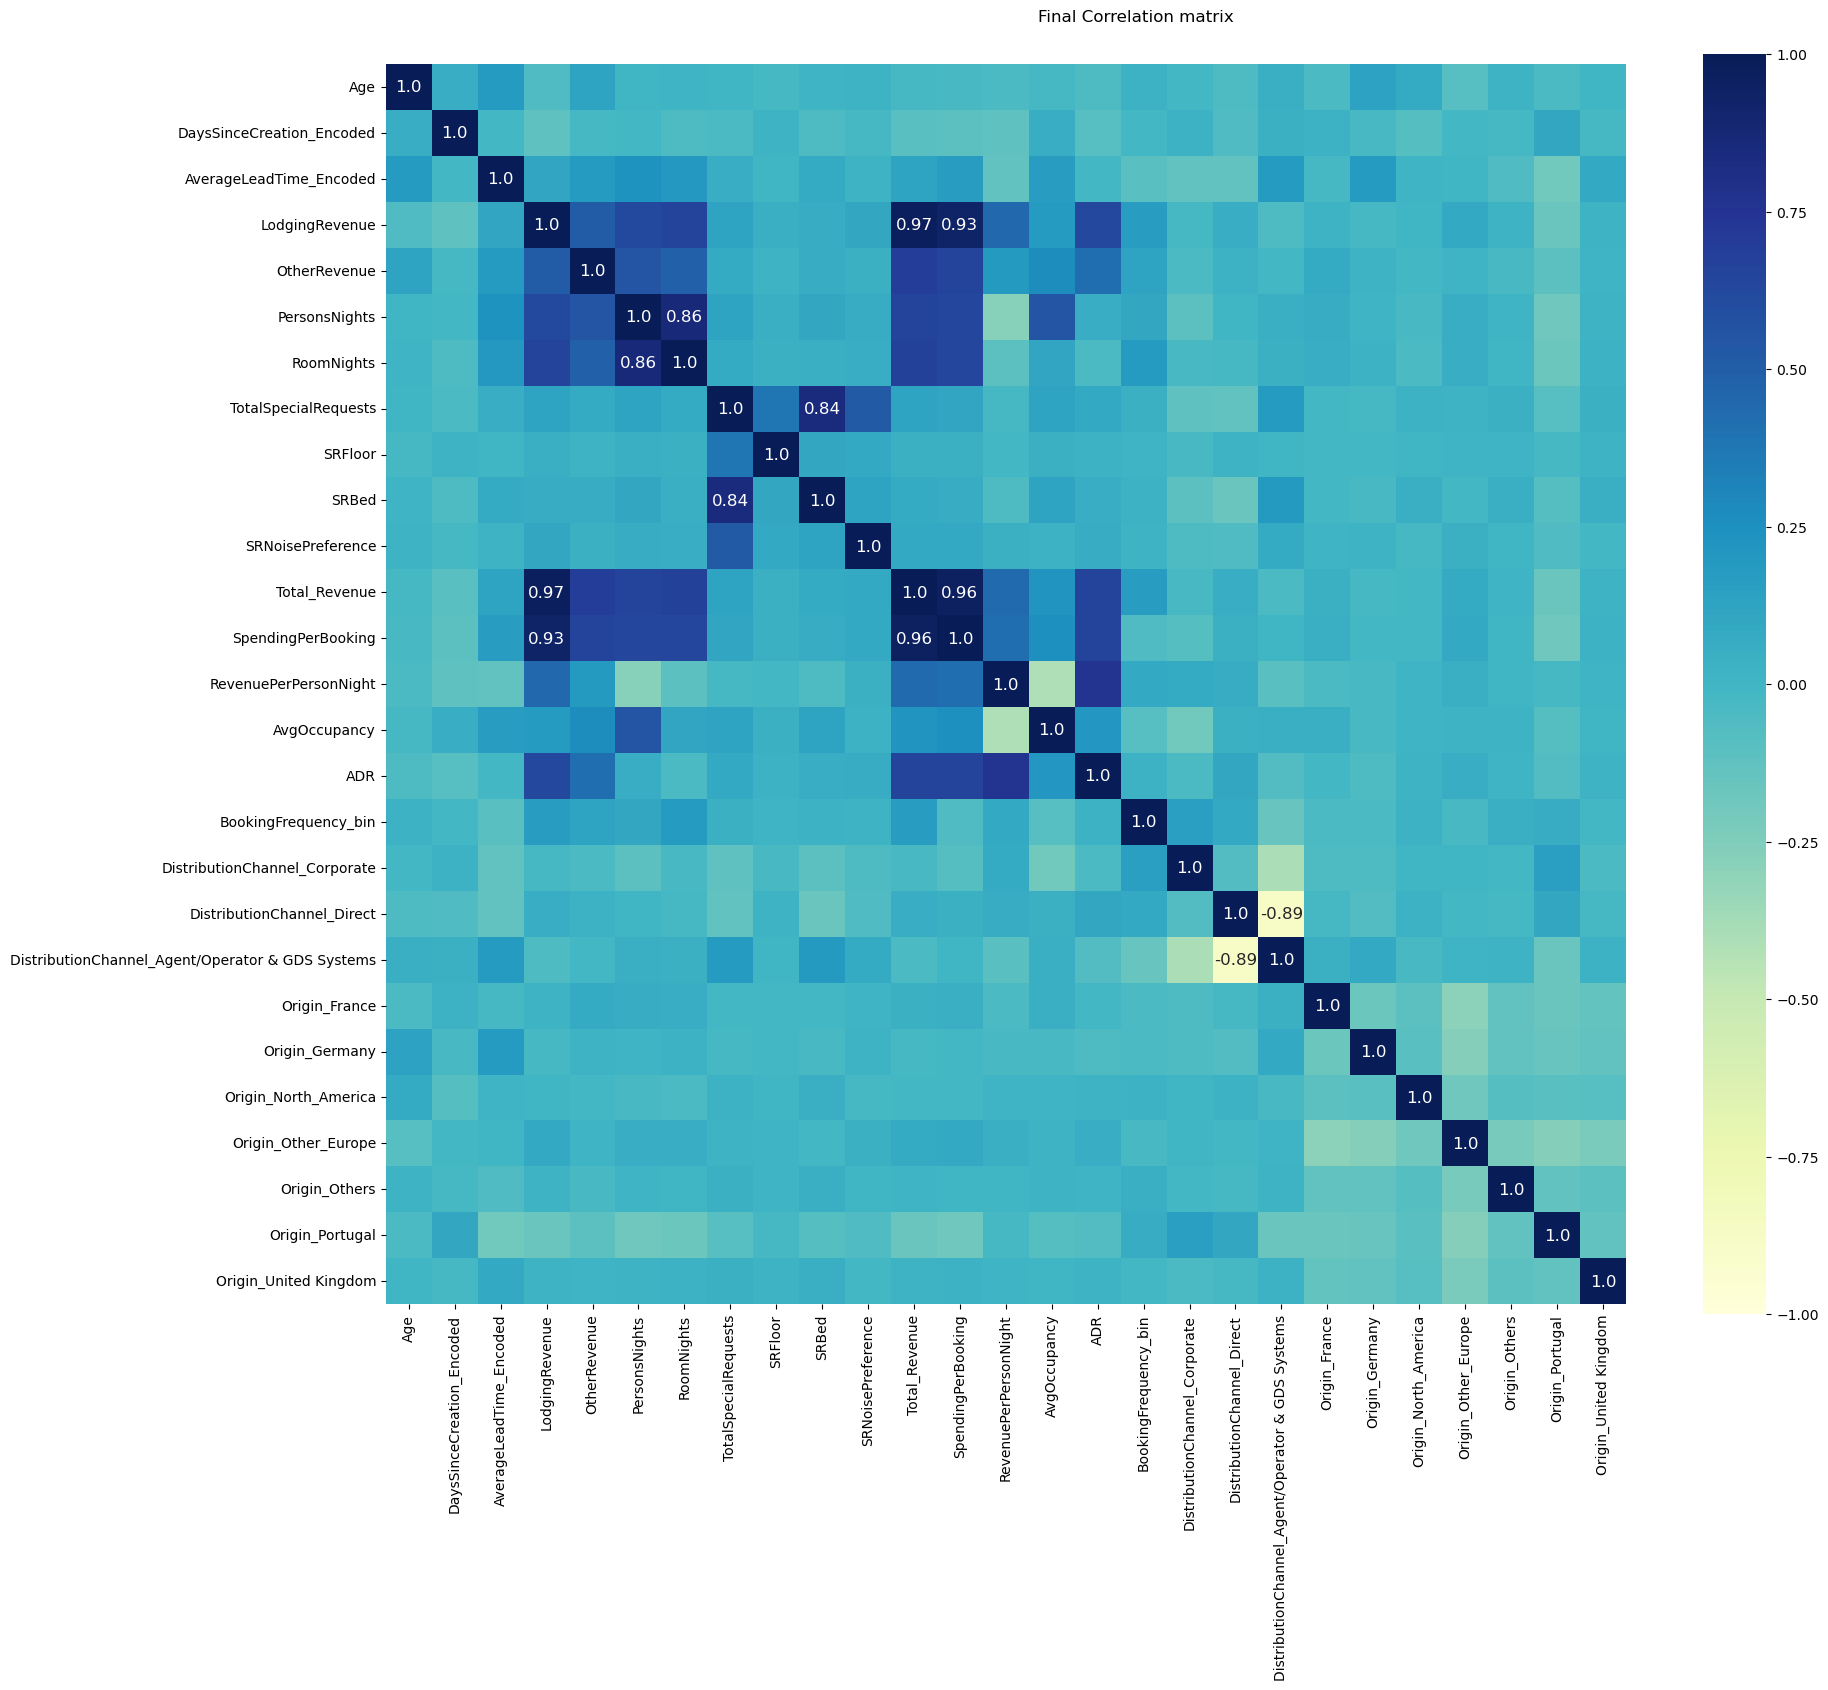

In [200]:
corr = standard_df[features_to_use].corr().round(2)
fig = plt.figure(figsize=(20, 15))

# annotation matrix - values above |0.8| will appear in the plot
mask_annot = np.absolute(corr.values) >= 0.8 
annot = np.where(mask_annot, corr.values, np.full(corr.shape, ''))
sns.heatmap(data = corr, annot = annot, cmap = 'YlGnBu', fmt = 's', vmin = -1, vmax = 1, center = 0, square = True, linewidths = 0, annot_kws = {'size': 12})

fig.subplots_adjust(top = 0.95)
fig.suptitle('Final Correlation matrix');

- keep `Total_Revenue`, drop `LodgingRevenue` and `SpendingPerBooking`
- keep `DistributionChannel_Agent/Operator & GDS Systems`, drop `DistributionChannel_Direct`
- keep `PersonsNights`, drop `RoomNights`
- keep `TotalSpecialRequests`, drop `SRBed`

In [201]:
features_to_use = [col for col in features_to_use if col not in ['LodgingRevenue',
                                                                 'SpendingPerBooking',
                                                                 'DistributionChannel_Direct',
                                                                 'RoomNights',
                                                                 'SRBed']]

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Final Pipeline**</span> <a id='final-pipeline'></a>

In [202]:
def pipeline(df, outlier_criteria, days_order, lead_order, columns_to_treat, features_to_scale, winsorization=True, scaling_method='standardization'):
    df_preparation = df.copy()
    
    # Remove outliers
    df_preparation, manual_loss = remove_outliers_manual(df_preparation, outlier_criteria)
    
    # Winsorization if enabled
    if winsorization:
        df_preparation = apply_winsorization(df_preparation, columns_to_treat)

    # Encoding
    df_preparation['Origin'] = df_preparation['Nationality'].map(country_map)
    df_preparation['Origin'] = df_preparation['Origin'].replace(
        ['Africa', 'Oceania', 'Antarctica', 'Asia', 'South_America'], 'Others')
    df_preparation['DistributionChannel'] = df_preparation['DistributionChannel'].replace(
        ['Travel Agent/Operator', 'GDS Systems'], 'Agent/Operator & GDS Systems')
    df_preparation['BookingFrequency_bin'] = df_preparation['BookingFrequency'].map(
        {'New Customer': 0, 'Returning Customer': 1})
    
    # Ordinal Encoding
    encoder = OrdinalEncoder(categories=[days_order, lead_order])
    df_preparation[['DaysSinceCreation_Encoded', 'AverageLeadTime_Encoded']] = encoder.fit_transform(
        df_preparation[['DaysSinceCreation_Category', 'AverageLeadTime_Category']])
    df_preparation[['DaysSinceCreation_Encoded', 'AverageLeadTime_Encoded']] = df_preparation[
        ['DaysSinceCreation_Encoded', 'AverageLeadTime_Encoded']].astype(int)
    
    # One-hot Encoding
    encoded_df = one_hot_encode(df_preparation, ['DistributionChannel', 'Origin'])
    
    # Scaling
    scaled_df = scale_data(encoded_df, features_to_scale, method=scaling_method)
    
    return scaled_df

In [203]:
test_df = pipeline(df_outliers, outlier_criteria, days_order, lead_order, columns_to_treat, features_to_scale, winsorization=True, scaling_method='standardization')

C:\Users\catar\AppData\Local\Temp\ipykernel_39292\2425276995.py:15: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [204]:
test_df[features_to_use].equals(standard_df[features_to_use]) #see if its working

True

List: features_to_use

Apply Pipeline without Dimensionality reduction:
- Winsorization + MinMax + Sem PCA/t-SNE/UMAP.
- Winsorization + Standardization + Sem PCA/t-SNE/UMAP.
- Winsorization + Log Scaling + Sem PCA/t-SNE/UMAP.
- Sem Winsorization + Log Scaling + Sem PCA/t-SNE/UMAP.
- Winsorization + Power Transformation + Sem PCA/t-SNE/UMAP.
- Sem Winsorization + Power Transformation + Sem PCA/t-SNE/UMAP.

- With the best results test perspectives

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Dimensionality Reduction**</span> <a id='dimensionality-reduction'></a>

🔹 **Methods**
- **PCA** <a id='pca'></a> _(Principal Component Analysis explanation)_

In [208]:
pca_variables =['Age','OtherRevenue','PersonsNights','TotalSpecialRequests',
                'Total_Revenue','RevenuePerPersonNight','AvgOccupancy','ADR']

In [209]:
# Extract the relevant features for clustering
X = standard_df[pca_variables].values

# Perform PCA (finding the ideal number of components)
pca = PCA()
pca.fit(X)

PCA()

In [210]:
# Calculate measures
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

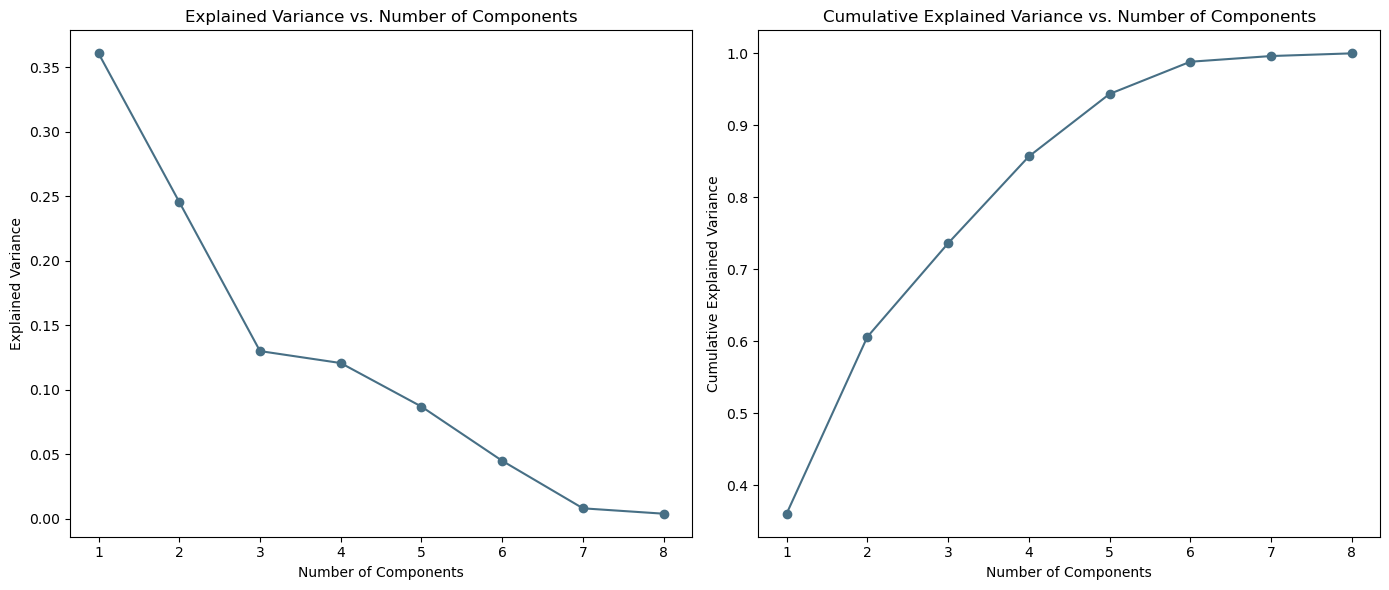

Ideal number of components: 5


In [211]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Explained variance ratio
axs[0].plot(np.arange(1, len(explained_variance) + 1), explained_variance, 
            color=pastel_color, marker='o', linestyle='-')  # Add points
axs[0].set_xlabel('Number of Components')
axs[0].set_ylabel('Explained Variance')
axs[0].set_title('Explained Variance vs. Number of Components')
axs[0].grid(False)  # Remove grid

# Cumulative explained variance
axs[1].plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 
            color=pastel_color, marker='o', linestyle='-')  
axs[1].set_xlabel('Number of Components')
axs[1].set_ylabel('Cumulative Explained Variance')
axs[1].set_title('Cumulative Explained Variance vs. Number of Components')
axs[1].grid(False)  # Remove grid

plt.tight_layout()
plt.show()

threshold = 0.90  
n_components = np.argmax(cumulative_variance > threshold) + 1
print(f"Ideal number of components: {n_components}")

In [212]:
pd.DataFrame({
    'Eigenvalue': pca.explained_variance_,
    'Difference': np.insert(np.diff(pca.explained_variance_), 0, 0),
    'Proportion': pca.explained_variance_ratio_,
    'Cumulative': np.cumsum(pca.explained_variance_ratio_)
}, index=range(1, pca.n_components_ + 1))

Eigenvalue  Difference  Proportion  Cumulative
1    2.886523    0.000000    0.360811    0.360811
2    1.964191   -0.922332    0.245521    0.606331
3    1.039017   -0.925174    0.129875    0.736207
4    0.964693   -0.074324    0.120585    0.856792
5    0.694492   -0.270201    0.086810    0.943602
6    0.358034   -0.336458    0.044754    0.988356
7    0.063279   -0.294755    0.007910    0.996265
8    0.029877   -0.033401    0.003735    1.000000

In [213]:
# PCA object
pca = PCA(n_components=n_components)
PCA_variables_transformed = pca.fit_transform(X)

# column names for the PCA components
pca_component_names = [f'PCA{i+1}' for i in range(n_components)]

# Add PCA components to the ds_pca DataFrame
for i, col in enumerate(pca_component_names):
    standard_df[col] = PCA_variables_transformed[:, i]

In [214]:
# Function to color the DataFrame background based on correlation values
def _color_corr(val):

    if val < -0.70:
        return 'background-color: #f87c7a'  # Red for strong negative correlation
    elif val > 0.70:
        return 'background-color: #86e4b8'  # Green for strong positive correlation
    return ''

pca_correlations = standard_df.corr(numeric_only=True).loc[pca_variables, pca_component_names]
styled_loadings = pca_correlations.style.map(_color_corr)  # Use .map() instead of .applymap()
styled_loadings

- **t-SNE** <a id='tsne'></a> _(t-Distributed Stochastic Neighbor Embedding)_

In [225]:
# Perform t-SNE (reducing to 2 components for visualization)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
standard_df[['tSNE1', 'tSNE2']] = tsne.fit_transform(X)

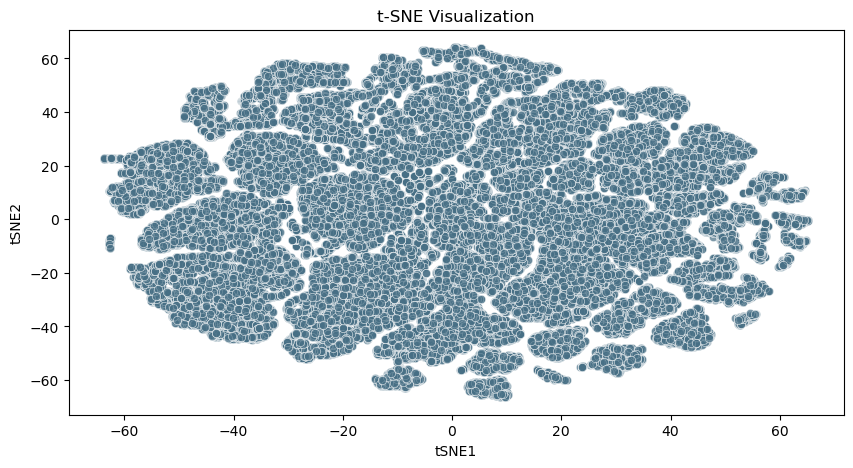

In [226]:
# t-SNE visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(data=standard_df, x="tSNE1", y="tSNE2", color = pastel_color, alpha=0.7)
plt.title("t-SNE Visualization")
plt.show()

- **UMAP** <a id='umap'></a> _(Uniform Manifold Approximation and Projection)_)

In [227]:
# Perform UMAP (reducing to 2 components for visualization)
umap_reducer = umap.UMAP(n_components=2, random_state=42)
standard_df[['UMAP1', 'UMAP2']] = umap_reducer.fit_transform(X)

c:\Users\beatr\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



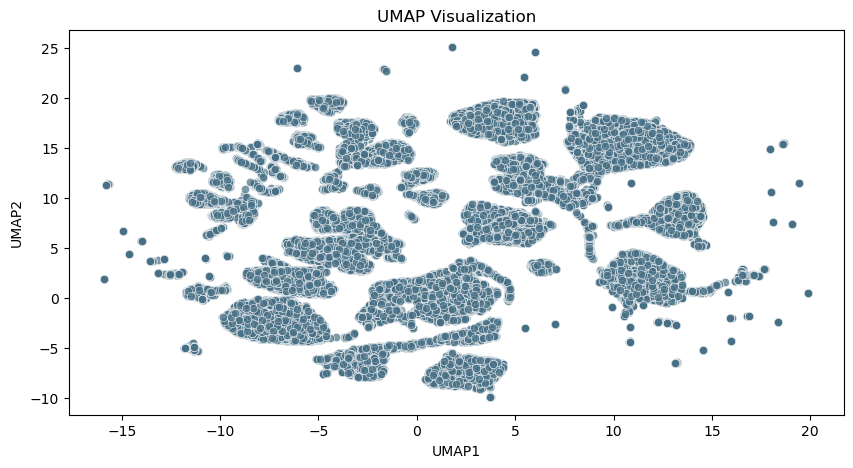

In [228]:
# UMAP visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(data=standard_df, x="UMAP1", y="UMAP2", color = pastel_color, alpha=0.7)
plt.title("UMAP Visualization")
plt.show()

Com Redução de Dimensionalidade (PCA, t-SNE, UMAP):
- Winsorization + Standardization + PCA. list = standard_df[features_to_use_pca]
- Winsorization + Standardization + t-SNE. list = standard_df['tSNE1', 'tSNE2']
- Winsorization + Standardization + UMAP = list = standard_df['UMAP1', 'UMAP2']

### 📌 Modeling <a id='modeling'></a>

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

---

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Optimizing Data Preparation**</span> <a id='Optimizing-Data-Preparation'></a>

> Without Dimensionality Reduction

In [230]:
# Define Feature Subsets
feature_subsets = {
    #"Only Numerical": ['Age', 'OtherRevenue', 'PersonsNights', 'TotalSpecialRequests',
    #                   'Total_Revenue', 'RevenuePerPersonNight', 'AvgOccupancy', 'ADR'],
    
    "Only Encoded Categorical": ['DaysSinceCreation_Encoded', 'AverageLeadTime_Encoded', 'BookingFrequency_bin', 'DistributionChannel_Corporate', 
                                  'DistributionChannel_Agent/Operator & GDS Systems', 'Origin_France',
                                  'Origin_Germany', 'Origin_North_America', 'Origin_Other_Europe',
                                  'Origin_Others', 'Origin_Portugal', 'Origin_United Kingdom'],
    
    #"Numerical + Booking & Channel": ['Age', 'OtherRevenue', 'PersonsNights', 'TotalSpecialRequests',
    #                                   'Total_Revenue', 'RevenuePerPersonNight', 'AvgOccupancy', 'ADR',
    #                                   'BookingFrequency_bin', 'DistributionChannel_Corporate', 
    #                                   'DistributionChannel_Agent/Operator & GDS Systems'],

    #"Numerical + Origin": ['Age', 'OtherRevenue', 'PersonsNights', 'TotalSpecialRequests',
    #                       'Total_Revenue', 'RevenuePerPersonNight', 'AvgOccupancy', 'ADR',
    #                       'Origin_France', 'Origin_Germany', 'Origin_North_America', 
    #                       'Origin_Other_Europe', 'Origin_Portugal', 
    #                       'Origin_United Kingdom'],

    #"Numerical + Time": ['Age', 'OtherRevenue', 'PersonsNights', 'TotalSpecialRequests',
    #                       'Total_Revenue', 'RevenuePerPersonNight', 'AvgOccupancy', 'ADR',
    #                       'DaysSinceCreation_Encoded','AverageLeadTime_Encoded',
    #                       'DaysSinceCreation_Encoded','AverageLeadTime_Encoded',],

    #"Numerical + Origin + Time": ['Age', 'OtherRevenue', 'PersonsNights', 'TotalSpecialRequests',
    #                       'Total_Revenue', 'RevenuePerPersonNight', 'AvgOccupancy', 'ADR',
    #                       'DaysSinceCreation_Encoded','AverageLeadTime_Encoded',
    #                       'Origin_France', 'Origin_Germany', 'Origin_North_America', 
    #                       'Origin_Other_Europe', 'Origin_Portugal', 
    #                       'Origin_United Kingdom'],
    
    #"All Features": ['Age', 'DaysSinceCreation_Encoded', 'AverageLeadTime_Encoded', 'OtherRevenue',
    #                 'PersonsNights', 'TotalSpecialRequests', 'SRFloor', 'SRNoisePreference', 
    #                 'Total_Revenue', 'RevenuePerPersonNight', 'AvgOccupancy', 'ADR', 
    #                 'BookingFrequency_bin', 'DistributionChannel_Corporate', 
    #                 'DistributionChannel_Agent/Operator & GDS Systems', 'Origin_France', 
    #                 'Origin_Germany', 'Origin_North_America', 'Origin_Other_Europe', 
    #                 'Origin_Others', 'Origin_Portugal', 'Origin_United Kingdom']
}

# Define Scaling Combinations
transformations = [
    ("Winsorization + MinMax", True, 'min-max'),
    ("Winsorization + Standardization", True, 'standardization'),
    ("Winsorization + Log Scaling", True, 'log'),
    ("Sem Winsorization + Log Scaling", False, 'log'),
    ("Winsorization + Power Transformation", True, 'power'),
    ("Sem Winsorization + Power Transformation", False,'power')
]

results = []

# Loop Through Each Feature Set
for feature_set_name, selected_features in feature_subsets.items():
    for transformation_name, winsor, method in transformations:
        df_transformed = pipeline(df_outliers, outlier_criteria, days_order, lead_order, columns_to_treat, 
                                  features_to_scale, winsorization=winsor, scaling_method=method)

        for k in range(3, 6):  # k = 2 to 5
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            labels = kmeans.fit_predict(df_transformed[selected_features])

            silhouette = silhouette_score(df_transformed[selected_features], labels)
            calinski = calinski_harabasz_score(df_transformed[selected_features], labels)
            davies = davies_bouldin_score(df_transformed[selected_features], labels)

            results.append([feature_set_name, transformation_name, k, silhouette, calinski, davies])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Feature Set', 'Transformation', 'Clusters', 'Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'])

# Display the table
display(results_df)

C:\Users\catar\AppData\Local\Temp\ipykernel_39292\2425276995.py:15: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

C:\Users\catar\AppData\Local\Temp\ipykernel_39292\2425276995.py:15: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

C:\Users\catar\AppData\Local\Temp\ipykernel_39292\2425276995.py:15: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

C:\Users\cata

Feature Set                            Transformation  \
0   Only Encoded Categorical                    Winsorization + MinMax   
1   Only Encoded Categorical                    Winsorization + MinMax   
2   Only Encoded Categorical                    Winsorization + MinMax   
3   Only Encoded Categorical           Winsorization + Standardization   
4   Only Encoded Categorical           Winsorization + Standardization   
5   Only Encoded Categorical           Winsorization + Standardization   
6   Only Encoded Categorical               Winsorization + Log Scaling   
7   Only Encoded Categorical               Winsorization + Log Scaling   
8   Only Encoded Categorical               Winsorization + Log Scaling   
9   Only Encoded Categorical           Sem Winsorization + Log Scaling   
10  Only Encoded Categorical           Sem Winsorization + Log Scaling   
11  Only Encoded Categorical           Sem Winsorization + Log Scaling   
12  Only Encoded Categorical      Winsorization + Power Transformation   
13  Only Encoded Categorical      Winsorization + Power Transformation   
14  Only Encoded Categorical      Winsorization + Power Transformation   
15  Only Encoded Categorical  Sem Winsorization + Power Transformation   
16  Only Encoded Categorical  Sem Winsorization + Power Transformation   
17  Only Encoded Categorical  Sem Winsorization + Power Transformation   

    Clusters  Silhouette Score  Calinski-Harabasz  Davies-Bouldin  
0          3          0.275221       16471.899151        1.595740  
1          4          0.341249       17442.579762        1.522374  
2          5          0.399870       19127.959312        1.446163  
3          3          0.204902        9937.864464        2.289655  
4          4          0.264137       11337.222567        1.724022  
5          5          0.338182       13057.502134        1.562508  
6          3          0.248926       21493.542645        1.477575  
7          4          0.214707       18920.547065        1.527499  
8          5          0.229255       17433.050286        1.582303  
9          3          0.248926       21493.542645        1.477575  
10         4          0.214707       18920.547065        1.527499  
11         5          0.229255       17433.050286        1.582303  
12         3          0.201751       10348.965250        2.167761  
13         4          0.270994       11152.714616        1.748765  
14         5          0.338984       12181.508332        1.330291  
15         3          0.201751       10348.965250        2.167761  
16         4          0.270994       11152.714616        1.748765  
17         5          0.338984       12181.508332        1.330291

| Feature Set | Transformation | Clusters | Silhouette Score | Calinski-Harabasz | Davies-Bouldin |
|-------------|---------------|----------|------------------|-------------------|----------------|
| Only Encoded Categorical|Winsorization + MinMax|5|0.626689|30140.38622|1.070701                        |
| Only Encoded Categorical|Winsorization + Log Scaling|5|0.626689|30140.38622|1.070701                   |
| Only Encoded Categorical|Sem Winsorization + Log Scaling|5|0.626689|30140.38622|1.070701               |
| Only Encoded Categorical|Winsorization + Standardization|5|0.547708|16995.53838|1.072317               |
| Only Encoded Categorical|Winsorization + Power Transformation|5|0.547708|16995.53838|1.072317          |
| Only Encoded Categorical|Sem Winsorization + Power Transformation|5|0.547708|16995.53838|1.072317      |
| Only Encoded Categorical|Winsorization + MinMax|4|0.540995|26506.30484|1.186066                        |
| Only Encoded Categorical|Winsorization + Log Scaling|4|0.540995|26506.30484|1.186066                   |
| Only Encoded Categorical|Sem Winsorization + Log Scaling|4|0.540995|26506.30484|1.186066               |
| Only Encoded Categorical|Winsorization + Standardization|4|0.459548|14440.43206|1.345547               |
| Only Encoded Categorical|Winsorization + Power Transformation|4|0.459548|14440.43206|1.345547          |
| Only Encoded Categorical|Sem Winsorization + Power Transformation|4|0.459548|14440.43206|1.345547      |
| Only Encoded Categorical|Winsorization + MinMax|3|0.453027|23764.52648|1.17079                         |
| Only Encoded Categorical|Winsorization + Log Scaling|3|0.453027|23764.52648|1.17079                    |
| Only Encoded Categorical|Sem Winsorization + Log Scaling|3|0.453027|23764.52648|1.17079                |
| `Numerical + Origin`|`Winsorization + MinMax`|`5`|0.385957|21729.49082|1.364285                              |
| Numerical + Origin|Winsorization + MinMax|4|0.341756|19883.94763|1.426701                              |
| Numerical + Booking & Channel|Winsorization + Standardization|3|0.315665|14639.86071|1.486976          |
| Numerical + Origin|Winsorization + Log Scaling|2|0.30021|37552.57258|1.263523                          |
| Numerical + Origin + Time|Winsorization + MinMax|5|0.294727|14755.94842|1.653544                       |
| Numerical + Origin|Sem Winsorization + Log Scaling|2|0.292695|36400.14317|1.273046                     |
| Numerical + Origin|Winsorization + MinMax|3|0.289636|19019.43408|1.497686                              |
| Only Encoded Categorical|Winsorization + Standardization|3|0.271343|12747.75884|1.353901               |
| Only Encoded Categorical|Winsorization + Power Transformation|3|0.271343|12747.75884|1.353901          |
| Only Encoded Categorical|Sem Winsorization + Power Transformation|3|0.271343|12747.75884|1.353901      |
| Numerical + Origin + Time|Winsorization + MinMax|4|0.264615|14262.26515|1.706755                       |
| Only Encoded Categorical|Winsorization + Standardization|2|0.263207|11363.61896|1.960093               |
| Only Encoded Categorical|Winsorization + Power Transformation|2|0.263207|11363.61896|1.960093          |
| Only Encoded Categorical|Sem Winsorization + Power Transformation|2|0.263207|11363.61896|1.960093      |
| All Features|Winsorization + MinMax|5|0.25432|10438.88537|1.897083                                     |
| Only Numerical|Sem Winsorization + Log Scaling|4|0.254145|33170.07849|1.077923                         |
| All Features|Winsorization + Log Scaling|2|0.253555|28904.22403|1.471846                               |
| Only Numerical|Winsorization + MinMax|4|0.252244|19852.80581|1.395687                                  |
| Only Numerical|Winsorization + Log Scaling|4|0.250443|34690.91323|1.084753                             |
| Only Numerical|Winsorization + Standardization|3|0.249407|21053.3704|1.498508                          |
| All Features|Sem Winsorization + Log Scaling|2|0.247485|28347.44529|1.478812                           |
| Only Numerical|Sem Winsorization + Log Scaling|3|0.245553|33605.58871|1.326699                         |
| Only Numerical|Winsorization + Log Scaling|3|0.242593|34563.01627|1.331776                             |
| Numerical + Booking & Channel|Sem Winsorization + Log Scaling|4|0.242555|30950.22063|1.120084          |
| Only Numerical|Winsorization + MinMax|3|0.241006|21678.11146|1.489683                                  |
| Only Numerical|Winsorization + MinMax|2|0.239054|20000.91978|1.80989                                   |
| Numerical + Booking & Channel|Winsorization + Log Scaling|4|0.238067|32198.90537|1.129494              |
| Numerical + Booking & Channel|Winsorization + MinMax|5|0.237193|16622.33522|1.43184                    |
| Numerical + Booking & Channel|Sem Winsorization + Log Scaling|3|0.235187|31732.71978|1.375795          |
| Only Numerical|Winsorization + MinMax|5|0.23208|18291.19034|1.389447                                   |
| Numerical + Booking & Channel|Winsorization + Standardization|4|0.232005|14485.93342|1.486177          |
| Numerical + Booking & Channel|Winsorization + Log Scaling|3|0.230389|32517.79759|1.384126              |
| Only Numerical|Sem Winsorization + Power Transformation|3|0.228047|19115.04618|1.520287                |
| Numerical + Origin|Winsorization + MinMax|2|0.227051|20882.44573|1.548899                              |
| Numerical + Origin + Time|Winsorization + MinMax|3|0.224315|13989.36533|1.796644                       |
| Numerical + Booking & Channel|Winsorization + MinMax|4|0.22265|18622.2086|1.483755                     |
| Numerical + Time|Winsorization + MinMax|5|0.221889|18594.9016|1.491219                                 |
| Numerical + Time|Winsorization + MinMax|2|0.22159|22882.76634|1.745179                                 |
| Numerical + Time|Winsorization + MinMax|4|0.220432|21240.70311|1.495245                                |
| All Features|Winsorization + MinMax|4|0.219015|10280.76056|1.974619                                    |
| Numerical + Origin|Winsorization + Power Transformation|5|0.218916|10167.89656|1.727553                |
| Numerical + Booking & Channel|Winsorization + MinMax|3|0.216534|19729.05782|1.615311                   |
| Only Numerical|Winsorization + Standardization|4|0.214556|19912.80552|1.484546                         |
| Numerical + Booking & Channel|Sem Winsorization + Power Transformation|5|0.213743|13421.0667|1.430524  |
| Numerical + Origin|Sem Winsorization + Log Scaling|4|0.213538|26574.01264|1.2281                       |
| Numerical + Time|Winsorization + MinMax|3|0.210806|21712.79448|1.469329                                |
| Numerical + Origin|Sem Winsorization + Power Transformation|5|0.209614|9849.225277|1.786795            |
| Numerical + Booking & Channel|Sem Winsorization + Power Transformation|4|0.209249|13555.04565|1.567246 |
| Numerical + Origin|Winsorization + Log Scaling|4|0.208895|27369.31506|1.24321                          |
| Only Numerical|Sem Winsorization + Power Transformation|2|0.207592|21703.19676|1.712455                |
| Numerical + Origin|Sem Winsorization + Log Scaling|3|0.206973|27946.42077|1.510757                     |
| Only Numerical|Winsorization + Power Transformation|2|0.206639|22526.3688|1.71456                      |
| Numerical + Origin|Winsorization + Standardization|5|0.206296|10488.94305|1.852737                     |
| Only Numerical|Sem Winsorization + Log Scaling|5|0.204522|30395.38608|1.249174                         |
| Numerical + Origin|Winsorization + Standardization|2|0.20189|11825.4095|2.186102                       |
| Numerical + Origin|Winsorization + Log Scaling|3|0.201841|28434.28984|1.528018                         |
| Only Numerical|Winsorization + Log Scaling|5|0.201786|31702.26789|1.26793                              |
| Only Numerical|Winsorization + Power Transformation|3|0.199546|19913.48506|1.607973                    |
| Numerical + Booking & Channel|Winsorization + Power Transformation|4|0.199364|13933.52859|1.584922     |
| Only Numerical|Sem Winsorization + Power Transformation|5|0.197638|16365.19189|1.57404                 |
| Only Numerical|Winsorization + Power Transformation|5|0.196288|16910.11147|1.584028                    |
| Only Numerical|Winsorization + Standardization|5|0.194617|18712.87585|1.522972                         |
| Numerical + Booking & Channel|Winsorization + Standardization|5|0.193521|13798.69531|1.542212          |
| Numerical + Booking & Channel|Sem Winsorization + Log Scaling|5|0.192411|28128.9929|1.304102           |
| Only Numerical|Winsorization + Power Transformation|4|0.190514|18253.98139|1.6081                      |
| Only Numerical|Sem Winsorization + Power Transformation|4|0.190475|17471.53461|1.615645                |
| Numerical + Booking & Channel|Winsorization + Log Scaling|5|0.189495|29171.33614|1.322681              |
| Numerical + Origin|Sem Winsorization + Power Transformation|4|0.186013|9605.483058|1.929619            |
| Numerical + Origin|Winsorization + Standardization|4|0.184593|10027.70417|1.795109                     |
| Numerical + Origin|Winsorization + Power Transformation|4|0.183519|9692.295527|1.936046                |
| Numerical + Booking & Channel|Sem Winsorization + Power Transformation|3|0.181508|13815.80814|1.590356 |
| Numerical + Booking & Channel|Winsorization + Power Transformation|3|0.181044|14201.79338|1.58844      |
| Numerical + Booking & Channel|Sem Winsorization + Power Transformation|2|0.180463|14914.17719|2.003102 |
| All Features|Winsorization + MinMax|3|0.17862|10381.88845|2.041356                                     |
| Numerical + Origin + Time|Winsorization + MinMax|2|0.176243|15993.50469|1.845366                       |
| All Features|Winsorization + Standardization|4|0.175644|6185.06257|2.082597                            |
| Numerical + Booking & Channel|Winsorization + Power Transformation|2|0.172746|15383.15316|2.007438     |
| Numerical + Booking & Channel|Winsorization + Power Transformation|5|0.167013|13040.46636|1.666062     |
| All Features|Winsorization + Standardization|3|0.164761|6337.107262|2.241681                           |
| Numerical + Origin|Sem Winsorization + Log Scaling|5|0.164708|23743.39779|1.451284                     |
| All Features|Winsorization + Log Scaling|4|0.16381|19260.38714|1.494503                                |
| All Features|Sem Winsorization + Log Scaling|3|0.16332|20965.25265|1.803067                            |
| Numerical + Origin|Winsorization + Log Scaling|5|0.161759|24353.6142|1.480061                          |
| All Features|Winsorization + Log Scaling|3|0.157591|21051.91102|1.835313                               |
| Numerical + Origin|Sem Winsorization + Power Transformation|3|0.150739|9802.995928|2.099809            |
| All Features|Winsorization + Standardization|2|0.150359|7307.880581|2.801637                           |
| Numerical + Origin|Winsorization + Power Transformation|3|0.150191|9973.939034|2.099195                |
| All Features|Sem Winsorization + Log Scaling|5|0.149939|16573.97493|1.669666                           |
| All Features|Winsorization + Log Scaling|5|0.147393|16790.38565|1.691181                               |
| All Features|Winsorization + MinMax|2|0.140588|12058.3598|2.132939                                     |
| Numerical + Origin|Sem Winsorization + Power Transformation|2|0.132768|11540.86135|2.415939            |
| Numerical + Origin|Winsorization + Power Transformation|2|0.131987|11868.75495|2.412437                |
| All Features|Winsorization + Standardization|5|0.130689|5916.198518|2.228494                           |
| All Features|Sem Winsorization + Log Scaling|4|0.129313|16836.4743|1.971475                            |
| All Features|Winsorization + Power Transformation|5|0.124548|5848.476108|2.132471                      |
| All Features|Winsorization + Power Transformation|4|0.114531|5822.741104|2.484294                      |
| All Features|Sem Winsorization + Power Transformation|5|0.110499|5737.146954|2.147425                  |
| Numerical + Origin|Winsorization + Standardization|3|0.104531|10133.62339|2.141343                     |
| All Features|Sem Winsorization + Power Transformation|4|0.104345|5960.567885|2.30613                   |
| All Features|Sem Winsorization + Power Transformation|2|0.103834|7652.587636|2.922338                  |
| All Features|Winsorization + Power Transformation|2|0.101105|7794.915398|2.924639                      |
| All Features|Sem Winsorization + Power Transformation|3|0.089973|6175.385929|2.62128                   |
| All Features|Winsorization + Power Transformation|3|0.081986|6221.321664|3.014222                      |


> Without Dimensionality Reduction

| Feature Set|Transformation|Dimensionality Reduction|Clusters|Silhouette Score|Calinski-Harabasz|Davies-Bouldin       |
|-------------|---------------|----------|------------------|-------------------|----------------|----------------|
| `Only Numeric`|`Winsorization + MinMax`|`UMAP`|5|0.395421|45116.83246|0.930856                                             |
| Only Numeric|Sem Winsorization + Log Scaling|UMAP|5|0.389437|48310.22524|0.954855                                    |
| Only Numeric|Sem Winsorization + Log Scaling|UMAP|4|0.388903|48362.65011|1.045953                                    |
| Only Numeric|Winsorization + MinMax|UMAP|4|0.381123|41303.37082|1.02015                                              |
| `Categorical without SR & Channel`|`Sem Winsorization + Log Scaling`|`UMAP`|4|0.375605899|46578.04441|1.072266244          |
| Categorical without SR|Sem Winsorization + Log Scaling|UMAP|4|0.374688834|46434.08021|1.074821122                    |
| All Categorical|Sem Winsorization + Log Scaling|UMAP|4|0.373934417|46334.67787|1.076020348                           |
| Only Numeric|Sem Winsorization + Log Scaling|UMAP|3|0.373474|49093.45279|1.07461                                     |
| Categorical without SR & Channel|Sem Winsorization + Log Scaling|UMAP|5|0.373398966|46159.00785|0.981519505          |
| Categorical without SR|Sem Winsorization + Log Scaling|UMAP|5|0.372143786|45986.17449|0.98393869                     |
| All Categorical|Winsorization + MinMax|UMAP|5|0.37152268|44907.61871|0.944892517                                     |
| All Categorical|Sem Winsorization + Log Scaling|UMAP|5|0.371321152|45866.90705|0.985246324                           |
| Categorical without SR|Winsorization + MinMax|UMAP|5|0.369226342|42897.27269|0.936391616                             |
| Categorical without SR|Winsorization + MinMax|UMAP|4|0.366663126|40496.42861|0.933379519                             |
| Categorical without SR & Channel|Winsorization + MinMax|UMAP|5|0.364213153|41641.2141|1.012669766                    |
| Categorical without SR & Channel|Sem Winsorization + Log Scaling|UMAP|3|0.362978287|47641.63994|1.096268026          |
| Only Numeric|Winsorization + Log Scaling|UMAP|4|0.362708|48361.67375|1.022163                                        |
| Categorical without SR & Channel|Winsorization + MinMax|UMAP|4|0.362428372|39618.65366|0.914166917                   |
| Categorical without SR|Sem Winsorization + Log Scaling|UMAP|3|0.362203892|47525.54316|1.097589692                    |
| All Categorical|Winsorization + MinMax|UMAP|4|0.362102833|41131.45356|0.91935176                                     |
| All Categorical|Sem Winsorization + Log Scaling|UMAP|3|0.361642514|47446.83783|1.099667318                           |
| Only Numeric|Winsorization + Log Scaling|UMAP|3|0.358521|50792.21126|1.041148                                        |
| Categorical without SR & Channel|Winsorization + Log Scaling|UMAP|5|0.352193721|43437.09437|0.941907277              |
| Categorical without SR|Winsorization + Log Scaling|UMAP|5|0.350968237|43283.67281|0.945949697                        |
| Categorical without SR & Channel|Winsorization + Log Scaling|UMAP|4|0.35048446|46651.46435|1.049754525               |
| Only Numeric|Winsorization + Log Scaling|UMAP|5|0.350127|45464.82748|1.026799                                        |
| Categorical without SR|Winsorization + Log Scaling|UMAP|4|0.349548424|46509.33366|1.052014402                        |
| All Categorical|Winsorization + Log Scaling|UMAP|4|0.348898275|46411.55759|1.053948409                               |
| Categorical without SR & Channel|Winsorization + Log Scaling|UMAP|3|0.348747517|49347.96617|1.063549202              |
| Categorical without SR|Winsorization + Log Scaling|UMAP|3|0.348001178|49227.63072|1.066190683                        |
| Only Numeric|Winsorization + MinMax|UMAP|3|0.347873|36670.27144|1.19394                                              |
| All Categorical|Winsorization + Log Scaling|UMAP|3|0.3474532|49145.37276|1.067078768                                 |
| Categorical without SR|Winsorization + MinMax|UMAP|3|0.335639799|35998.09537|1.215286343                             |
| All Categorical|Winsorization + Log Scaling|UMAP|5|0.334577384|43335.04795|1.060599931                               |
| Categorical without SR & Channel|Winsorization + MinMax|UMAP|3|0.333467999|35175.46647|1.234126313                   |
| All Categorical|Winsorization + MinMax|UMAP|3|0.329592758|35716.28873|1.207670681                                    |
| `Categorical without SR & Channel`|`Winsorization + MinMax`|`PCA`|5|0.308089895|13966.38062|1.680876988                    |
| Categorical without SR & Channel|Winsorization + Standardization|UMAP|3|0.300583785|36727.77422|1.154353495          |
| Categorical without SR|Winsorization + Standardization|UMAP|3|0.292353263|35233.86873|1.172772648                    |
| Categorical without SR & Channel|Winsorization + Standardization|UMAP|5|0.287343764|34226.91782|1.217658618          |
| All Categorical|Winsorization + Standardization|UMAP|3|0.286122263|34095.59136|1.208482828                           |
| Categorical without SR & Channel|Winsorization + Standardization|UMAP|4|0.284954106|35051.97135|1.165099919          |
| Categorical without SR & Channel|Sem Winsorization + Power Transformation|UMAP|5|0.282360814|32453.9077|1.127888909  |
| All Categorical|Sem Winsorization + Power Transformation|UMAP|5|0.281823271|28772.9509|1.214600963                   |
| Only Numeric|Sem Winsorization + Log Scaling|PCA|4|0.281061|37915.59144|0.994417                                     |
| Categorical without SR & Channel|Sem Winsorization + Power Transformation|UMAP|3|0.279875982|36619.82922|1.364223022 |
| Only Numeric|Winsorization + Log Scaling|PCA|4|0.278536|40048.00601|0.996341                                         |
| Categorical without SR|Winsorization + Standardization|UMAP|5|0.278133991|32271.56793|1.256364061                    |
| Categorical without SR|Winsorization + Standardization|UMAP|4|0.276857842|33306.68448|1.199918264                    |
| Categorical without SR|Winsorization + MinMax|PCA|5|0.276346121|11863.2876|1.798571187                               |
| Only Numeric|Sem Winsorization + Log Scaling|PCA|3|0.271753|37481.54324|1.224962                                     |
| Categorical without SR|Sem Winsorization + Power Transformation|UMAP|5|0.271723928|30581.05414|1.264952668           |
| All Categorical|Winsorization + Standardization|UMAP|5|0.271648516|30891.78623|1.274141267                           |
| All Categorical|Winsorization + Standardization|UMAP|4|0.271628776|32110.0214|1.213948791                            |
| Only Numeric|Winsorization + Log Scaling|PCA|3|0.269486|38788.40882|1.226336                                         |
| Categorical without SR & Channel|Sem Winsorization + Power Transformation|UMAP|4|0.268929107|33315.88282|1.244481061 |
| Categorical without SR|Sem Winsorization + Power Transformation|UMAP|3|0.268595038|33096.34252|1.329041053           |
| Only Numeric|Winsorization + MinMax|PCA|4|0.267676|21788.30427|1.316298                                              |
| All Categorical|Sem Winsorization + Power Transformation|UMAP|3|0.265201951|32089.94355|1.449068228                  |
| Categorical without SR & Channel|Winsorization + MinMax|PCA|4|0.264512741|13151.95696|1.772968872                    |
| All Categorical|Sem Winsorization + Power Transformation|UMAP|4|0.262150119|29121.68707|1.332703228                  |
| Categorical without SR|Sem Winsorization + Power Transformation|UMAP|4|0.261743064|29520.04797|1.272763344           |
| All Categorical|Winsorization + MinMax|PCA|5|0.258062612|10629.14413|1.880883609                                     |
| Only Numeric|Winsorization + MinMax|PCA|3|0.255682|23555.3194|1.421122                                               |
| Only Numeric|Winsorization + MinMax|PCA|5|0.248664|20257.66757|1.303821                                              |
| Only Numeric|Sem Winsorization + Log Scaling|PCA|5|0.233043|35367.37278|1.136584                                     |
| Categorical without SR|Winsorization + MinMax|PCA|4|0.232189087|11365.82463|1.872466889                              |
| Only Numeric|Winsorization + Log Scaling|PCA|5|0.231168|37303.44735|1.148478                                         |
| All Categorical|Winsorization + MinMax|PCA|4|0.222105428|10449.38837|1.958342578                                     |
| Categorical without SR & Channel|Winsorization + MinMax|PCA|3|0.218683006|13071.94082|1.843354086                    |

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**Perspectives**</span> <a id='dimensionality-reduction'></a>

Considering the features from Numerical + Origin, treated with Winsorization and MinMax as the scaling method, we got a Silhouette Score of 0.385957. So we will use features from this combination to create the perspectives.

In [ ]:
test_df = pipeline(df_outliers, outlier_criteria, days_order, lead_order, columns_to_treat, features_to_scale, winsorization=True, scaling_method='min-max')

In [ ]:
Numerical_Origin = ['Age', 'OtherRevenue', 'PersonsNights', 'TotalSpecialRequests',
                           'Total_Revenue', 'RevenuePerPersonNight', 'AvgOccupancy', 'ADR',
                           'Origin_France', 'Origin_Germany', 'Origin_North_America', 
                           'Origin_Other_Europe', 'Origin_Portugal', 
                           'Origin_United Kingdom']

Demographic_StayCharacteristics = ['Age','PersonsNights','TotalSpecialRequests','AvgOccupancy','Origin_France',
 'Origin_Germany', 'Origin_North_America', 'Origin_Other_Europe', 'Origin_Portugal', 'Origin_United Kingdom']

Financial_Revenue = ['OtherRevenue', 'Total_Revenue', 'RevenuePerPersonNight', 'ADR']

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**SOM - Demographic_StayCharacteristics**</span> <a id='SOM1'></a>

In [261]:
def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Grays,    # colormap to use
                  annot=False       
                  ):

    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='x-small')

    ## Remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)

    return sf 

In [265]:
# SOM Configuration
M = 20  # SOM grid rows
N = 20  # SOM grid columns
neighborhood_function = 'gaussian'  # Neighborhood function
topology = 'hexagonal'  # SOM grid topology
learning_rate = 0.2  # Initial learning rate

# Convert data to numpy array
som_data = np.array(test_df[Demographic_StayCharacteristics]) 
n_feats = som_data.shape[1]  # Number of features in the data

# Initialize SOM
sm = MiniSom(
    x=M, y=N,                  # 20x20 map size
    input_len=n_feats,         # Number of input features
    learning_rate=learning_rate,
    topology=topology,
    neighborhood_function=neighborhood_function,
    activation_distance='euclidean',
    random_seed=42             # For reproducibility
)

# Initialize weights with random samples from data
sm.random_weights_init(som_data)

# Print initial Quantization and Topographic Errors
print("Before training:")
print("Quantization Error (QE):", np.round(sm.quantization_error(som_data), 4))
print("Topographic Error (TE):", np.round(sm.topographic_error(som_data), 4))

# Training Configuration
n_phases = 10  # Increase the number of phases for more gradual convergence
iterations_per_phase = 10000  # Reduce iterations per phase for more frequent adjustments

# Training loop with dynamically adjusted parameters
for phase in range(n_phases):
    print(f"\nPhase {phase + 1}/{n_phases}")
    
    # Dynamically adjust learning rate and neighborhood radius
    sm.learning_rate = learning_rate * (1 - (phase / n_phases))
    sm.sigma = max(M, N) / 2 * (1 - (phase / n_phases))  # Start with large radius and reduce over time
    
    # Train SOM
    sm.train_batch(som_data, iterations_per_phase)
    
    # Print updated Quantization and Topographic Errors
    print("Quantization Error (QE):", np.round(sm.quantization_error(som_data), 4))
    print("Topographic Error (TE):", np.round(sm.topographic_error(som_data), 4))

# Final training results
print("\nAfter training:")
print("Final Quantization Error (QE):", np.round(sm.quantization_error(som_data), 4))
print("Final Topographic Error (TE):", np.round(sm.topographic_error(som_data), 4))

Before training:


c:\Users\beatr\anaconda3\Lib\site-packages\minisom.py:631: RuntimeWarning:

invalid value encountered in sqrt



Quantization Error (QE): 0.137
Topographic Error (TE): 0.9896

Phase 1/10
Quantization Error (QE): 0.1746
Topographic Error (TE): 0.2953

Phase 2/10
Quantization Error (QE): 0.1628
Topographic Error (TE): 0.2522

Phase 3/10
Quantization Error (QE): 0.1596
Topographic Error (TE): 0.2501

Phase 4/10
Quantization Error (QE): 0.1609
Topographic Error (TE): 0.2382

Phase 5/10
Quantization Error (QE): 0.1595
Topographic Error (TE): 0.2137

Phase 6/10
Quantization Error (QE): 0.1599
Topographic Error (TE): 0.1915

Phase 7/10
Quantization Error (QE): 0.1596
Topographic Error (TE): 0.2077

Phase 8/10
Quantization Error (QE): 0.1587
Topographic Error (TE): 0.1831

Phase 9/10
Quantization Error (QE): 0.1591
Topographic Error (TE): 0.1979

Phase 10/10
Quantization Error (QE): 0.16
Topographic Error (TE): 0.1931

After training:
Final Quantization Error (QE): 0.16
Final Topographic Error (TE): 0.1931


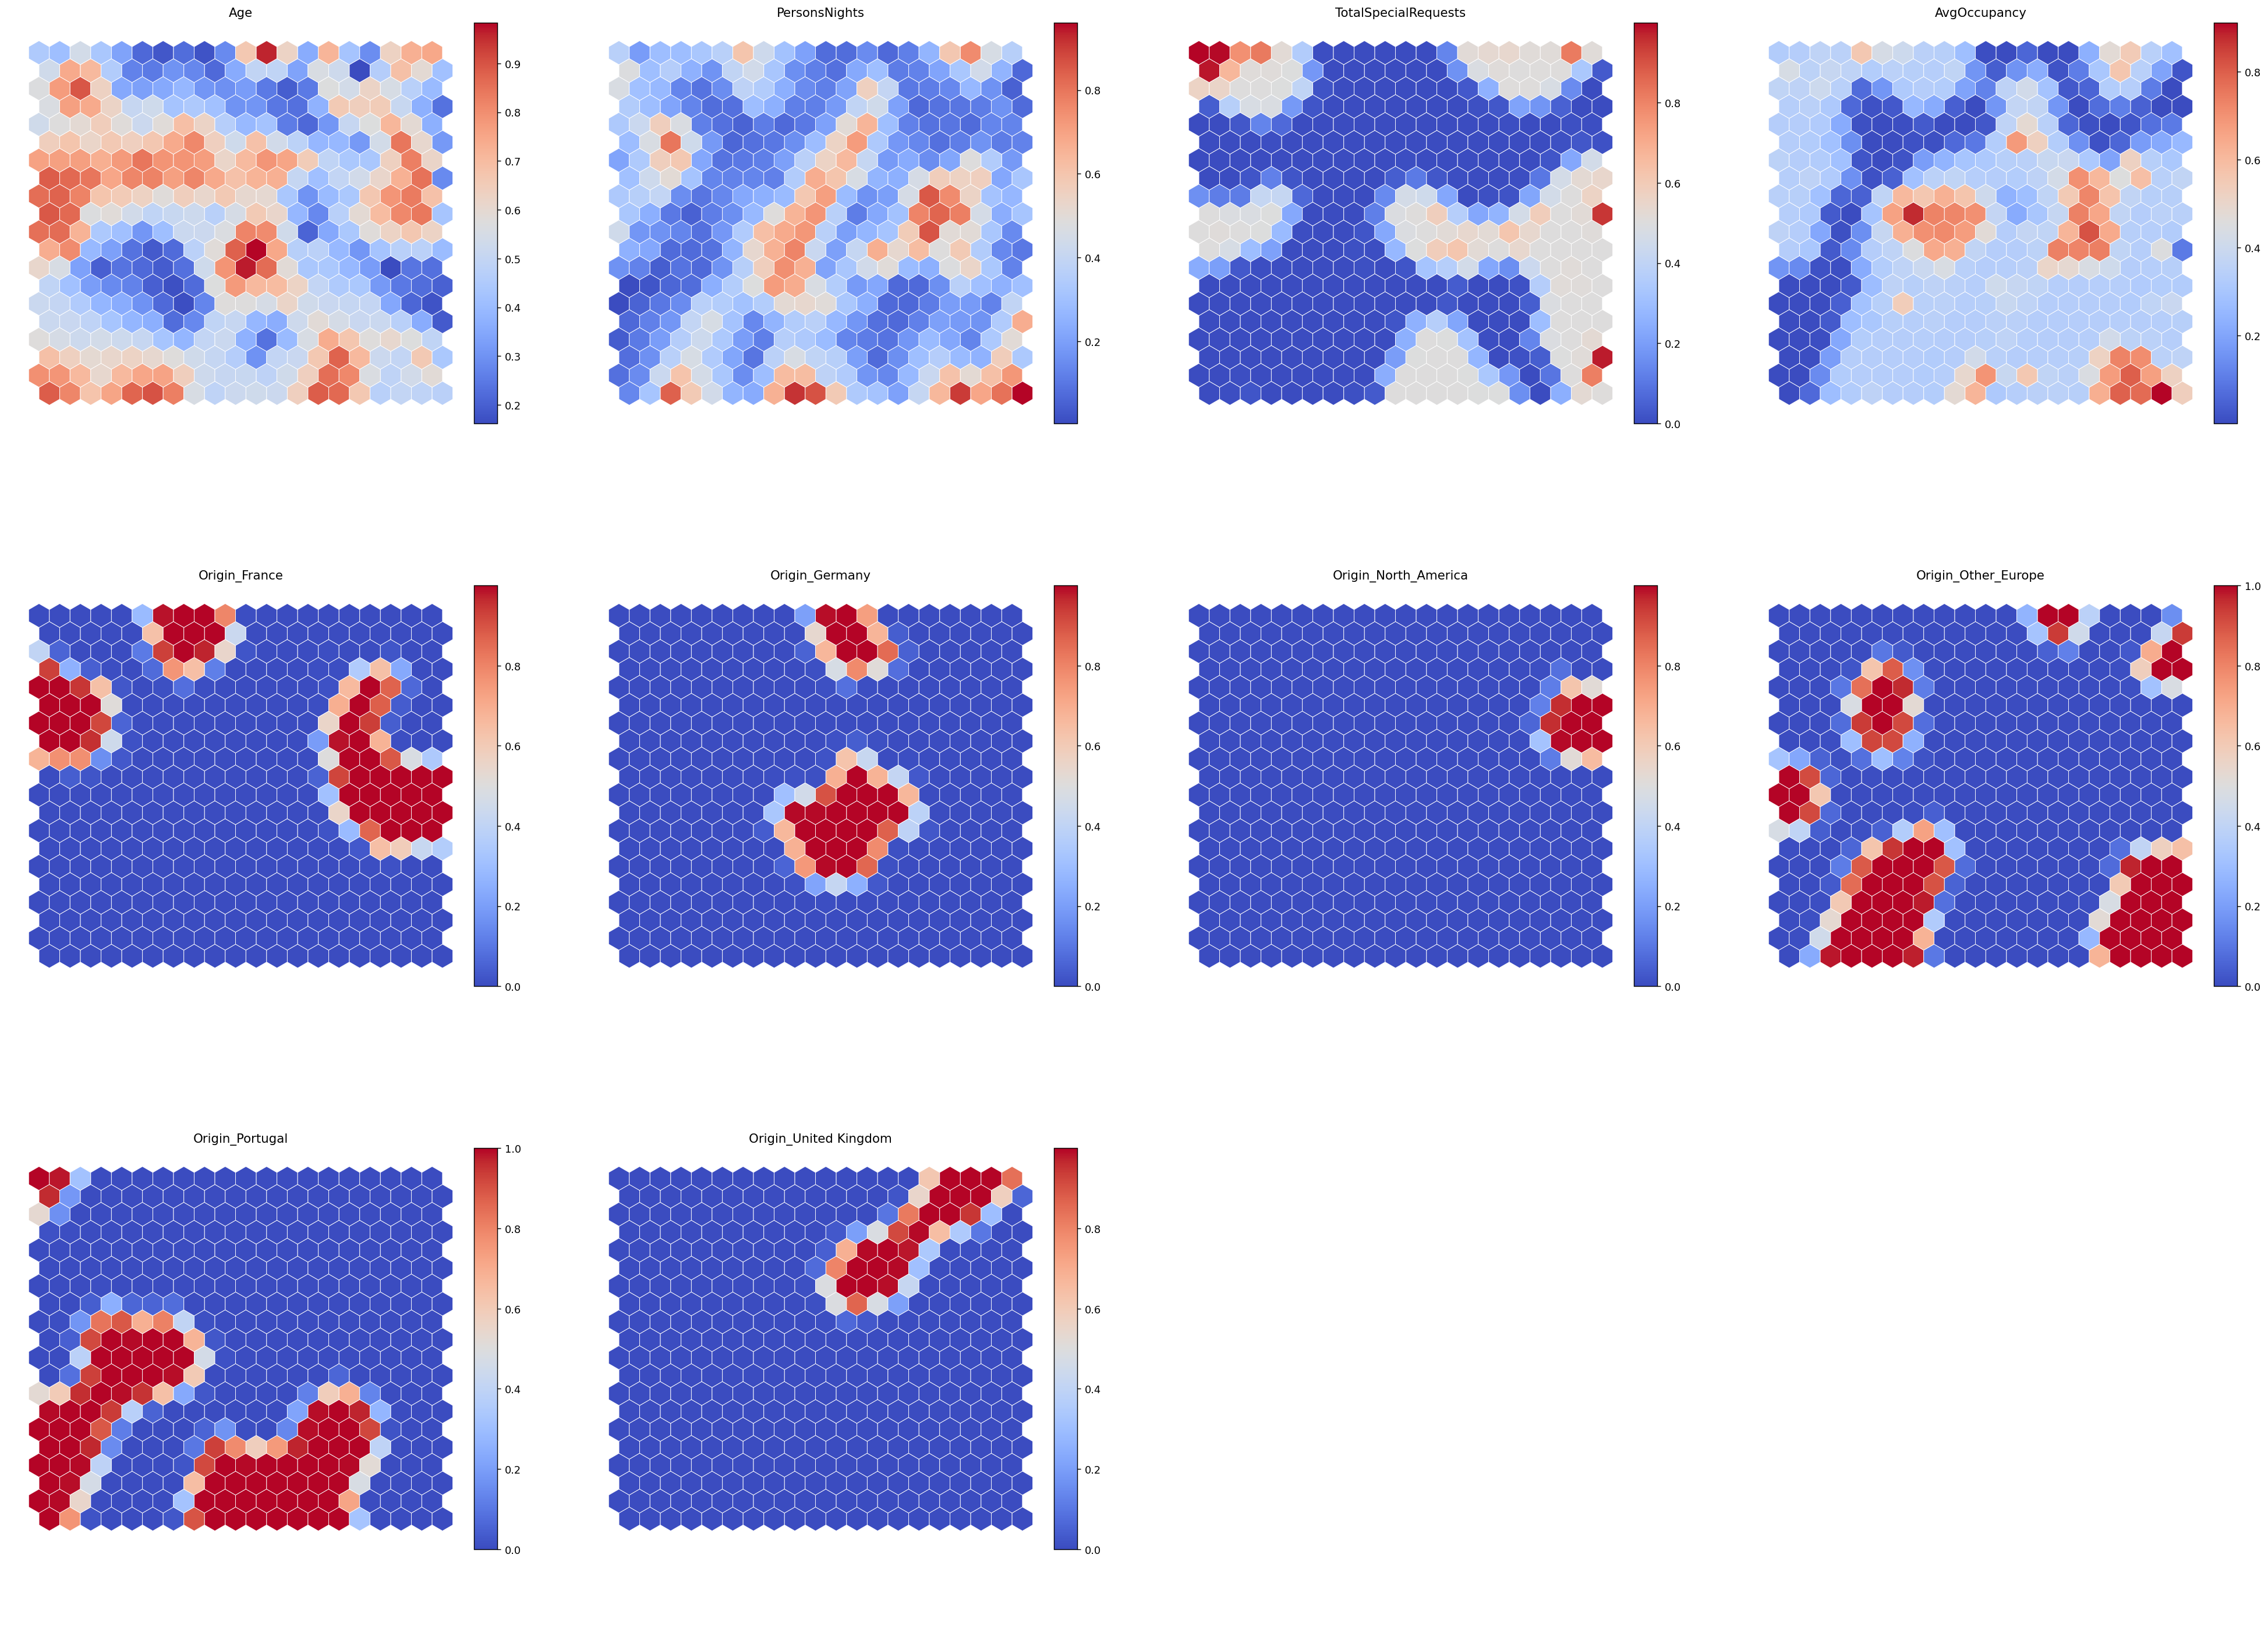

In [274]:
weights = sm.get_weights()  # Get SOM weights

# Determine the number of features and subfigure grid size
n_features = weights.shape[2]
n_cols = 4  # Number of columns in the subfigure grid
n_rows = (n_features // n_cols) + (1 if n_features % n_cols != 0 else 0)  # Calculate rows dynamically

# Create the figure and subfigures
fig = plt.figure(figsize=(30, n_rows * 7.5), constrained_layout=True, dpi=128)
subfigs = fig.subfigures(n_rows, n_cols, wspace=0.15)

# Loop through features and create hexagonal plots
for cpi, sf in zip(range(n_features), subfigs.flatten()):
    matrix_vals = weights[:, :, cpi]  # Extract weights for the current feature

    # Normalize colormap for the feature's weight range
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))

    # Use feature name if metric_features_scaled is a DataFrame
    feature_label = test_df[Demographic_StayCharacteristics].columns[cpi] if isinstance(test_df[Demographic_StayCharacteristics], pd.DataFrame) else f"Feature {cpi + 1}"

    # Plot using the custom plot_hexagons function
    sf = plot_hexagons(
        som=sm,
        sf=sf,
        colornorm=colornorm,
        matrix_vals=matrix_vals,
        label=feature_label,
        cmap=cm.coolwarm,
    )

# If there are unused subplots, hide them
for sf in subfigs.flatten()[n_features:]:
    for ax in sf.axes:  # Access Axes within SubFigure
        ax.axis("off")  # Turn off the axis for unused Axes

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**SOM - Financial_Revenue**</span> <a id='SOM2'></a>

In [275]:
# SOM Configuration
M = 20  # Map size rows
N = 20  # Map size columns
neighborhood_function = 'gaussian'  # Neighborhood function
topology = 'hexagonal'  # Topology of SOM grid
learning_rate = 0.2  # Initial learning rate

# Convert data to numpy array
som_data = np.array(test_df[Financial_Revenue])
n_feats = som_data.shape[1]  # Number of features in the data

# Initialize SOM
sm = MiniSom(
    x=M, y=N,              # 20x20 map size
    input_len=n_feats,     # Number of input features
    learning_rate=learning_rate,
    topology=topology,
    neighborhood_function=neighborhood_function,
    activation_distance='euclidean',  # Distance metric
    random_seed=42                  # For reproducibility
)

# Initialize weights with random samples from data
sm.random_weights_init(som_data)

# Print initial Quantization and Topographic Errors
print("Before training:")
print("Quantization Error (QE):", np.round(sm.quantization_error(som_data), 4))
print("Topographic Error (TE):", np.round(sm.topographic_error(som_data), 4))

# Training Configuration
n_phases = 10  # Number of training phases
iterations_per_phase = 10000  # Iterations per phase

# Training loop with progressively decreasing learning rate and neighborhood radius
for phase in range(n_phases):
    print(f"\nPhase {phase + 1}/{n_phases}")
    
    # Dynamically adjust learning rate and neighborhood radius
    sm.learning_rate = learning_rate * (1 - (phase / n_phases))
    sm.sigma = max(M, N) / 2 * (1 - (phase / n_phases))  # Start with large radius and reduce over phases
    
    # Train SOM
    sm.train_batch(som_data, iterations_per_phase)
    
    # Print updated Quantization and Topographic Errors
    print("Quantization Error (QE):", np.round(sm.quantization_error(som_data), 4))
    print("Topographic Error (TE):", np.round(sm.topographic_error(som_data), 4))

# Final training results
print("\nAfter training:")
print("Final Quantization Error (QE):", np.round(sm.quantization_error(som_data), 4))
print("Final Topographic Error (TE):", np.round(sm.topographic_error(som_data), 4))



Before training:


c:\Users\beatr\anaconda3\Lib\site-packages\minisom.py:631: RuntimeWarning:

invalid value encountered in sqrt



Quantization Error (QE): 0.0575
Topographic Error (TE): 0.9816

Phase 1/10
Quantization Error (QE): 0.0637
Topographic Error (TE): 0.4763

Phase 2/10
Quantization Error (QE): 0.063
Topographic Error (TE): 0.4039

Phase 3/10
Quantization Error (QE): 0.0636
Topographic Error (TE): 0.3596

Phase 4/10
Quantization Error (QE): 0.062
Topographic Error (TE): 0.2897

Phase 5/10
Quantization Error (QE): 0.0621
Topographic Error (TE): 0.3102

Phase 6/10
Quantization Error (QE): 0.0623
Topographic Error (TE): 0.2978

Phase 7/10
Quantization Error (QE): 0.0617
Topographic Error (TE): 0.2763

Phase 8/10
Quantization Error (QE): 0.0617
Topographic Error (TE): 0.2642

Phase 9/10
Quantization Error (QE): 0.0613
Topographic Error (TE): 0.2561

Phase 10/10
Quantization Error (QE): 0.0617
Topographic Error (TE): 0.2469

After training:
Final Quantization Error (QE): 0.0617
Final Topographic Error (TE): 0.2469


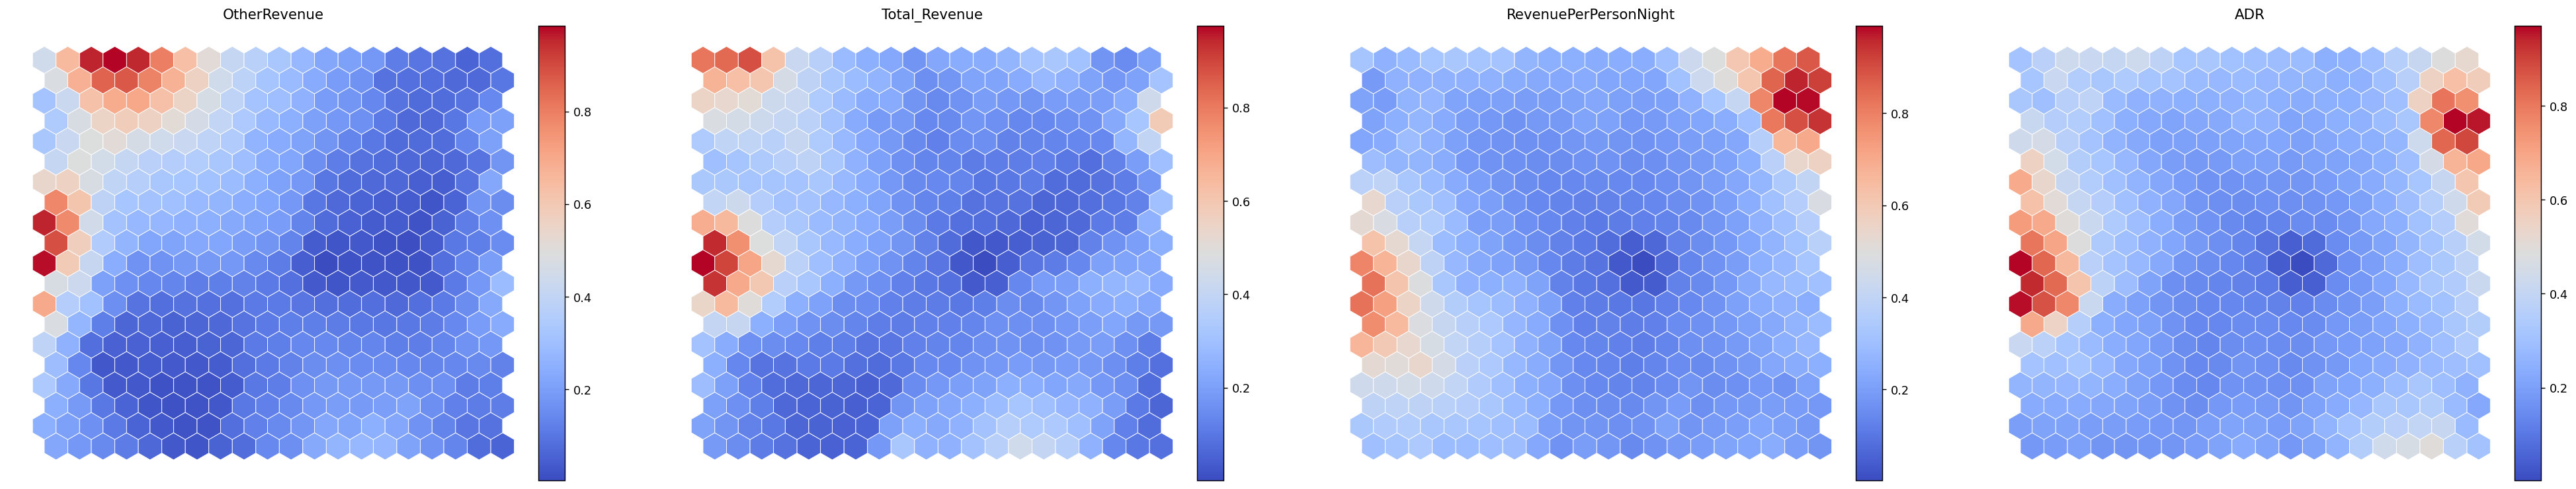

In [276]:
weights = sm.get_weights()  # Get SOM weights

# Determine the number of features and subfigure grid size
n_features = weights.shape[2]
n_cols = 4  # Number of columns in the subfigure grid
n_rows = (n_features // n_cols) + (1 if n_features % n_cols != 0 else 0)  # Calculate rows dynamically

# Create the figure and subfigures
fig = plt.figure(figsize=(30, n_rows * 7.5), constrained_layout=True, dpi=128)
subfigs = fig.subfigures(n_rows, n_cols, wspace=0.15)

# Loop through features and create hexagonal plots
for cpi, sf in zip(range(n_features), subfigs.flatten()):
    matrix_vals = weights[:, :, cpi]  # Extract weights for the current feature

    # Normalize colormap for the feature's weight range
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))

    # Use feature name if metric_features_scaled is a DataFrame
    feature_label = test_df[Financial_Revenue].columns[cpi] if isinstance(test_df[Financial_Revenue], pd.DataFrame) else f"Feature {cpi + 1}"

    # Plot using the custom plot_hexagons function
    sf = plot_hexagons(
        som=sm,
        sf=sf,
        colornorm=colornorm,
        matrix_vals=matrix_vals,
        label=feature_label,
        cmap=cm.coolwarm,
    )

# If there are unused subplots, hide them
for sf in subfigs.flatten()[n_features:]:
    for ax in sf.axes:  # Access Axes within SubFigure
        ax.axis("off")  # Turn off the axis for unused Axes

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**K-means and Hierarchical Clustering**</span> <a id='final-pipeline'></a>

In [287]:
# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

In [288]:
# Functions from Lab 09
def get_ss(df, feats):
    """
    Calculate the sum of squares (SS) for the given DataFrame.

    The sum of squares is computed as the sum of the variances of each column
    multiplied by the number of non-NA/null observations minus one.

    Parameters:
    df (pandas.DataFrame): The input DataFrame for which the sum of squares is to be calculated.
    feats (list of str): A list of feature column names to be used in the calculation.

    Returns:
    float: The sum of squares of the DataFrame.
    """
    df_ = df[feats]
    ss = np.sum(df_.var() * (df_.count() - 1))
    
    return ss 


def get_ssb(df, feats, label_col):
    """
    Calculate the between-group sum of squares (SSB) for the given DataFrame.
    The between-group sum of squares is computed as the sum of the squared differences
    between the mean of each group and the overall mean, weighted by the number of observations
    in each group.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column in the DataFrame that contains the group labels.
    
    Returns
    float: The between-group sum of squares of the DataFrame.
    """
    
    ssb_i = 0
    for i in np.unique(df[label_col]):
        df_ = df.loc[:, feats]
        X_ = df_.values
        X_k = df_.loc[df[label_col] == i].values
        
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) )

    ssb = np.sum(ssb_i)
    

    return ssb


def get_ssw(df, feats, label_col):
    """
    Calculate the sum of squared within-cluster distances (SSW) for a given DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing cluster labels.

    Returns:
    float: The sum of squared within-cluster distances (SSW).
    """
    feats_label = feats+[label_col]

    df_k = df[feats_label].groupby(by=label_col).apply(lambda col: get_ss(col, feats), 
                                                       include_groups=False)

    return df_k.sum()

In [289]:
def get_rsq(df, feats, label_col):
    """
    Calculate the R-squared value for a given DataFrame and features.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    feats (list): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing the labels or cluster assignments.

    Returns:
    float: The R-squared value, representing the proportion of variance explained by the clustering.
    """

    df_sst_ = get_ss(df, feats)                 # get total sum of squares
    df_ssw_ = get_ssw(df, feats, label_col)     # get ss within
    df_ssb_ = df_sst_ - df_ssw_                 # get ss between

    # r2 = ssb/sst 
    return (df_ssb_/df_sst_)

In [290]:
def get_r2_scores(df, feats, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        df_concat = pd.concat([df, 
                               pd.Series(labels, name='labels', index=df.index)], axis=1)  

        r2_clust[n] = get_rsq(df_concat, feats, 'labels' )
    return r2_clust

#### Demographic_StayCharacteristics

In [292]:
r2_scores = {}

r2_scores['kmeans'] = get_r2_scores(test_df[Demographic_StayCharacteristics], test_df[Demographic_StayCharacteristics].columns, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_value,                 # data
        value_features,           # features of perspective
        # use HClust, changing the linkage at each iteration
        hierarchical.set_params(linkage=linkage)
    )

KeyError: "None of [Index(['Agelabels', 'PersonsNightslabels', 'TotalSpecialRequestslabels',\n       'AvgOccupancylabels', 'Origin_Francelabels', 'Origin_Germanylabels',\n       'Origin_North_Americalabels', 'Origin_Other_Europelabels',\n       'Origin_Portugallabels', 'Origin_United Kingdomlabels'],\n      dtype='object')] are in the [columns]"

#### Profiling Functions

In [232]:
# Function to plot histograms of selected variables for each cluster
def plot_cluster_histograms(data, clusters, labels_name):
    variables = [col for col in data.columns if col != labels_name]
    num_clusters = len(clusters)
    num_vars = len(variables)
    
    # Increase the figure size for better readability
    fig, axes = plt.subplots(num_clusters, num_vars, figsize=(8 * num_vars, 10 * num_clusters))
    axes = np.array(axes).reshape(num_clusters, num_vars)  

    cluster_colors = pal_novaims[:num_clusters]  # Define colors for clusters

    for row, (cluster, color) in enumerate(zip(clusters, cluster_colors)):
        cluster_data = data[data[labels_name] == cluster]
        for col, var in enumerate(variables):
            ax = axes[row, col] if num_clusters > 1 else axes[col]
            sns.histplot(cluster_data[var], bins=20, kde=False, color=color, ax=ax, alpha=0.5)
            ax.set_title(f'Cluster {cluster} - {var}', fontsize=20)
            ax.set_xlabel(var, fontsize=20)
            ax.set_ylabel('Count', fontsize=20)
            ax.tick_params(axis='both', labelsize=20)  # Adjust tick label size
            ax.grid(False)

    plt.tight_layout()
    plt.show()

In [233]:
# Function to plot violin plots for selected variables across clusters
def plot_cluster_violin_plots(data, clusters, labels_name):
    # Exclude the labels_name column from the variables to plot
    variables = [col for col in data.columns if col != labels_name]
    num_vars = len(variables)
    num_cols = 3
    num_rows = (num_vars + 1) // num_cols  # Calculate rows based on 2 columns

    # Increase the figure size for better readability
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
    axes = axes.flatten()  # Flatten axes for easy indexing

    cluster_colors = pal_novaims[:len(clusters)]  # Define colors for clusters

    for i, var in enumerate(variables):
        ax = axes[i]
        sns.violinplot(
            x=labels_name, y=var, data=data, 
            palette=cluster_colors, ax=ax, cut=0, scale='width', 
            inner=None, alpha=0.5)
        ax.set_title(f'Distribution of {var} by Cluster', fontsize=12)
        ax.set_xlabel('Cluster', fontsize=12)
        ax.set_ylabel(var, fontsize=12)
        ax.tick_params(axis='both', labelsize=12)
        ax.grid(False) 

    for j in range(num_vars, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [234]:
# Function to plot a single radar chart with normalized values
def plot_radar(data, clusters, labels_name):
    # Exclude the labels_name column from the variables to plot
    variables = [col for col in data.columns if col != labels_name]
    cluster_colors = pal_novaims[:len(clusters)]  # Define colors for clusters

    # Normalize data using Min-Max scaling for each variable
    normalized_data = data.copy()
    for var in variables:
        min_val = data[var].min()
        max_val = data[var].max()
        normalized_data[var] = (data[var] - min_val) / (max_val - min_val)

    # Angles for the radar chart
    theta = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
    theta += theta[:1]  # Close the circle

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})

    for cluster, color in zip(clusters, cluster_colors):
        # Calculate the mean values for the cluster
        cluster_data = normalized_data[normalized_data[labels_name] == cluster][variables].mean()
        values = cluster_data.tolist()
        values += values[:1]  # Close the circle

        # Plot the radar chart for the cluster
        ax.plot(theta, values, label=f'Cluster {cluster}', color=color, linewidth=2)
        ax.fill(theta, values, alpha=0.5, color=color)

    # Add variable labels
    ax.set_xticks(theta[:-1])
    ax.set_xticklabels(variables, fontsize=12)

    # Customize the plot
    ax.set_title("Cluster Comparison (Normalized)", size=16, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

    plt.tight_layout()
    plt.show()

---

#### <span style="background-color:#235987; padding:5px; border-radius:5px;">**K-means**</span> <a id='final-pipeline'></a>

In [235]:
def plot_elbow_curve(data, k_range, title):
    cost = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=0)
        kmeans.fit(data)
        cost.append(kmeans.inertia_)
    
    plt.plot(k_range, cost, color=pal_novaims[1], marker='x')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia (Cost)')
    plt.title(f'Elbow Curve: {title}')
    plt.show()

In [236]:
def plot_silhouette_scores(data, k_range, title):
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=0)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    plt.plot(k_range, silhouette_scores, color= pal_novaims[1], marker='x')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score vs. Number of Clusters: {title}')
    plt.show()

In [237]:
# Function to plot detailed silhouette analysis for each cluster count
def plot_silhouette_analysis(data, k_range, title):
    fig, axs = plt.subplots(len(k_range), 1, figsize=(10, len(k_range) * 5))
    if len(k_range) == 1:
        axs = [axs]  # Ensure axs is always iterable

    for row, n_clusters in enumerate(k_range):
        kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10, random_state=0)
        cluster_labels = kmeans.fit_predict(data)

        silhouette_avg = silhouette_score(data, cluster_labels)
        print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        ax = axs[row]
        ax.set_xlim([-0.2, 1])
        ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax.set_title(f"Silhouette analysis for {n_clusters} clusters: {title}")
        ax.set_xlabel("Silhouette coefficient values")
        ax.set_ylabel("Cluster label")
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

In [238]:
# Function to visualize sizes and distances of clusters created by KMeans clustering
def plot_cluster_size_distance(data, kmeans_model):
    visualizer = InterclusterDistance(kmeans_model, random_state=5)
    visualizer.fit(data)
    visualizer.show()

In [239]:
def r2(data, model):

    labels = model.labels_
    # total variance (sum of squared deviations from the mean)
    total_variance = ((data - data.mean(axis=0)) ** 2).sum().sum()

    # within-cluster variance
    within_cluster_variance = sum(
        ((data[labels == cluster] - data[labels == cluster].mean(axis=0)) ** 2).sum().sum()
        for cluster in np.unique(labels))

    # R² score
    r2_score = 1 - (within_cluster_variance / total_variance)
    return r2_score

In [240]:
def cluster_profiles(df, label_columns, figsize, 
                     cmap="tab10",
                     compare_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    
    if compare_titles == None:
        compare_titles = [""]*len(label_columns)
        
    fig, axes = plt.subplots(nrows=len(label_columns), 
                             ncols=2, 
                             figsize=figsize, 
                             constrained_layout=True,
                             squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compare_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, 
                                            label, 
                                            color = sns.color_palette(cmap),
                                            ax=ax[0])

        sns.barplot(x=label, 
                    hue=label,
                    y="counts", 
                    data=counts, 
                    ax=ax[1], 
                    palette=sns.color_palette(cmap),
                    legend=False
                    )

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), 
                              rotation=40,
                              ha='right'
                              )
        
        ax[0].legend(handles, cluster_labels,
                     loc='center left', bbox_to_anchor=(1, 0.5), title=label
                     ) # Adaptable to number of clusters
        
        ax[1].set_xticks([i for i in range(len(handles))])
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
        
    # plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profiling", fontsize=23)
    plt.show()

### <span style="background-color:#235987; padding:5px; border-radius:5px;"> 📌 Evaluation <a id='evaluation'></a>

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

---

### <span style="background-color:#235987; padding:5px; border-radius:5px;"> 📌 Conclusion <a id='conclusion'></a>

##### Click [here](#table-of-contents) ⬆️ to return to the Index.
---